<a href="https://colab.research.google.com/github/Shuraimi/Regression-with-Abalone-dataset/blob/main/Regression_with_Abalone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with an Abalone Dataset

This is a regression project to predict the age of Abalone from various physical measurements.

The dataset is from the following competition:-
https://www.kaggle.com/competitions/playground-series-s4e4

To proceed with this project, I'll list out the following steps/sections:

## 1. Problem Definition
> The goal of this project is to predict the age of abalone from various physical measurements.

## 2. Data
This dataset consists of 2 files one for train and another for test and also a sample submission file since this dataset is from a kaggle competition.
- train.csv - the training dataset; **Rings** is the integer target
- test.csv - the test dataset; your objective is to predict the value of Rings for each row
- sample_submission.csv - a sample submission file in the correct format

## 3. Evaluation
The metric to be used for evaluation is RMSLE (Root Mean Squared Logarithmic Error).

## 4. Features
- Sex :- M, F, and I (infant)

- Length :- Longest shell measurement

- Diameter :- perpendicular to length

- Height:- with meat in shell

- Whole weight :- whole abalone

- Whole weight.1 :- weight of meat

- Whole weight.2 :- gut weight (after bleeding)
- Shell weight :-
after being dried

- Rings :- +1.5 gives the age in years

Now before modelling, perform Exploratory Data Analysis on the dataset.

## Import standard libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Importing the dataset(train.csv)

In [2]:
data_train=pd.read_csv('https://raw.githubusercontent.com/Shuraimi/Regression-with-Abalone-dataset/main/train.csv')
data_train.head()

id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0   0   F   0.550     0.430   0.150        0.7715          0.3285   
1   1   F   0.630     0.490   0.145        1.1300          0.4580   
2   2   I   0.160     0.110   0.025        0.0210          0.0055   
3   3   M   0.595     0.475   0.150        0.9145          0.3755   
4   4   I   0.555     0.425   0.130        0.7820          0.3695   

   Whole weight.2  Shell weight  Rings  
0          0.1465        0.2400     11  
1          0.2765        0.3200     11  
2          0.0030        0.0050      6  
3          0.2055        0.2500     10  
4          0.1600        0.1975      9

In [3]:

# drop id because it's not useful in modelling
data_train.drop('id',axis=1,inplace=True)

In [4]:
# convert sex into category
data_train['Sex']=data_train['Sex'].astype('category')
data_train['Sex-codes']=data_train['Sex'].cat.codes

# drop sex column
data_train.drop('Sex',axis=1, inplace=True)

In [5]:
cols=data_train.columns
cols

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Rings', 'Sex-codes'],
      dtype='object')

In [6]:
# also importing the original dataset from UCI
org_data_train=pd.read_csv('https://raw.githubusercontent.com/Shuraimi/Regression-with-Abalone-dataset/main/abalone.csv')
org_data_train

Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Whole weight.2  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3             0.1140        0.1550     10  
4             0.0395        0.0550      7  
...              ...           ...    ...  
4172          0.2390        0.2490     11  
4173          0.2145        0.2605     10  
4174          0.2875        0.3080      9  
4175          0.2610        0.2960     10  
4176          0.3765        0.4950     12  

[4177 rows x 9 columns]

In [7]:
# convert sex into category
org_data_train['Sex']=org_data_train.Sex.astype('category')
org_data_train['Sex-codes']=org_data_train.Sex.cat.codes

In [8]:
# drop the sex column
org_data_train.drop('Sex',axis=1,inplace=True)

In [9]:

org_data_train

Length  Diameter  Height  Whole weight  Whole weight.1  Whole weight.2  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell weight  Rings  Sex-codes  
0           0.1500     15          2  
1           0.0700      7          2  
2           0.2100      9          0  
3           0.1550     10          2  
4           0.0550      7          1  
...            ...    ...        ...  
4172        0.2490     11          0  
4173        0.2605     10          2  
4174        0.3080      9          2  
4175        0.2960     10          0  
4176        0.4950     12          2  

[4177 rows x 9 columns]

In [10]:
# loooking at the shape of the dataset
data_train.shape

(90615, 9)

In [11]:
# loooking at the shape of the dataset
org_data_train.shape

(4177, 9)

In [12]:
#append data_train and original dataset
data_train=pd.concat([data_train,org_data_train])

In [13]:
data_train.head()

Length  Diameter  Height  Whole weight  Whole weight.1  Whole weight.2  \
0   0.550     0.430   0.150        0.7715          0.3285          0.1465   
1   0.630     0.490   0.145        1.1300          0.4580          0.2765   
2   0.160     0.110   0.025        0.0210          0.0055          0.0030   
3   0.595     0.475   0.150        0.9145          0.3755          0.2055   
4   0.555     0.425   0.130        0.7820          0.3695          0.1600   

   Shell weight  Rings  Sex-codes  
0        0.2400     11          0  
1        0.3200     11          0  
2        0.0050      6          1  
3        0.2500     10          2  
4        0.1975      9          1

In [14]:
data_train.shape

(94792, 9)

In [15]:


print(f"The dataset (train.csv) has {data_train.shape[0]} rows and {data_train.shape[1]} columns")

The dataset (train.csv) has 94792 rows and 9 columns


In [16]:
# info of the dataset
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94792 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          94792 non-null  float64
 1   Diameter        94792 non-null  float64
 2   Height          94792 non-null  float64
 3   Whole weight    94792 non-null  float64
 4   Whole weight.1  94792 non-null  float64
 5   Whole weight.2  94792 non-null  float64
 6   Shell weight    94792 non-null  float64
 7   Rings           94792 non-null  int64  
 8   Sex-codes       94792 non-null  int8   
dtypes: float64(7), int64(1), int8(1)
memory usage: 6.6 MB


This dataset has all columns as int or float except sex column which is also int dtype.

There are no missing values and let's confirm it as follows.

In [17]:
data_train.isna().sum()

Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
Sex-codes         0
dtype: int64

There are no missing values.

In [18]:
# columns in the dataset
data_train.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Rings', 'Sex-codes'],
      dtype='object')

In [19]:
# dtypes of columns
data_train.dtypes

Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Whole weight.1    float64
Whole weight.2    float64
Shell weight      float64
Rings               int64
Sex-codes            int8
dtype: object

In [20]:
data_train.describe()

Length      Diameter        Height  Whole weight  Whole weight.1  \
count  94792.000000  94792.000000  94792.000000  94792.000000    94792.000000   
mean       0.517402      0.401952      0.135643      0.790785        0.341597   
std        0.118308      0.098088      0.038193      0.459231        0.205267   
min        0.075000      0.055000      0.000000      0.002000        0.001000   
25%        0.445000      0.345000      0.110000      0.419500        0.177500   
50%        0.545000      0.425000      0.140000      0.799500        0.330000   
75%        0.600000      0.470000      0.160000      1.072500        0.464500   
max        0.815000      0.650000      1.130000      2.825500        1.488000   

       Whole weight.2  Shell weight         Rings     Sex-codes  
count    94792.000000  94792.000000  94792.000000  94792.000000  
mean         0.169914      0.226468      9.707233      1.050141  
std          0.101334      0.130639      3.178704      0.796381  
min          0.000500      0.001500      1.000000      0.000000  
25%          0.086500      0.120000      8.000000      0.000000  
50%          0.166000      0.225000      9.000000      1.000000  
75%          0.233000      0.305000     11.000000      2.000000  
max          0.760000      1.005000     29.000000      2.000000

In [21]:
# convert sex column into numeric because ml model can't understand object dtypes
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# cat_features=['Sex']
# transformer=ColumnTransformer([
#         ('cat_transformer',OneHotEncoder(),cat_features)
# ],remainder='passthrough'
# )
# transformed_X_train=transformer.fit_transform(data_train)

## Perform some visualisations

In [ ]:
data_train.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Rings', 'Sex-codes'],
      dtype='object')

In [ ]:
data_train.head()

Length  Diameter  Height  Whole weight  Whole weight.1  Whole weight.2  \
0   0.550     0.430   0.150        0.7715          0.3285          0.1465   
1   0.630     0.490   0.145        1.1300          0.4580          0.2765   
2   0.160     0.110   0.025        0.0210          0.0055          0.0030   
3   0.595     0.475   0.150        0.9145          0.3755          0.2055   
4   0.555     0.425   0.130        0.7820          0.3695          0.1600   

   Shell weight  Rings  Sex-codes  
0        0.2400     11          0  
1        0.3200     11          0  
2        0.0050      6          1  
3        0.2500     10          2  
4        0.1975      9          1

### Diameter vs rings

In [ ]:
data_train.plot(x='Rings',y='Diameter',kind='scatter');

### How Length affects the Rings

In [ ]:
data_train.Rings.value_counts()

In [ ]:
data_train.plot.scatter('Length','Rings');

### Correlation of columns

First convert sex column into numbers
Below is one way to convert into numbers.
Second way is to split the data into train and validation splits and then `fit_transform` on train and `transform` on val set.

In [ ]:
# correlation
corr=data_train.corr()
corr

Plot a heatmap of the above

In [ ]:
sns.heatmap(corr,annot=True,fmt='.2f',cmap=sns.color_palette("flare"))

Looking at the heatmap, ID and Sex-codes are either 0 or negatively correlated to the Rings columns.

In [32]:
# box plot of numeric columns
data_train["Sex-codes"].value_counts().plot.bar()
plt.legend();

SyntaxError: invalid syntax (<ipython-input-32-c3ce9200101c>, line 3)

### Distribution of Length column

In [ ]:
sns.histplot(data_train['Length'],kde=True,stat='density')

Negative, or left-skewed refers to a longer or fatter tail on the left side of the distribution, while positive, or right-skewed, refers to a longer or fatter tail on the right

In [ ]:
data_train.Length.skew()

Since this is left-skewed, use IQR method to fix outliers.

### Boxplot of length

In [ ]:
sns.boxplot(data_train['Length'])

In [ ]:
data_train.Length.describe()

In [ ]:
data_train.Length

In [ ]:
# find q1 and q3
q1,q3=data_train['Length'].quantile(0.25),data_train['Length'].quantile(0.75)
q1,q3

# calculate iqr
iqr=q3-q1
iqr

# calculate min and max
min=q1-1.5*iqr
max=q3+1.5*iqr
min,max

Now we have two options :-
1. Trim (remove the outliers)
2. Cap the outliers

I'll cap the outliers to min and max

In [ ]:
# since there are outliers below min, cap outliers below
data_train['Length']=np.where(
    data_train['Length']<min,
    np.around(min,decimals=3),
    data_train['Length']

)

In [ ]:
data_train['Length'].describe()

In [ ]:
sns.histplot(data_train['Length'],kde=True,stat='density')

When i compared the mean before handling outliers and after, there's very very little change in the value. So i'm leaving the ouliers as it is because it's not affecting the statistical values that much.

### Distribution of diameter

In [ ]:
data_train.Diameter.plot.hist()

### Boxplot of diameter

In [ ]:
sns.boxplot(data_train.Diameter)
plt.axhline(0.16)

### Distribution of height

In [ ]:
data_train.Height.plot.hist();

### Boxplot of height

In [ ]:
sns.boxplot(data_train['Height'])

### Distribution of Whole Weight

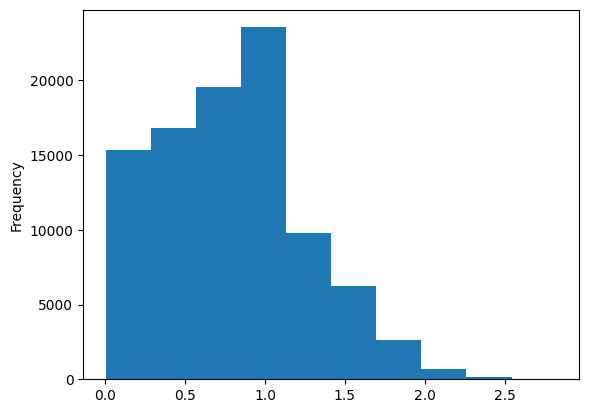

In [33]:
data_train['Whole weight'].plot.hist();

### Boxplot of Whole Weight

In [ ]:
sns.boxplot(data_train['Whole weight'])

### Distribution of Whole Weight.1

In [ ]:
data_train['Whole weight.1'].plot.hist();

### Boxplot of Whole Weight.1

In [ ]:
sns.boxplot(data_train['Whole weight.1'])

In [ ]:
data_train.columns

### Distribution of Whole Weight.2

In [ ]:
data_train['Whole weight.2'].plot.hist();

### Boxplot of Whole Weight.2

In [ ]:
sns.boxplot(data_train['Whole weight.2'])

### Distribution of Shell weight

In [ ]:
data_train['Shell weight'].plot.hist();

### Boxplot of shell weight

In [ ]:
sns.boxplot(data_train['Shell weight'])

Looking at the different numeric columns in this dataset, each column has many outliers so we should fix them first.

Follow these steps to fix them:-
- check whether normally distributed or skewed
- if normally distributed, use z score method else use IQR method

When i compared the mean before handling outliers and after, there's very very little change in the value. So i'm leaving the ouliers as it is because it's not affecting the statistical values that much.

## Modelling

Split the data into X and y

In [ ]:

# features as X
X=data_train.drop('Rings',axis=1)
# targets as y
y=data_train.Rings

In [ ]:

# split the data into train and validation splits
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.shape

(75833, 8)

In [ ]:
y_valid.value_counts()

Rings
9     3715
8     2998
10    2541
7     1912
11    1729
6     1115
12    1012
13     889
5      636
14     548
15     438
16     297
4      272
17     242
18     164
19     116
20     108
3       79
21      57
23      33
22      21
1        9
2        8
27       7
24       4
25       4
26       3
29       2
Name: count, dtype: int64

In [ ]:
# import models for initial experimentation
from sklearn.linear_model import LinearRegression,Ridge,Lasso,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,VotingRegressor,AdaBoostRegressor, GradientBoostingRegressor

In [ ]:
# create a dictionary of models
np.random.seed(42)
models={#'Linear Reg':LinearRegression(),
#          'Ridge':Ridge(),
#          'Lasso':Lasso(),
         'DecisionTreeRegressor':DecisionTreeRegressor(),
         'RandomForest':RandomForestRegressor(),
         'AdaBoostRegressor':AdaBoostRegressor(),
         'GradientBoostingRegressor':GradientBoostingRegressor()
        }

In [ ]:
# define evaluation metric
from sklearn.metrics import mean_squared_log_error
def RMSLE(y_true,y_preds):
    return np.sqrt(mean_squared_log_error(y_true,y_preds))

In [ ]:
# fit the models and store scores in a dictionary
%%time
# from sklearn.metrics import root_mean_squared_log_error
scores={}
for model_name,model in models.items():
    model.fit(X_train,y_train)
    preds=model.predict(X_valid)
    # scores[model_name]=root_mean_squared_log_error(y_valid,preds)
    scores[model_name]=RMSLE(y_valid,preds)
scores

CPU times: user 1min 3s, sys: 460 ms, total: 1min 4s
Wall time: 1min 9s


{'DecisionTreeRegressor': 0.21373109383456898,
 'RandomForest': 0.15486802152103152,
 'AdaBoostRegressor': 0.27562056113077815,
 'GradientBoostingRegressor': 0.15349110735944096}

Making my first submission on the test data for this baseline model performance.

In [ ]:
# load the test data and preprocess it
data_test=pd.read_csv('https://raw.githubusercontent.com/Shuraimi/Regression-with-Abalone-dataset/main/test.csv')
data_test.head()

id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0  90615   M   0.645     0.475   0.155        1.2380          0.6185   
1  90616   M   0.580     0.460   0.160        0.9830          0.4785   
2  90617   M   0.560     0.420   0.140        0.8395          0.3525   
3  90618   M   0.570     0.490   0.145        0.8740          0.3525   
4  90619   I   0.415     0.325   0.110        0.3580          0.1575   

   Whole weight.2  Shell weight  
0          0.3125        0.3005  
1          0.2195        0.2750  
2          0.1845        0.2405  
3          0.1865        0.2350  
4          0.0670        0.1050

In [ ]:
data_test.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight'],
      dtype='object')

In [ ]:
data_test.isna().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
dtype: int64

In [ ]:
# convert sex column into numeric
data_test['Sex-codes']=data_test.Sex.astype('category').cat.codes
data_test.head()

id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0  90615   M   0.645     0.475   0.155        1.2380          0.6185   
1  90616   M   0.580     0.460   0.160        0.9830          0.4785   
2  90617   M   0.560     0.420   0.140        0.8395          0.3525   
3  90618   M   0.570     0.490   0.145        0.8740          0.3525   
4  90619   I   0.415     0.325   0.110        0.3580          0.1575   

   Whole weight.2  Shell weight  Sex-codes  
0          0.3125        0.3005          2  
1          0.2195        0.2750          2  
2          0.1845        0.2405          2  
3          0.1865        0.2350          2  
4          0.0670        0.1050          1

In [ ]:
# drop the sex column
data_test.drop('Sex',axis=1,inplace=True)

In [ ]:
data_test.head()

id  Length  Diameter  Height  Whole weight  Whole weight.1  \
0  90615   0.645     0.475   0.155        1.2380          0.6185   
1  90616   0.580     0.460   0.160        0.9830          0.4785   
2  90617   0.560     0.420   0.140        0.8395          0.3525   
3  90618   0.570     0.490   0.145        0.8740          0.3525   
4  90619   0.415     0.325   0.110        0.3580          0.1575   

   Whole weight.2  Shell weight  Sex-codes  
0          0.3125        0.3005          2  
1          0.2195        0.2750          2  
2          0.1845        0.2405          2  
3          0.1865        0.2350          2  
4          0.0670        0.1050          1

In [ ]:
data_train.head()

Length  Diameter  Height  Whole weight  Whole weight.1  Whole weight.2  \
0   0.550     0.430   0.150        0.7715          0.3285          0.1465   
1   0.630     0.490   0.145        1.1300          0.4580          0.2765   
2   0.160     0.110   0.025        0.0210          0.0055          0.0030   
3   0.595     0.475   0.150        0.9145          0.3755          0.2055   
4   0.555     0.425   0.130        0.7820          0.3695          0.1600   

   Shell weight  Rings  Sex-codes  
0        0.2400     11          0  
1        0.3200     11          0  
2        0.0050      6          1  
3        0.2500     10          2  
4        0.1975      9          1

In [ ]:
# now perform predictions on this test data using RandomForest
model1=RandomForestRegressor(random_state=42)
# fit on the whole train data
model1.fit(X,y)

RandomForestRegressor(random_state=42)

In [ ]:
preds=model1.predict(data_test.drop('id',axis=1))
preds=pd.Series(preds)
# create a initial submission dataframe for this model
ids=data_test.id
submission=pd.DataFrame({'id':ids,
                        'Rings':preds})

In [ ]:
submission.to_csv('sub1.csv',index=False)

In [ ]:
# now perform predictions on this test data using GradientBoost
model2=GradientBoostingRegressor(random_state=42)
# fit on the whole train data
model2.fit(X,y)

preds=model2.predict(data_test.drop('id',axis=1))
preds=pd.Series(preds)
# create a initial submission dataframe for this model
ids=data_test.id
submission=pd.DataFrame({'id':ids,
                        'Rings':preds})

submission.to_csv('sub2.csv',index=False)

### Tune the RandomForestRegressor(model1) using `Optuna`


In [ ]:
from sklearn.metrics import make_scorer,mean_squared_log_error
def rmsle(y_true,y_preds):
    return -np.sqrt(mean_squared_log_error(y_true,y_preds))

RMSLE_scorer=make_scorer(rmsle)

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# grid={'n_estimators':np.arange(100,600,50),
# 'max_depth':[None,2,4,6,8,10],
# 'min_samples_split':[5,10,15,20],
# 'max_features':['sqrt','log2',None],
# 'bootstrap':[True,False]}

# rf_rs=RandomizedSearchCV(model1,param_distributions=grid,n_iter=10,verbose=10,cv=5,n_jobs=-1,scoring=RMSLE_scorer)
# rf_rs.fit(X_train,y_train)
# preds=rf_rs.predict(X_valid)
# RMSLE(y_valid,preds)

In [ ]:
!pip install optuna
import optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 8.5 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import cross_val_score

Below I've defined objective function for Optuna, then create a study and then optimize (which I've uncommented because it takes more time to optimize almost 2 and half hours to optimize RandomForestRegressor)

In [ ]:
def objective(trials):
    n_estimators=trials.suggest_int('n_estimators',100,1000)
    max_depth=trials.suggest_int('max_depth',10,50)
    min_samples_split=trials.suggest_int('min_samples_split',2,32)
    min_samples_leaf=trials.suggest_int('min_samples_leaf',1,32)

    model=RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        max_samples=10000
    )
    model.fit(X_train,y_train)
    y_preds=model.predict(X_valid)
    score=cross_val_score(model,X_train,y_train,cv=3,scoring=RMSLE_scorer,n_jobs=-1,error_score='raise').mean()
    # rmsle = np.sqrt(-score["test_score"].mean())

    return score

In [34]:
data_test.isna().sum()

NameError: name 'data_test' is not defined

In [ ]:
#study=optuna.create_study(direction='minimize',sampler=optuna.samplers.RandomSampler(seed=42))

[I 2024-04-28 07:09:53,080] A new study created in memory with name: no-name-650f0f9d-9378-4971-b33a-794f9ba974b5


In [ ]:
%%time
#study.optimize(objective,n_trials=100)

[I 2024-04-28 07:20:54,017] Trial 2 finished with value: -0.1522416050518607 and parameters: {'n_estimators': 641, 'max_depth': 39, 'min_samples_split': 2, 'min_samples_leaf': 32}. Best is trial 2 with value: -0.1522416050518607.
[I 2024-04-28 07:23:40,556] Trial 3 finished with value: -0.150314427092127 and parameters: {'n_estimators': 850, 'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 6}. Best is trial 2 with value: -0.1522416050518607.
[I 2024-04-28 07:24:46,618] Trial 4 finished with value: -0.15067334100710927 and parameters: {'n_estimators': 374, 'max_depth': 31, 'min_samples_split': 15, 'min_samples_leaf': 10}. Best is trial 2 with value: -0.1522416050518607.
[I 2024-04-28 07:26:35,790] Trial 5 finished with value: -0.15080986319559006 and parameters: {'n_estimators': 651, 'max_depth': 15, 'min_samples_split': 11, 'min_samples_leaf': 12}. Best is trial 2 with value: -0.1522416050518607.
[I 2024-04-28 07:27:55,992] Trial 6 finished with value: -0.1511949082572023 a

CPU times: user 45min 28s, sys: 18.4 s, total: 45min 47s
Wall time: 2h 32min 47s


In [ ]:
best_params=study.best_params

In [ ]:
best_params

{'n_estimators': 113,
 'max_depth': 48,
 'min_samples_split': 15,
 'min_samples_leaf': 31}

The best parameters at trial 61:![optimization_history_plot.png](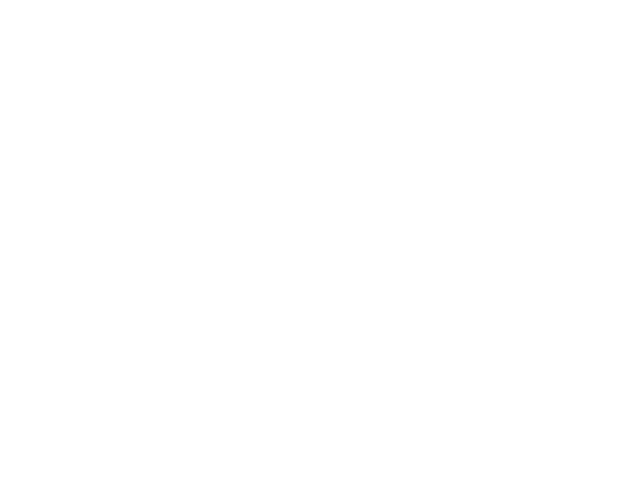![newplot.png](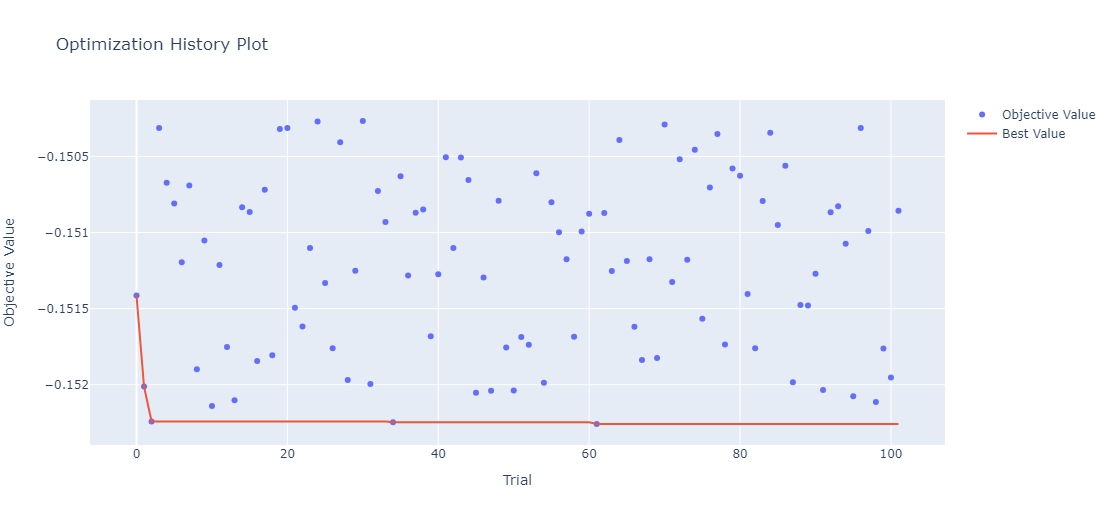![1711102852452.jpg](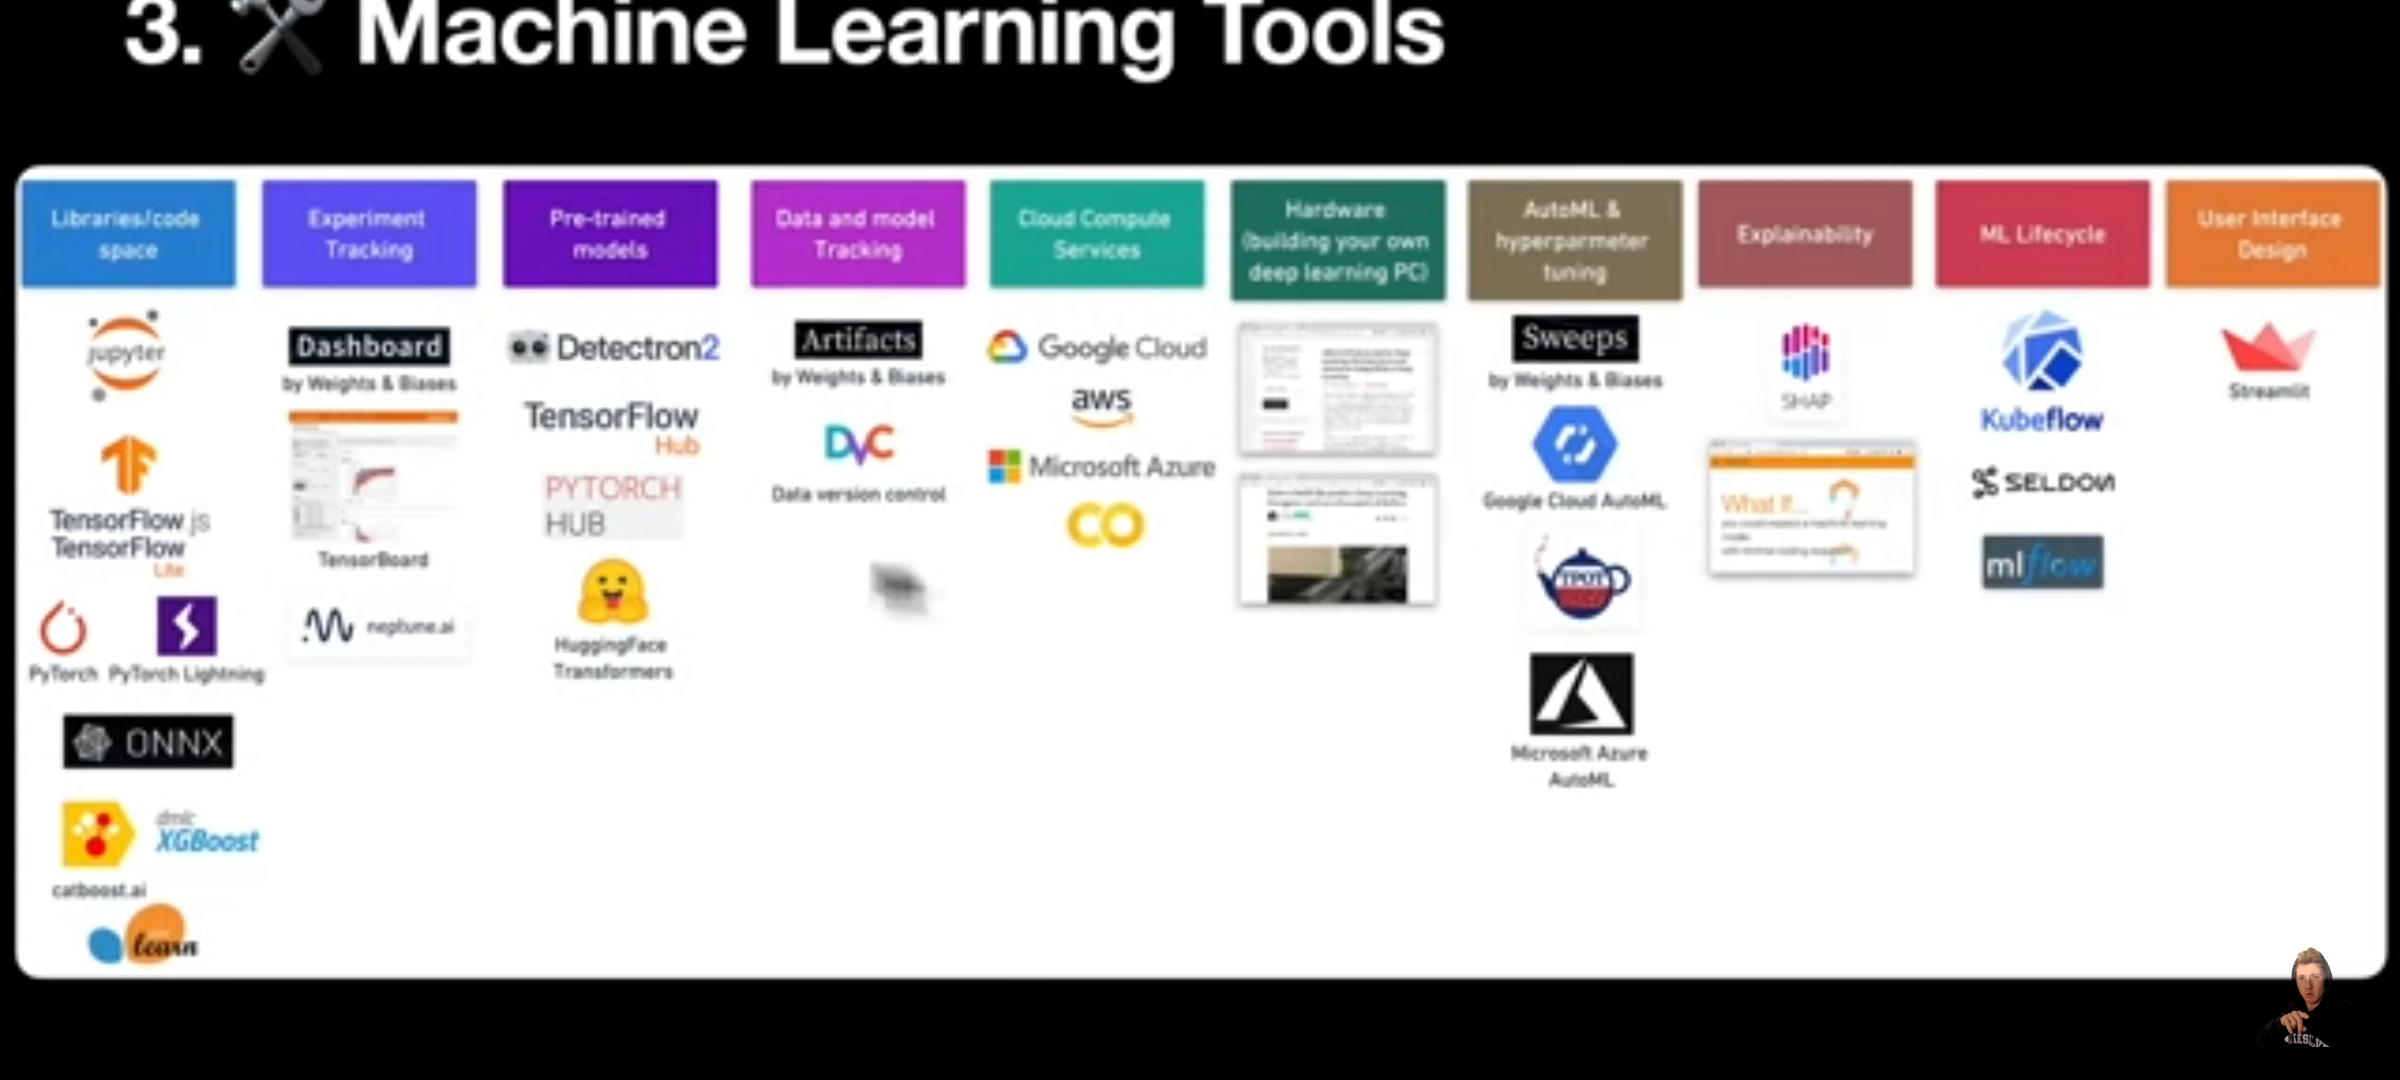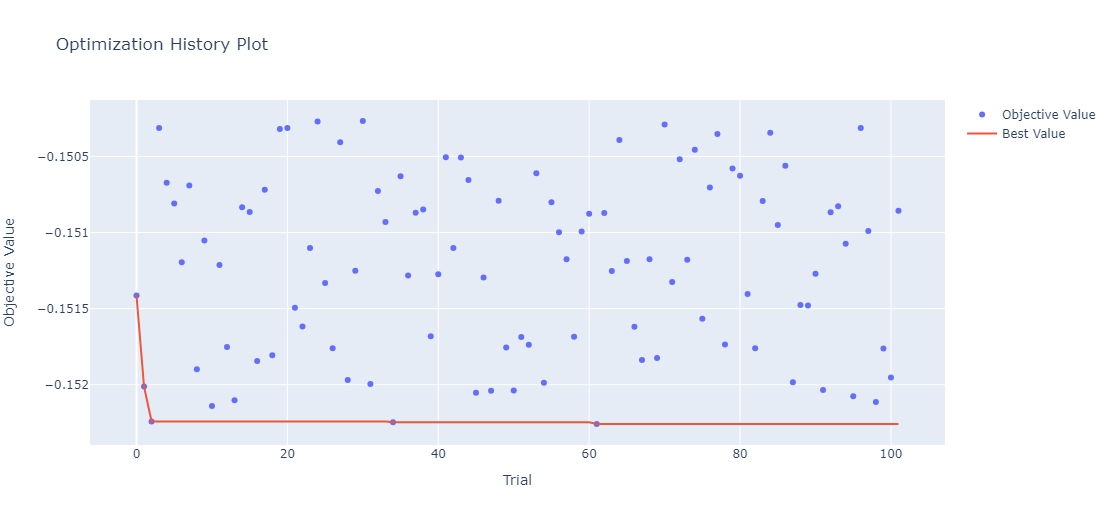)))
```
{'n_estimators': 113,
 'max_depth': 48,
 'min_samples_split': 15,
 'min_samples_leaf': 31}
```



In [ ]:
import matplotlib.pyplot as plt

In [ ]:
optuna.visualization.plot_optimization_history(study)

The plot of optimisation history using optuna


<img src="https://github.com/Shuraimi/Regression-with-Abalone-dataset/blob/main/newplot.png?raw=true" />

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

Parallel corodinate plot
<img src="https://github.com/Shuraimi/Regression-with-Abalone-dataset/blob/main/newplot%20(1).png?raw=true" />

In [ ]:
optuna.visualization.plot_slice(study,params=['n_estimators','max_depth','min_samples_split','min_samples_leaf'])

<img src="https://github.com/Shuraimi/Regression-with-Abalone-dataset/blob/main/newplot%20(2).png?raw=true" />

In [ ]:
optuna.visualization.plot_param_importances(study)

<img src="https://github.com/Shuraimi/Regression-with-Abalone-dataset/blob/main/newplot%20(3).png?raw=true" />

In [ ]:
# create best model
best_n_estimators=best_params['n_estimators']
best_max_depth=best_params['max_depth']
best_min_samples_split=best_params['min_samples_split']
best_min_samples_leaf=best_params['min_samples_leaf']

In [ ]:
best_model=RandomForestRegressor(n_estimators=best_n_estimators,
max_depth=best_max_depth,
min_samples_split=best_min_samples_split,
min_samples_leaf=best_min_samples_leaf)

In [ ]:
best_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=48, min_samples_leaf=31, min_samples_split=15,
                      n_estimators=113)

In [ ]:
y_pred=best_model.predict(X_valid)

In [ ]:
RMSLE(y_valid,y_pred)

0.1545729871163064

In [ ]:
preds=best_model.predict(data_test.drop('id',axis=1))
preds=pd.Series(preds)
# create a initial submission dataframe for this model
ids=data_test.id
submission=pd.DataFrame({'id':ids,
                        'Rings':preds})

submission.to_csv('sub_optuna_rand.csv',index=False)

## Trying model using `XGRegressor`

How GradientBoosting Regressor works?

Random forest is an ensemble method combining predictions of several models and then averaging their predictions.

Gradient boosting is a method that goes through cycles to iteratively add models to ensemble.

It begins by initialising the ensemble with a single model, whose predictions can be pretty naive.(Even is it's predictions are wild inaccurate, subsequent additions to ensemble will address those errors.)

Then we start the cycle:-
- First, we use the current ensemble to generate predictions for each observation in the dataset. To make predictions, we add predictions from all the models in the ensemble.
- These predictions are used to calculate a loss function.
- Then we use the predictions to train a new model that'll be added to the ensemble. Specifically, we determine model parameters so that adding this new model to ensemble will reduce the loss.(The "gradient" in "gradient boosting" refers to the fact that we'll use gradient descent on the loss function to determine the parameters in this new model.)
- Finally we add new model to ensemble and
- Then repeat

<img src="https://github.com/Shuraimi/demo/assets/92625656/74bdd35b-78e4-461a-822c-6f67eef73a57"/>

Parameter tuning
XGBoost has a few parameters that can drastically affect accuracy and training speed.
1. `n_estimators` - specifies how many times to go through the modelling cycle described above.

- Too low value causes underfitting and too high value causes overfitting.
8
Typical parameter range 100-1000 though this greatly depends on the `learning_rate`

In [ ]:
model_x=XGBRegressor(n_estimators=500)
model_x.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_preds=model_x.predict(X_valid)
RMSLE(y_valid,y_preds)

0.1558565508515095

2. `early_stopping_rounds` - offers a way to automatically find the ideal value of 'n_estimators`. Early stopping causes the model to stop iterating when validation score starts improving even if we aren't at the hard stop for `n_estimators`.

It's smart to set a high value of `n_estimators` and then use `early_stopping_rounds` to find optimal time to stop iterating.

Since random chance causes a single round where validation scores don't improve, you need to specify a number for how many straight deteriorations to allow before stopping. Setting `early_stopping_rounds=5` is a reasonable choice.

When using early stopping, you need to set aside some data to calculate validation scores which is done by setting `eval_set` parameter.

In [ ]:
model_x=XGBRegressor(n_estimators=500,early_stopping_rounds=5)
model_x.fit(X_train,y_train,
eval_set=[(X_train,y_train),(X_valid,y_valid)])

[0]	validation_0-rmse:2.63605	validation_1-rmse:2.63172
[1]	validation_0-rmse:2.31358	validation_1-rmse:2.31203
[2]	validation_0-rmse:2.11967	validation_1-rmse:2.12287
[3]	validation_0-rmse:2.01179	validation_1-rmse:2.02003
[4]	validation_0-rmse:1.94693	validation_1-rmse:1.95996
[5]	validation_0-rmse:1.90989	validation_1-rmse:1.92582
[6]	validation_0-rmse:1.88580	validation_1-rmse:1.90588
[7]	validation_0-rmse:1.87115	validation_1-rmse:1.89542
[8]	validation_0-rmse:1.85941	validation_1-rmse:1.88675
[9]	validation_0-rmse:1.84996	validation_1-rmse:1.87982
[10]	validation_0-rmse:1.84122	validation_1-rmse:1.87295
[11]	validation_0-rmse:1.83592	validation_1-rmse:1.86980
[12]	validation_0-rmse:1.82739	validation_1-rmse:1.86648
[13]	validation_0-rmse:1.82173	validation_1-rmse:1.86590
[14]	validation_0-rmse:1.81690	validation_1-rmse:1.86535
[15]	validation_0-rmse:1.81088	validation_1-rmse:1.86343
[16]	validation_0-rmse:1.80840	validation_1-rmse:1.86333
[17]	validation_0-rmse:1.80627	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=5,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

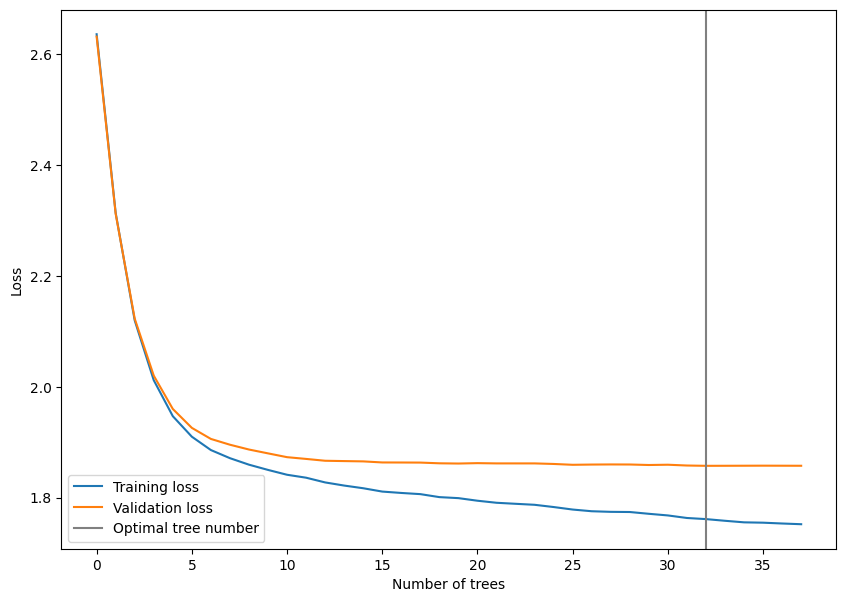

In [ ]:
results = model_x.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(32, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model_x.best_iteration

32

If you later want to fit a model on all your data, then set the value of `n_estimator` you found in this step.

In [ ]:
model_x=XGBRegressor(n_estimators=32)
model_x.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=32, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_preds=model_x.predict(X_valid)
RMSLE(y_valid,y_preds)

0.1521031032320067

3. `learning_rate` - Instead of getting predictions by adding up the predictions of each component model, we can multiply the predictions of each component model by a small number called learning rate before adding them.

This means each tree we add to the ensemble helps us less. So we can set a higher value of `n_estimators` without overfitting and if we use early stopping rounds, the appropriate value of number of trees will be determined automatically.

In general a smaller learning rate and higher n_estimators will lead to more accurate predictions though it takes a longer time to train the model. By default learning rate =0.1

In [ ]:
model_x=XGBRegressor(n_estimators=500,early_stopping_rounds=5,learning_rate=0.05)
model_x.fit(X_train,y_train,eval_set=[(X_valid,y_valid)],verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=5,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_preds=model_x.predict(X_valid)
RMSLE(y_valid,y_preds)

0.1512239295962722

4. `n_jobs` - On large datasets where runtime is a consideration, use can use parallelism to build your models faster. It's common tom set the paramter to number of cores on your machine. On smaller datasets, it won't help.

The resulting model won't be any better but is useful when you have large datasets where you have to spend a long time waiting fir fit.

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor

# initialise the model
model_x=XGBRegressor()

# fit the model
model_x.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# evaluate the model on validation set
y_preds=model_x.predict(X_valid)
RMSLE(y_valid,y_preds)

0.1521133590610296

In [ ]:
y_preds

0         9.778570
1         9.645947
2        10.271588
3        10.561850
4         7.558650
           ...    
60406     6.432487
60407     9.560993
60408    12.760783
60409    13.510443
60410     8.587663
Length: 60411, dtype: float32

In [ ]:
# create a submission file for this XBGRegressor initial
y_preds=model_x.predict(data_test.drop('id',axis=1))
y_preds=pd.Series(y_preds)
# create a initial submission dataframe for this model
ids=data_test.id
submission=pd.DataFrame({'id':ids,
                        'Rings':y_preds})

submission.to_csv('sub_xbgreg.csv',index=False)

In [ ]:
r=pd.read_csv('sub_xbgreg.csv')

In [ ]:
r

id      Rings
0       90615   9.778570
1       90616   9.645947
2       90617  10.271588
3       90618  10.561850
4       90619   7.558650
...       ...        ...
60406  151021   6.432487
60407  151022   9.560993
60408  151023  12.760783
60409  151024  13.510443
60410  151025   8.587663

[60411 rows x 2 columns]

In [ ]:
data_test

id  Length  Diameter  Height  Whole weight  Whole weight.1  \
0       90615   0.645     0.475   0.155        1.2380          0.6185   
1       90616   0.580     0.460   0.160        0.9830          0.4785   
2       90617   0.560     0.420   0.140        0.8395          0.3525   
3       90618   0.570     0.490   0.145        0.8740          0.3525   
4       90619   0.415     0.325   0.110        0.3580          0.1575   
...       ...     ...       ...     ...           ...             ...   
60406  151021   0.345     0.260   0.085        0.1775          0.0735   
60407  151022   0.525     0.410   0.145        0.8445          0.3885   
60408  151023   0.590     0.440   0.155        1.1220          0.3930   
60409  151024   0.660     0.525   0.190        1.4935          0.5885   
60410  151025   0.430     0.340   0.120        0.4150          0.1525   

       Whole weight.2  Shell weight  Sex-codes  
0              0.3125        0.3005          2  
1              0.2195        0.2750          2  
2              0.1845        0.2405          2  
3              0.1865        0.2350          2  
4              0.0670        0.1050          1  
...               ...           ...        ...  
60406          0.0265        0.0500          1  
60407          0.1670        0.2050          0  
60408          0.2000        0.2650          1  
60409          0.3575        0.4350          0  
60410          0.0910        0.0905          0  

[60411 rows x 9 columns]

In [ ]:
# XGBRgeressor with a few parameter tuning
from xgboost import XGBRegressor
model_x=XGBRegressor(n_estimators=500,early_stopping_rounds=5)
model_x.fit(X_train,y_train,eval_set=[(X_valid,y_valid)])

[0]	validation_0-rmse:2.63769
[1]	validation_0-rmse:2.32835
[2]	validation_0-rmse:2.14350
[3]	validation_0-rmse:2.04447
[4]	validation_0-rmse:1.98115
[5]	validation_0-rmse:1.94995
[6]	validation_0-rmse:1.92991
[7]	validation_0-rmse:1.91715
[8]	validation_0-rmse:1.90885
[9]	validation_0-rmse:1.90116
[10]	validation_0-rmse:1.89811
[11]	validation_0-rmse:1.89523
[12]	validation_0-rmse:1.89152
[13]	validation_0-rmse:1.89027
[14]	validation_0-rmse:1.88946
[15]	validation_0-rmse:1.88984
[16]	validation_0-rmse:1.88901
[17]	validation_0-rmse:1.88818
[18]	validation_0-rmse:1.88723
[19]	validation_0-rmse:1.88711
[20]	validation_0-rmse:1.88682
[21]	validation_0-rmse:1.88565
[22]	validation_0-rmse:1.88402
[23]	validation_0-rmse:1.88336
[24]	validation_0-rmse:1.88341
[25]	validation_0-rmse:1.88278
[26]	validation_0-rmse:1.88216
[27]	validation_0-rmse:1.88154
[28]	validation_0-rmse:1.88149
[29]	validation_0-rmse:1.88158
[30]	validation_0-rmse:1.88080
[31]	validation_0-rmse:1.87961
[32]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=5,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# finding the best value of n_estimators
model_x.best_iteration

54

In [ ]:
# setting the n_estimators as the value got above
model_x=XGBRegressor(n_estimators=54,learning_rate=0.05)
model_x.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=54, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# create a submission file for this XBGRegressor with a few paramter tuning
y_preds=model_x.predict(data_test.drop('id',axis=1))
y_preds=pd.Series(y_preds)
# create a initial submission dataframe for this model
ids=data_test.id
submission=pd.DataFrame({'id':ids,
                        'Rings':y_preds})

submission.to_csv('sub_xbgreg_param_tune.csv',index=False)

### XGBRegressor with a hyperparameter tuning with Optuna

In [ ]:
!pip install optuna
import optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 8.9 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBRegressor

def objective(trial):
    hyper_params={
        # 'tree_method':'gpu_hist',
        'n_estimators':trial.suggest_int('n_estimators',100,1000),
        'learning_rate':trial.suggest_float('learning_rate',0.01,0.1),
        'max_depth':trial.suggest_int('max_depth',3,10),
        'min_child_weight':trial.suggest_int('min_child_weight',1,300),
        'lambda':trial.suggest_loguniform('lambda',1e-3,10.0),
        'alpha':trial.suggest_loguniform('alpha',1e-3,10.0),
        'colsample_bytree':trial.suggest_categorical('colsample_bytree',[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]),
        'subsample':trial.suggest_categorical('subsample',[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]),
        'random_state':trial.suggest_categorical('random_state',[2020])
    }
    model=XGBRegressor(**hyper_params,early_stopping_rounds=100)
    model.fit(X_train,y_train,eval_set=[(X_valid,y_valid)],verbose=False)

    y_preds=model.predict(X_valid)
    score=RMSLE(y_valid,y_preds)
    return score

In [ ]:
study=optuna.create_study(direction='minimize',sampler=optuna.samplers.RandomSampler(seed=42))

[I 2024-04-30 10:05:56,978] A new study created in memory with name: no-name-d0e743bb-ceeb-4353-b518-1c51dafd4ba2


I've uncommented the optimize because it takes a lot of time to optimize)

In [ ]:
%%time
#study.optimize(objective,n_trials=100)

<ipython-input-38-73bcf710b8d6>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda':trial.suggest_loguniform('lambda',1e-3,10.0),
<ipython-input-38-73bcf710b8d6>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha':trial.suggest_loguniform('alpha',1e-3,10.0),
[I 2024-04-30 10:20:01,544] Trial 30 finished with value: 0.14955098136059616 and parameters: {'n_estimators': 420, 'learning_rate': 0.09878637239136817, 'max_depth': 7, 'min_child_weight': 72, 'lambda': 0.002553464888670847, 'alpha': 0.004087300390305747, 'colsample_bytree': 0.8, 'subsample': 0.4, 'random_state': 2020}. Best is trial 27 with value: 0.1489257257237467.
<ipython-input-38-73bcf710b8d6>:10

CPU times: user 15min 38s, sys: 4.65 s, total: 15min 43s
Wall time: 8min 51s


In [ ]:
best_params=study.best_params
best_params

{'n_estimators': 752,
 'learning_rate': 0.020850257476332124,
 'max_depth': 10,
 'min_child_weight': 20,
 'lambda': 0.13673191305856663,
 'alpha': 0.0037029555187202048,
 'colsample_bytree': 0.7,
 'subsample': 0.6,
 'random_state': 2020}

Best params trial 30


```
best_params=study.best_params
best_params
{'n_estimators': 908,
 'learning_rate': 0.05265654762365852,
 'max_depth': 8,
 'min_child_weight': 52,
 'lambda': 0.005877005203443299,
 'alpha': 0.0014570500329756531,
 'colsample_bytree': 0.8,
 'subsample': 1.0,
 'random_state': 2020}```



Best params with trial 130


```
best_params=study.best_params
best_params
{'n_estimators': 752,
 'learning_rate': 0.020850257476332124,
 'max_depth': 10,
 'min_child_weight': 20,
 'lambda': 0.13673191305856663,
 'alpha': 0.0037029555187202048,
 'colsample_bytree': 0.7,
 'subsample': 0.6,
 'random_state': 2020}```



#### Visualize

In [ ]:
# shows the scores from all trials as well as the best score so far at each point
optuna.visualization.plot_optimization_history(study)

<img src='https://github.com/Shuraimi/Regression-with-Abalone-dataset/blob/main/newplot%20(4).png?raw=true' />

In [ ]:
# interactively visualises the hyperparameters and the scores
optuna.visualization.plot_parallel_coordinate(study)

<img src='https://github.com/Shuraimi/Regression-with-Abalone-dataset/blob/main/newplot%20(5).png?raw=true'/>

In [ ]:
# shows the evolution of the search
# you can see where in the hyperparameter sapce your search went and which parts of the sapce were explored more
optuna.visualization.plot_slice(study)

In [ ]:
# plots parameter interactions on an interactive chart.
# You can choose wgich hyperparameters ypu would like to explore
optuna.visualization.plot_contour(study,params=['alpha','lambda','subsample','learning_rate'])

<img src='https://github.com/Shuraimi/Regression-with-Abalone-dataset/blob/main/newplot%20(6).png?raw=true'/>

In [ ]:
optuna.visualization.plot_param_importances(study)

<img src='https://raw.githubusercontent.com/Shuraimi/Regression-with-Abalone-dataset/main/importances.png'/>

In [ ]:
# now train model on these parameters
model=XGBRegressor(**best_params)
model.fit(X,y)

XGBRegressor(alpha=0.0037029555187202048, base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, lambda=0.13673191305856663,
             learning_rate=0.020850257476332124, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=20, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=752, n_jobs=None, ...)

In [ ]:
y_preds=model.predict(data_test.drop('id',axis=1))
preds=pd.Series(y_preds)
ids=pd.Series(data_test['id'])
sub=pd.DataFrame({'id':ids,
                 'Rings':y_preds})
sub.to_csv('XGB_tune_optuna_trail120.csv',index=False)

#### Looking at the plot of hyperparameter importances, the following hyperparameters have importance of 91%

- `learning_rate`
- `colsample_bytree`
- 'max_depth`

So define objective function which suggests these parameters and keeping the rest hyperparameters fixed.

In [ ]:
tuned_params={'n_estimators': 752,    'min_child_weight': 20,
    'lambda': 0.13673191305856663,
    'alpha': 0.0037029555187202048,
    'subsample': 0.6,
    'random_state': 2020,}

In [ ]:
from xgboost import XGBRegressor

def objective(trial):

    learning_rate=trial.suggest_float('learning_rate',0.01,0.1)
    max_depth=trial.suggest_int('max_depth',3,10)
    colsample_bytree = trial.suggest_categorical('colsample_bytree', [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

    model = XGBRegressor(**tuned_params, learning_rate=learning_rate, colsample_bytree=colsample_bytree, max_depth=max_depth, early_stopping_rounds=100)
    model.fit(X_train, y_train, eval_set=[(X_valid,y_valid)])
    y_preds=model.predict(X_valid)
    score=RMSLE(y_valid,y_preds)
    return score

In [ ]:
study=optuna.create_study(direction='minimize', sampler=optuna.samplers.RandomSampler(seed=42))

[I 2024-04-30 16:18:05,544] A new study created in memory with name: no-name-d8702dcb-2cd3-4c10-9f5e-139154ff8a8c


In [ ]:

%%time
#study.optimize(objective,n_trials=100)

[0]	validation_0-rmse:3.09120
[1]	validation_0-rmse:3.00739
[2]	validation_0-rmse:2.92957
[3]	validation_0-rmse:2.85620
[4]	validation_0-rmse:2.78683
[5]	validation_0-rmse:2.72244
[6]	validation_0-rmse:2.67381
[7]	validation_0-rmse:2.61939
[8]	validation_0-rmse:2.56860
[9]	validation_0-rmse:2.52119
[10]	validation_0-rmse:2.47690
[11]	validation_0-rmse:2.43167
[12]	validation_0-rmse:2.38931
[13]	validation_0-rmse:2.34919
[14]	validation_0-rmse:2.31616
[15]	validation_0-rmse:2.28100
[16]	validation_0-rmse:2.24912
[17]	validation_0-rmse:2.22095
[18]	validation_0-rmse:2.19385
[19]	validation_0-rmse:2.16783
[20]	validation_0-rmse:2.14386
[21]	validation_0-rmse:2.12178
[22]	validation_0-rmse:2.10126
[23]	validation_0-rmse:2.08249
[24]	validation_0-rmse:2.06598
[25]	validation_0-rmse:2.05022
[26]	validation_0-rmse:2.03421
[27]	validation_0-rmse:2.02044
[28]	validation_0-rmse:2.00727
[29]	validation_0-rmse:1.99719
[30]	validation_0-rmse:1.98593
[31]	validation_0-rmse:1.97483
[32]	validation_0-

[I 2024-04-30 16:18:16,595] Trial 0 finished with value: 0.1498233196725262 and parameters: {'learning_rate': 0.04370861069626263, 'max_depth': 10, 'colsample_bytree': 0.8}. Best is trial 0 with value: 0.1498233196725262.


[0]	validation_0-rmse:3.15599
[1]	validation_0-rmse:3.13666
[2]	validation_0-rmse:3.12037
[3]	validation_0-rmse:3.09982
[4]	validation_0-rmse:3.08304
[5]	validation_0-rmse:3.06844
[6]	validation_0-rmse:3.05227
[7]	validation_0-rmse:3.03762
[8]	validation_0-rmse:3.02403
[9]	validation_0-rmse:3.00853
[10]	validation_0-rmse:2.98917
[11]	validation_0-rmse:2.97073
[12]	validation_0-rmse:2.95220
[13]	validation_0-rmse:2.93864
[14]	validation_0-rmse:2.92105
[15]	validation_0-rmse:2.90918
[16]	validation_0-rmse:2.88989
[17]	validation_0-rmse:2.87636
[18]	validation_0-rmse:2.86301
[19]	validation_0-rmse:2.84668
[20]	validation_0-rmse:2.83096
[21]	validation_0-rmse:2.82025
[22]	validation_0-rmse:2.81035
[23]	validation_0-rmse:2.79822
[24]	validation_0-rmse:2.78810
[25]	validation_0-rmse:2.77708
[26]	validation_0-rmse:2.76207
[27]	validation_0-rmse:2.75067
[28]	validation_0-rmse:2.73968
[29]	validation_0-rmse:2.72996
[30]	validation_0-rmse:2.72134
[31]	validation_0-rmse:2.70735
[32]	validation_0-

[I 2024-04-30 16:18:29,414] Trial 1 finished with value: 0.15211448250147425 and parameters: {'learning_rate': 0.011852604486622221, 'max_depth': 10, 'colsample_bytree': 0.3}. Best is trial 0 with value: 0.1498233196725262.


[0]	validation_0-rmse:3.06816
[1]	validation_0-rmse:2.96522
[2]	validation_0-rmse:2.87217
[3]	validation_0-rmse:2.78802
[4]	validation_0-rmse:2.72307
[5]	validation_0-rmse:2.65233
[6]	validation_0-rmse:2.59994
[7]	validation_0-rmse:2.55305
[8]	validation_0-rmse:2.51627
[9]	validation_0-rmse:2.46950
[10]	validation_0-rmse:2.42473
[11]	validation_0-rmse:2.38626
[12]	validation_0-rmse:2.34366
[13]	validation_0-rmse:2.31487
[14]	validation_0-rmse:2.28684
[15]	validation_0-rmse:2.26014
[16]	validation_0-rmse:2.23444
[17]	validation_0-rmse:2.21747
[18]	validation_0-rmse:2.20348
[19]	validation_0-rmse:2.18395
[20]	validation_0-rmse:2.16808
[21]	validation_0-rmse:2.15443
[22]	validation_0-rmse:2.14167
[23]	validation_0-rmse:2.13154
[24]	validation_0-rmse:2.11870
[25]	validation_0-rmse:2.10818
[26]	validation_0-rmse:2.09134
[27]	validation_0-rmse:2.07998
[28]	validation_0-rmse:2.06542
[29]	validation_0-rmse:2.05923
[30]	validation_0-rmse:2.05009
[31]	validation_0-rmse:2.03792
[32]	validation_0-

[I 2024-04-30 16:18:37,942] Trial 2 finished with value: 0.15019896154922338 and parameters: {'learning_rate': 0.06506676052501416, 'max_depth': 4, 'colsample_bytree': 0.6}. Best is trial 0 with value: 0.1498233196725262.


[0]	validation_0-rmse:3.06878
[1]	validation_0-rmse:2.96638
[2]	validation_0-rmse:2.87378
[3]	validation_0-rmse:2.78997
[4]	validation_0-rmse:2.72525
[5]	validation_0-rmse:2.65472
[6]	validation_0-rmse:2.60244
[7]	validation_0-rmse:2.55562
[8]	validation_0-rmse:2.51886
[9]	validation_0-rmse:2.47211
[10]	validation_0-rmse:2.42736
[11]	validation_0-rmse:2.38887
[12]	validation_0-rmse:2.34627
[13]	validation_0-rmse:2.31742
[14]	validation_0-rmse:2.28933
[15]	validation_0-rmse:2.26257
[16]	validation_0-rmse:2.23681
[17]	validation_0-rmse:2.21975
[18]	validation_0-rmse:2.20567
[19]	validation_0-rmse:2.18582
[20]	validation_0-rmse:2.16991
[21]	validation_0-rmse:2.15677
[22]	validation_0-rmse:2.14391
[23]	validation_0-rmse:2.13361
[24]	validation_0-rmse:2.12068
[25]	validation_0-rmse:2.11013
[26]	validation_0-rmse:2.09319
[27]	validation_0-rmse:2.08172
[28]	validation_0-rmse:2.06706
[29]	validation_0-rmse:2.06087
[30]	validation_0-rmse:2.05166
[31]	validation_0-rmse:2.03943
[32]	validation_0-

[I 2024-04-30 16:18:45,639] Trial 3 finished with value: 0.15027576811947296 and parameters: {'learning_rate': 0.06467903667112945, 'max_depth': 4, 'colsample_bytree': 0.5}. Best is trial 0 with value: 0.1498233196725262.


[0]	validation_0-rmse:3.13708
[1]	validation_0-rmse:3.10002
[2]	validation_0-rmse:3.06211
[3]	validation_0-rmse:3.02507
[4]	validation_0-rmse:2.99676
[5]	validation_0-rmse:2.97102
[6]	validation_0-rmse:2.94462
[7]	validation_0-rmse:2.92084
[8]	validation_0-rmse:2.89883
[9]	validation_0-rmse:2.86876
[10]	validation_0-rmse:2.83949
[11]	validation_0-rmse:2.81216
[12]	validation_0-rmse:2.78255
[13]	validation_0-rmse:2.75752
[14]	validation_0-rmse:2.73213
[15]	validation_0-rmse:2.71317
[16]	validation_0-rmse:2.68621
[17]	validation_0-rmse:2.66671
[18]	validation_0-rmse:2.64806
[19]	validation_0-rmse:2.62632
[20]	validation_0-rmse:2.60492
[21]	validation_0-rmse:2.58880
[22]	validation_0-rmse:2.57327
[23]	validation_0-rmse:2.55749
[24]	validation_0-rmse:2.53794
[25]	validation_0-rmse:2.52290
[26]	validation_0-rmse:2.50151
[27]	validation_0-rmse:2.48598
[28]	validation_0-rmse:2.47087
[29]	validation_0-rmse:2.45860
[30]	validation_0-rmse:2.44264
[31]	validation_0-rmse:2.42408
[32]	validation_0-

[I 2024-04-30 16:18:56,107] Trial 4 finished with value: 0.15048457484130662 and parameters: {'learning_rate': 0.020983441136030095, 'max_depth': 6, 'colsample_bytree': 0.4}. Best is trial 0 with value: 0.1498233196725262.


[0]	validation_0-rmse:3.03074
[1]	validation_0-rmse:2.89387
[2]	validation_0-rmse:2.79331
[3]	validation_0-rmse:2.67289
[4]	validation_0-rmse:2.59294
[5]	validation_0-rmse:2.53510
[6]	validation_0-rmse:2.47689
[7]	validation_0-rmse:2.43280
[8]	validation_0-rmse:2.40036
[9]	validation_0-rmse:2.36192
[10]	validation_0-rmse:2.29868
[11]	validation_0-rmse:2.24952
[12]	validation_0-rmse:2.20490
[13]	validation_0-rmse:2.18720
[14]	validation_0-rmse:2.15388
[15]	validation_0-rmse:2.14310
[16]	validation_0-rmse:2.09995
[17]	validation_0-rmse:2.08937
[18]	validation_0-rmse:2.08050
[19]	validation_0-rmse:2.06252
[20]	validation_0-rmse:2.04591
[21]	validation_0-rmse:2.04282
[22]	validation_0-rmse:2.03681
[23]	validation_0-rmse:2.03255
[24]	validation_0-rmse:2.03116
[25]	validation_0-rmse:2.02660
[26]	validation_0-rmse:2.01510
[27]	validation_0-rmse:2.01268
[28]	validation_0-rmse:2.00253
[29]	validation_0-rmse:1.99552
[30]	validation_0-rmse:1.99211
[31]	validation_0-rmse:1.98304
[32]	validation_0-

[I 2024-04-30 16:19:03,094] Trial 5 finished with value: 0.15260047905939936 and parameters: {'learning_rate': 0.09726261649881028, 'max_depth': 9, 'colsample_bytree': 0.3}. Best is trial 0 with value: 0.1498233196725262.


[0]	validation_0-rmse:3.09113
[1]	validation_0-rmse:3.01270
[2]	validation_0-rmse:2.94038
[3]	validation_0-rmse:2.87167
[4]	validation_0-rmse:2.80673
[5]	validation_0-rmse:2.74623
[6]	validation_0-rmse:2.68950
[7]	validation_0-rmse:2.63721
[8]	validation_0-rmse:2.58755
[9]	validation_0-rmse:2.54041
[10]	validation_0-rmse:2.49633
[11]	validation_0-rmse:2.45630
[12]	validation_0-rmse:2.41928
[13]	validation_0-rmse:2.38387
[14]	validation_0-rmse:2.35058
[15]	validation_0-rmse:2.31985
[16]	validation_0-rmse:2.29098
[17]	validation_0-rmse:2.26433
[18]	validation_0-rmse:2.24014
[19]	validation_0-rmse:2.21752
[20]	validation_0-rmse:2.19573
[21]	validation_0-rmse:2.17563
[22]	validation_0-rmse:2.15784
[23]	validation_0-rmse:2.14038
[24]	validation_0-rmse:2.12512
[25]	validation_0-rmse:2.10944
[26]	validation_0-rmse:2.09461
[27]	validation_0-rmse:2.08161
[28]	validation_0-rmse:2.06909
[29]	validation_0-rmse:2.05783
[30]	validation_0-rmse:2.04734
[31]	validation_0-rmse:2.03700
[32]	validation_0-

[I 2024-04-30 16:19:13,233] Trial 6 finished with value: 0.14985692251997293 and parameters: {'learning_rate': 0.04498095607205339, 'max_depth': 5, 'colsample_bytree': 1.0}. Best is trial 0 with value: 0.1498233196725262.


[0]	validation_0-rmse:3.04540
[1]	validation_0-rmse:2.92798
[2]	validation_0-rmse:2.81908
[3]	validation_0-rmse:2.72214
[4]	validation_0-rmse:2.65002
[5]	validation_0-rmse:2.59509
[6]	validation_0-rmse:2.53980
[7]	validation_0-rmse:2.49711
[8]	validation_0-rmse:2.46097
[9]	validation_0-rmse:2.41136
[10]	validation_0-rmse:2.36537
[11]	validation_0-rmse:2.32782
[12]	validation_0-rmse:2.28384
[13]	validation_0-rmse:2.25930
[14]	validation_0-rmse:2.23231
[15]	validation_0-rmse:2.21665
[16]	validation_0-rmse:2.18521
[17]	validation_0-rmse:2.16883
[18]	validation_0-rmse:2.15557
[19]	validation_0-rmse:2.13827
[20]	validation_0-rmse:2.12379
[21]	validation_0-rmse:2.11386
[22]	validation_0-rmse:2.10603
[23]	validation_0-rmse:2.09747
[24]	validation_0-rmse:2.08527
[25]	validation_0-rmse:2.07856
[26]	validation_0-rmse:2.06091
[27]	validation_0-rmse:2.05210
[28]	validation_0-rmse:2.04405
[29]	validation_0-rmse:2.04020
[30]	validation_0-rmse:2.02816
[31]	validation_0-rmse:2.01509
[32]	validation_0-

[I 2024-04-30 16:19:22,332] Trial 7 finished with value: 0.1503940554381671 and parameters: {'learning_rate': 0.07950202923669918, 'max_depth': 4, 'colsample_bytree': 0.4}. Best is trial 0 with value: 0.1498233196725262.


[0]	validation_0-rmse:3.00451
[1]	validation_0-rmse:2.85389
[2]	validation_0-rmse:2.72329
[3]	validation_0-rmse:2.60889
[4]	validation_0-rmse:2.50738
[5]	validation_0-rmse:2.41932
[6]	validation_0-rmse:2.34694
[7]	validation_0-rmse:2.28460
[8]	validation_0-rmse:2.22952
[9]	validation_0-rmse:2.17906
[10]	validation_0-rmse:2.13466
[11]	validation_0-rmse:2.09653
[12]	validation_0-rmse:2.06397
[13]	validation_0-rmse:2.03532
[14]	validation_0-rmse:2.01333
[15]	validation_0-rmse:1.99230
[16]	validation_0-rmse:1.97409
[17]	validation_0-rmse:1.95959
[18]	validation_0-rmse:1.94643
[19]	validation_0-rmse:1.93518
[20]	validation_0-rmse:1.92467
[21]	validation_0-rmse:1.91627
[22]	validation_0-rmse:1.90865
[23]	validation_0-rmse:1.90299
[24]	validation_0-rmse:1.89735
[25]	validation_0-rmse:1.89309
[26]	validation_0-rmse:1.88772
[27]	validation_0-rmse:1.88357
[28]	validation_0-rmse:1.88069
[29]	validation_0-rmse:1.87665
[30]	validation_0-rmse:1.87394
[31]	validation_0-rmse:1.87177
[32]	validation_0-

[I 2024-04-30 16:19:27,310] Trial 8 finished with value: 0.1499886720327078 and parameters: {'learning_rate': 0.08767930832880343, 'max_depth': 7, 'colsample_bytree': 0.9}. Best is trial 0 with value: 0.1498233196725262.


[0]	validation_0-rmse:3.13577
[1]	validation_0-rmse:3.09545
[2]	validation_0-rmse:3.05665
[3]	validation_0-rmse:3.01892
[4]	validation_0-rmse:2.99043
[5]	validation_0-rmse:2.95432
[6]	validation_0-rmse:2.92763
[7]	validation_0-rmse:2.90132
[8]	validation_0-rmse:2.87888
[9]	validation_0-rmse:2.84836
[10]	validation_0-rmse:2.81868
[11]	validation_0-rmse:2.79071
[12]	validation_0-rmse:2.76081
[13]	validation_0-rmse:2.73361
[14]	validation_0-rmse:2.70768
[15]	validation_0-rmse:2.68209
[16]	validation_0-rmse:2.65502
[17]	validation_0-rmse:2.63549
[18]	validation_0-rmse:2.61650
[19]	validation_0-rmse:2.59365
[20]	validation_0-rmse:2.57199
[21]	validation_0-rmse:2.55286
[22]	validation_0-rmse:2.53420
[23]	validation_0-rmse:2.51655
[24]	validation_0-rmse:2.49693
[25]	validation_0-rmse:2.47747
[26]	validation_0-rmse:2.45627
[27]	validation_0-rmse:2.43754
[28]	validation_0-rmse:2.41816
[29]	validation_0-rmse:2.40344
[30]	validation_0-rmse:2.38641
[31]	validation_0-rmse:2.36839
[32]	validation_0-

[I 2024-04-30 16:19:40,056] Trial 9 finished with value: 0.14946769166123436 and parameters: {'learning_rate': 0.020763482134447155, 'max_depth': 8, 'colsample_bytree': 0.5}. Best is trial 9 with value: 0.14946769166123436.


[0]	validation_0-rmse:3.15029
[1]	validation_0-rmse:3.12510
[2]	validation_0-rmse:3.10058
[3]	validation_0-rmse:3.07646
[4]	validation_0-rmse:3.05805
[5]	validation_0-rmse:3.03453
[6]	validation_0-rmse:3.01688
[7]	validation_0-rmse:2.99931
[8]	validation_0-rmse:2.98406
[9]	validation_0-rmse:2.96338
[10]	validation_0-rmse:2.94297
[11]	validation_0-rmse:2.92350
[12]	validation_0-rmse:2.90251
[13]	validation_0-rmse:2.88339
[14]	validation_0-rmse:2.86471
[15]	validation_0-rmse:2.84606
[16]	validation_0-rmse:2.82630
[17]	validation_0-rmse:2.81158
[18]	validation_0-rmse:2.79708
[19]	validation_0-rmse:2.77968
[20]	validation_0-rmse:2.76298
[21]	validation_0-rmse:2.74807
[22]	validation_0-rmse:2.73334
[23]	validation_0-rmse:2.71910
[24]	validation_0-rmse:2.70331
[25]	validation_0-rmse:2.68764
[26]	validation_0-rmse:2.67049
[27]	validation_0-rmse:2.65515
[28]	validation_0-rmse:2.63901
[29]	validation_0-rmse:2.62631
[30]	validation_0-rmse:2.61182
[31]	validation_0-rmse:2.59634
[32]	validation_0-

[I 2024-04-30 16:19:53,996] Trial 10 finished with value: 0.14967307664514637 and parameters: {'learning_rate': 0.012828626711806084, 'max_depth': 8, 'colsample_bytree': 0.5}. Best is trial 9 with value: 0.14946769166123436.


[0]	validation_0-rmse:3.12150
[1]	validation_0-rmse:3.06749
[2]	validation_0-rmse:3.02486
[3]	validation_0-rmse:2.97368
[4]	validation_0-rmse:2.93125
[5]	validation_0-rmse:2.89647
[6]	validation_0-rmse:2.85865
[7]	validation_0-rmse:2.82633
[8]	validation_0-rmse:2.79708
[9]	validation_0-rmse:2.76439
[10]	validation_0-rmse:2.72542
[11]	validation_0-rmse:2.69141
[12]	validation_0-rmse:2.65700
[13]	validation_0-rmse:2.63407
[14]	validation_0-rmse:2.60426
[15]	validation_0-rmse:2.58513
[16]	validation_0-rmse:2.55192
[17]	validation_0-rmse:2.53086
[18]	validation_0-rmse:2.51121
[19]	validation_0-rmse:2.48748
[20]	validation_0-rmse:2.46499
[21]	validation_0-rmse:2.45206
[22]	validation_0-rmse:2.43975
[23]	validation_0-rmse:2.42492
[24]	validation_0-rmse:2.41424
[25]	validation_0-rmse:2.40296
[26]	validation_0-rmse:2.38525
[27]	validation_0-rmse:2.37308
[28]	validation_0-rmse:2.36265
[29]	validation_0-rmse:2.35469
[30]	validation_0-rmse:2.34657
[31]	validation_0-rmse:2.33118
[32]	validation_0-

[I 2024-04-30 16:20:05,475] Trial 11 finished with value: 0.15252686101037793 and parameters: {'learning_rate': 0.036077630762239125, 'max_depth': 4, 'colsample_bytree': 0.3}. Best is trial 9 with value: 0.14946769166123436.


[0]	validation_0-rmse:3.01894
[1]	validation_0-rmse:2.86976
[2]	validation_0-rmse:2.73934
[3]	validation_0-rmse:2.62347
[4]	validation_0-rmse:2.52121
[5]	validation_0-rmse:2.43185
[6]	validation_0-rmse:2.36865
[7]	validation_0-rmse:2.30096
[8]	validation_0-rmse:2.24305
[9]	validation_0-rmse:2.19316
[10]	validation_0-rmse:2.15016
[11]	validation_0-rmse:2.10744
[12]	validation_0-rmse:2.06964
[13]	validation_0-rmse:2.03729
[14]	validation_0-rmse:2.01409
[15]	validation_0-rmse:1.98914
[16]	validation_0-rmse:1.96937
[17]	validation_0-rmse:1.95268
[18]	validation_0-rmse:1.93753
[19]	validation_0-rmse:1.92366
[20]	validation_0-rmse:1.91220
[21]	validation_0-rmse:1.90243
[22]	validation_0-rmse:1.89458
[23]	validation_0-rmse:1.88778
[24]	validation_0-rmse:1.88230
[25]	validation_0-rmse:1.87691
[26]	validation_0-rmse:1.87147
[27]	validation_0-rmse:1.86732
[28]	validation_0-rmse:1.86333
[29]	validation_0-rmse:1.86099
[30]	validation_0-rmse:1.85821
[31]	validation_0-rmse:1.85526
[32]	validation_0-

[I 2024-04-30 16:20:09,669] Trial 12 finished with value: 0.15002380531695508 and parameters: {'learning_rate': 0.08266961396476563, 'max_depth': 10, 'colsample_bytree': 0.8}. Best is trial 9 with value: 0.14946769166123436.


[0]	validation_0-rmse:3.09048
[1]	validation_0-rmse:3.01312
[2]	validation_0-rmse:2.94138
[3]	validation_0-rmse:2.87460
[4]	validation_0-rmse:2.80963
[5]	validation_0-rmse:2.75158
[6]	validation_0-rmse:2.69693
[7]	validation_0-rmse:2.64504
[8]	validation_0-rmse:2.59674
[9]	validation_0-rmse:2.55183
[10]	validation_0-rmse:2.51012
[11]	validation_0-rmse:2.47127
[12]	validation_0-rmse:2.43581
[13]	validation_0-rmse:2.40214
[14]	validation_0-rmse:2.37022
[15]	validation_0-rmse:2.33960
[16]	validation_0-rmse:2.31314
[17]	validation_0-rmse:2.28724
[18]	validation_0-rmse:2.26464
[19]	validation_0-rmse:2.24382
[20]	validation_0-rmse:2.22343
[21]	validation_0-rmse:2.20463
[22]	validation_0-rmse:2.18609
[23]	validation_0-rmse:2.16928
[24]	validation_0-rmse:2.15446
[25]	validation_0-rmse:2.13998
[26]	validation_0-rmse:2.12619
[27]	validation_0-rmse:2.11336
[28]	validation_0-rmse:2.10165
[29]	validation_0-rmse:2.09109
[30]	validation_0-rmse:2.08069
[31]	validation_0-rmse:2.07006
[32]	validation_0-

[I 2024-04-30 16:20:21,288] Trial 13 finished with value: 0.1504017168345038 and parameters: {'learning_rate': 0.04756699028339011, 'max_depth': 4, 'colsample_bytree': 1.0}. Best is trial 9 with value: 0.14946769166123436.


[0]	validation_0-rmse:3.00777
[1]	validation_0-rmse:2.85234
[2]	validation_0-rmse:2.71885
[3]	validation_0-rmse:2.60373
[4]	validation_0-rmse:2.51040
[5]	validation_0-rmse:2.42289
[6]	validation_0-rmse:2.36226
[7]	validation_0-rmse:2.31177
[8]	validation_0-rmse:2.25851
[9]	validation_0-rmse:2.21451
[10]	validation_0-rmse:2.17600
[11]	validation_0-rmse:2.13690
[12]	validation_0-rmse:2.10304
[13]	validation_0-rmse:2.07799
[14]	validation_0-rmse:2.05759
[15]	validation_0-rmse:2.03294
[16]	validation_0-rmse:2.01392
[17]	validation_0-rmse:2.00125
[18]	validation_0-rmse:1.98860
[19]	validation_0-rmse:1.97434
[20]	validation_0-rmse:1.96266
[21]	validation_0-rmse:1.95301
[22]	validation_0-rmse:1.94594
[23]	validation_0-rmse:1.93826
[24]	validation_0-rmse:1.93344
[25]	validation_0-rmse:1.92687
[26]	validation_0-rmse:1.92081
[27]	validation_0-rmse:1.91623
[28]	validation_0-rmse:1.91260
[29]	validation_0-rmse:1.90986
[30]	validation_0-rmse:1.90654
[31]	validation_0-rmse:1.90328
[32]	validation_0-

[I 2024-04-30 16:20:32,584] Trial 14 finished with value: 0.15005797579322377 and parameters: {'learning_rate': 0.09662025654479002, 'max_depth': 5, 'colsample_bytree': 0.7}. Best is trial 9 with value: 0.14946769166123436.


[0]	validation_0-rmse:3.02587
[1]	validation_0-rmse:2.88703
[2]	validation_0-rmse:2.76640
[3]	validation_0-rmse:2.66221
[4]	validation_0-rmse:2.58516
[5]	validation_0-rmse:2.50343
[6]	validation_0-rmse:2.44727
[7]	validation_0-rmse:2.39933
[8]	validation_0-rmse:2.36397
[9]	validation_0-rmse:2.31463
[10]	validation_0-rmse:2.27440
[11]	validation_0-rmse:2.23946
[12]	validation_0-rmse:2.19994
[13]	validation_0-rmse:2.17597
[14]	validation_0-rmse:2.15321
[15]	validation_0-rmse:2.13397
[16]	validation_0-rmse:2.10712
[17]	validation_0-rmse:2.09553
[18]	validation_0-rmse:2.08654
[19]	validation_0-rmse:2.07267
[20]	validation_0-rmse:2.06254
[21]	validation_0-rmse:2.05393
[22]	validation_0-rmse:2.04492
[23]	validation_0-rmse:2.03654
[24]	validation_0-rmse:2.02808
[25]	validation_0-rmse:2.01790
[26]	validation_0-rmse:2.00508
[27]	validation_0-rmse:1.99722
[28]	validation_0-rmse:1.98747
[29]	validation_0-rmse:1.98308
[30]	validation_0-rmse:1.97627
[31]	validation_0-rmse:1.96869
[32]	validation_0-

[I 2024-04-30 16:20:44,469] Trial 15 finished with value: 0.15013963586318113 and parameters: {'learning_rate': 0.09174392973699884, 'max_depth': 4, 'colsample_bytree': 0.5}. Best is trial 9 with value: 0.14946769166123436.


[0]	validation_0-rmse:3.09519
[1]	validation_0-rmse:3.01451
[2]	validation_0-rmse:2.93920
[3]	validation_0-rmse:2.86817
[4]	validation_0-rmse:2.81639
[5]	validation_0-rmse:2.75227
[6]	validation_0-rmse:2.70700
[7]	validation_0-rmse:2.66381
[8]	validation_0-rmse:2.62851
[9]	validation_0-rmse:2.58065
[10]	validation_0-rmse:2.53548
[11]	validation_0-rmse:2.49492
[12]	validation_0-rmse:2.45189
[13]	validation_0-rmse:2.41365
[14]	validation_0-rmse:2.37954
[15]	validation_0-rmse:2.34710
[16]	validation_0-rmse:2.31297
[17]	validation_0-rmse:2.29095
[18]	validation_0-rmse:2.27018
[19]	validation_0-rmse:2.24483
[20]	validation_0-rmse:2.22188
[21]	validation_0-rmse:2.20203
[22]	validation_0-rmse:2.18336
[23]	validation_0-rmse:2.16680
[24]	validation_0-rmse:2.14867
[25]	validation_0-rmse:2.12950
[26]	validation_0-rmse:2.10940
[27]	validation_0-rmse:2.09205
[28]	validation_0-rmse:2.07558
[29]	validation_0-rmse:2.06457
[30]	validation_0-rmse:2.05052
[31]	validation_0-rmse:2.03667
[32]	validation_0-

[I 2024-04-30 16:20:54,057] Trial 16 finished with value: 0.14954776964717656 and parameters: {'learning_rate': 0.043100481944732795, 'max_depth': 8, 'colsample_bytree': 0.6}. Best is trial 9 with value: 0.14946769166123436.


[0]	validation_0-rmse:3.06349
[1]	validation_0-rmse:2.96461
[2]	validation_0-rmse:2.87485
[3]	validation_0-rmse:2.79304
[4]	validation_0-rmse:2.71869
[5]	validation_0-rmse:2.64838
[6]	validation_0-rmse:2.59116
[7]	validation_0-rmse:2.54304
[8]	validation_0-rmse:2.49587
[9]	validation_0-rmse:2.44748
[10]	validation_0-rmse:2.40653
[11]	validation_0-rmse:2.36766
[12]	validation_0-rmse:2.33402
[13]	validation_0-rmse:2.30271
[14]	validation_0-rmse:2.27803
[15]	validation_0-rmse:2.25130
[16]	validation_0-rmse:2.23129
[17]	validation_0-rmse:2.21104
[18]	validation_0-rmse:2.19449
[19]	validation_0-rmse:2.17593
[20]	validation_0-rmse:2.15814
[21]	validation_0-rmse:2.14543
[22]	validation_0-rmse:2.13356
[23]	validation_0-rmse:2.11989
[24]	validation_0-rmse:2.10673
[25]	validation_0-rmse:2.09673
[26]	validation_0-rmse:2.08511
[27]	validation_0-rmse:2.07441
[28]	validation_0-rmse:2.06686
[29]	validation_0-rmse:2.06059
[30]	validation_0-rmse:2.05160
[31]	validation_0-rmse:2.04484
[32]	validation_0-

[I 2024-04-30 16:21:05,992] Trial 17 finished with value: 0.150766137763001 and parameters: {'learning_rate': 0.07098079256580542, 'max_depth': 3, 'colsample_bytree': 0.9}. Best is trial 9 with value: 0.14946769166123436.


[0]	validation_0-rmse:3.11638
[1]	validation_0-rmse:3.05739
[2]	validation_0-rmse:3.01288
[3]	validation_0-rmse:2.96059
[4]	validation_0-rmse:2.91568
[5]	validation_0-rmse:2.87908
[6]	validation_0-rmse:2.83979
[7]	validation_0-rmse:2.80613
[8]	validation_0-rmse:2.77579
[9]	validation_0-rmse:2.74301
[10]	validation_0-rmse:2.70654
[11]	validation_0-rmse:2.67363
[12]	validation_0-rmse:2.64227
[13]	validation_0-rmse:2.62001
[14]	validation_0-rmse:2.59230
[15]	validation_0-rmse:2.57477
[16]	validation_0-rmse:2.54712
[17]	validation_0-rmse:2.52738
[18]	validation_0-rmse:2.50904
[19]	validation_0-rmse:2.48778
[20]	validation_0-rmse:2.46826
[21]	validation_0-rmse:2.45642
[22]	validation_0-rmse:2.44510
[23]	validation_0-rmse:2.43174
[24]	validation_0-rmse:2.42228
[25]	validation_0-rmse:2.41268
[26]	validation_0-rmse:2.39817
[27]	validation_0-rmse:2.38662
[28]	validation_0-rmse:2.37790
[29]	validation_0-rmse:2.37062
[30]	validation_0-rmse:2.36345
[31]	validation_0-rmse:2.34979
[32]	validation_0-

[I 2024-04-30 16:21:18,112] Trial 18 finished with value: 0.15376030357306616 and parameters: {'learning_rate': 0.04069597159452327, 'max_depth': 3, 'colsample_bytree': 0.3}. Best is trial 9 with value: 0.14946769166123436.


[0]	validation_0-rmse:3.14619
[1]	validation_0-rmse:3.11652
[2]	validation_0-rmse:3.09177
[3]	validation_0-rmse:3.06067
[4]	validation_0-rmse:3.03562
[5]	validation_0-rmse:3.01411
[6]	validation_0-rmse:2.99047
[7]	validation_0-rmse:2.96927
[8]	validation_0-rmse:2.94991
[9]	validation_0-rmse:2.92782
[10]	validation_0-rmse:2.89993
[11]	validation_0-rmse:2.87368
[12]	validation_0-rmse:2.84749
[13]	validation_0-rmse:2.82898
[14]	validation_0-rmse:2.80449
[15]	validation_0-rmse:2.78871
[16]	validation_0-rmse:2.76201
[17]	validation_0-rmse:2.74414
[18]	validation_0-rmse:2.72675
[19]	validation_0-rmse:2.70507
[20]	validation_0-rmse:2.68438
[21]	validation_0-rmse:2.67109
[22]	validation_0-rmse:2.65885
[23]	validation_0-rmse:2.64377
[24]	validation_0-rmse:2.63163
[25]	validation_0-rmse:2.61822
[26]	validation_0-rmse:2.59926
[27]	validation_0-rmse:2.58564
[28]	validation_0-rmse:2.57239
[29]	validation_0-rmse:2.56099
[30]	validation_0-rmse:2.55112
[31]	validation_0-rmse:2.53409
[32]	validation_0-

[I 2024-04-30 16:21:35,464] Trial 19 finished with value: 0.15162206496625602 and parameters: {'learning_rate': 0.01837924910253093, 'max_depth': 10, 'colsample_bytree': 0.3}. Best is trial 9 with value: 0.14946769166123436.


[0]	validation_0-rmse:3.07098
[1]	validation_0-rmse:2.97796
[2]	validation_0-rmse:2.89177
[3]	validation_0-rmse:2.81263
[4]	validation_0-rmse:2.74967
[5]	validation_0-rmse:2.70099
[6]	validation_0-rmse:2.65087
[7]	validation_0-rmse:2.61067
[8]	validation_0-rmse:2.57658
[9]	validation_0-rmse:2.53143
[10]	validation_0-rmse:2.49115
[11]	validation_0-rmse:2.45652
[12]	validation_0-rmse:2.41646
[13]	validation_0-rmse:2.39457
[14]	validation_0-rmse:2.36793
[15]	validation_0-rmse:2.35213
[16]	validation_0-rmse:2.32314
[17]	validation_0-rmse:2.30520
[18]	validation_0-rmse:2.28964
[19]	validation_0-rmse:2.27154
[20]	validation_0-rmse:2.25537
[21]	validation_0-rmse:2.24532
[22]	validation_0-rmse:2.23680
[23]	validation_0-rmse:2.22726
[24]	validation_0-rmse:2.21407
[25]	validation_0-rmse:2.20560
[26]	validation_0-rmse:2.18577
[27]	validation_0-rmse:2.17540
[28]	validation_0-rmse:2.16577
[29]	validation_0-rmse:2.16137
[30]	validation_0-rmse:2.15272
[31]	validation_0-rmse:2.13714
[32]	validation_0-

[I 2024-04-30 16:21:48,265] Trial 20 finished with value: 0.15132708228438402 and parameters: {'learning_rate': 0.0677828481538859, 'max_depth': 3, 'colsample_bytree': 0.4}. Best is trial 9 with value: 0.14946769166123436.


[0]	validation_0-rmse:3.05656
[1]	validation_0-rmse:2.94797
[2]	validation_0-rmse:2.84879
[3]	validation_0-rmse:2.75752
[4]	validation_0-rmse:2.67297
[5]	validation_0-rmse:2.59643
[6]	validation_0-rmse:2.52691
[7]	validation_0-rmse:2.46376
[8]	validation_0-rmse:2.40526
[9]	validation_0-rmse:2.35218
[10]	validation_0-rmse:2.30370
[11]	validation_0-rmse:2.26052
[12]	validation_0-rmse:2.22116
[13]	validation_0-rmse:2.18490
[14]	validation_0-rmse:2.15236
[15]	validation_0-rmse:2.12292
[16]	validation_0-rmse:2.09641
[17]	validation_0-rmse:2.07343
[18]	validation_0-rmse:2.05139
[19]	validation_0-rmse:2.03159
[20]	validation_0-rmse:2.01364
[21]	validation_0-rmse:1.99739
[22]	validation_0-rmse:1.98303
[23]	validation_0-rmse:1.97002
[24]	validation_0-rmse:1.95863
[25]	validation_0-rmse:1.94798
[26]	validation_0-rmse:1.93858
[27]	validation_0-rmse:1.93022
[28]	validation_0-rmse:1.92237
[29]	validation_0-rmse:1.91518
[30]	validation_0-rmse:1.90844
[31]	validation_0-rmse:1.90256
[32]	validation_0-

[I 2024-04-30 16:21:55,251] Trial 21 finished with value: 0.14989909469328588 and parameters: {'learning_rate': 0.059386041042992756, 'max_depth': 8, 'colsample_bytree': 1.0}. Best is trial 9 with value: 0.14946769166123436.


[0]	validation_0-rmse:3.04818
[1]	validation_0-rmse:2.92547
[2]	validation_0-rmse:2.81538
[3]	validation_0-rmse:2.71562
[4]	validation_0-rmse:2.63031
[5]	validation_0-rmse:2.54782
[6]	validation_0-rmse:2.48970
[7]	validation_0-rmse:2.43748
[8]	validation_0-rmse:2.38045
[9]	validation_0-rmse:2.33005
[10]	validation_0-rmse:2.28479
[11]	validation_0-rmse:2.23834
[12]	validation_0-rmse:2.19778
[13]	validation_0-rmse:2.16363
[14]	validation_0-rmse:2.13564
[15]	validation_0-rmse:2.10428
[16]	validation_0-rmse:2.07798
[17]	validation_0-rmse:2.05940
[18]	validation_0-rmse:2.03841
[19]	validation_0-rmse:2.01879
[20]	validation_0-rmse:2.00071
[21]	validation_0-rmse:1.98560
[22]	validation_0-rmse:1.97187
[23]	validation_0-rmse:1.95987
[24]	validation_0-rmse:1.95083
[25]	validation_0-rmse:1.94068
[26]	validation_0-rmse:1.93083
[27]	validation_0-rmse:1.92282
[28]	validation_0-rmse:1.91601
[29]	validation_0-rmse:1.91135
[30]	validation_0-rmse:1.90552
[31]	validation_0-rmse:1.90036
[32]	validation_0-

[I 2024-04-30 16:22:05,602] Trial 22 finished with value: 0.14953926841549967 and parameters: {'learning_rate': 0.06918516030703091, 'max_depth': 7, 'colsample_bytree': 0.7}. Best is trial 9 with value: 0.14946769166123436.


[0]	validation_0-rmse:3.02905
[1]	validation_0-rmse:2.88738
[2]	validation_0-rmse:2.76252
[3]	validation_0-rmse:2.65171
[4]	validation_0-rmse:2.57535
[5]	validation_0-rmse:2.48533
[6]	validation_0-rmse:2.42633
[7]	validation_0-rmse:2.37466
[8]	validation_0-rmse:2.33541
[9]	validation_0-rmse:2.28171
[10]	validation_0-rmse:2.23414
[11]	validation_0-rmse:2.19523
[12]	validation_0-rmse:2.15413
[13]	validation_0-rmse:2.12024
[14]	validation_0-rmse:2.09398
[15]	validation_0-rmse:2.06973
[16]	validation_0-rmse:2.04428
[17]	validation_0-rmse:2.03122
[18]	validation_0-rmse:2.01996
[19]	validation_0-rmse:2.00522
[20]	validation_0-rmse:1.99260
[21]	validation_0-rmse:1.98167
[22]	validation_0-rmse:1.97139
[23]	validation_0-rmse:1.96354
[24]	validation_0-rmse:1.95565
[25]	validation_0-rmse:1.94475
[26]	validation_0-rmse:1.93425
[27]	validation_0-rmse:1.92497
[28]	validation_0-rmse:1.91794
[29]	validation_0-rmse:1.91453
[30]	validation_0-rmse:1.90767
[31]	validation_0-rmse:1.90244
[32]	validation_0-

[I 2024-04-30 16:22:11,095] Trial 23 finished with value: 0.14990803089254015 and parameters: {'learning_rate': 0.08153301731874836, 'max_depth': 7, 'colsample_bytree': 0.6}. Best is trial 9 with value: 0.14946769166123436.


[0]	validation_0-rmse:2.99702
[1]	validation_0-rmse:2.82975
[2]	validation_0-rmse:2.68612
[3]	validation_0-rmse:2.56142
[4]	validation_0-rmse:2.45346
[5]	validation_0-rmse:2.36100
[6]	validation_0-rmse:2.29734
[7]	validation_0-rmse:2.22977
[8]	validation_0-rmse:2.17379
[9]	validation_0-rmse:2.12720
[10]	validation_0-rmse:2.08755
[11]	validation_0-rmse:2.04891
[12]	validation_0-rmse:2.01488
[13]	validation_0-rmse:1.98695
[14]	validation_0-rmse:1.96804
[15]	validation_0-rmse:1.94706
[16]	validation_0-rmse:1.93134
[17]	validation_0-rmse:1.91735
[18]	validation_0-rmse:1.90561
[19]	validation_0-rmse:1.89523
[20]	validation_0-rmse:1.88673
[21]	validation_0-rmse:1.87983
[22]	validation_0-rmse:1.87401
[23]	validation_0-rmse:1.86946
[24]	validation_0-rmse:1.86556
[25]	validation_0-rmse:1.86168
[26]	validation_0-rmse:1.85787
[27]	validation_0-rmse:1.85511
[28]	validation_0-rmse:1.85325
[29]	validation_0-rmse:1.85177
[30]	validation_0-rmse:1.84953
[31]	validation_0-rmse:1.84756
[32]	validation_0-

[I 2024-04-30 16:22:14,540] Trial 24 finished with value: 0.1500954286164868 and parameters: {'learning_rate': 0.09464127259176229, 'max_depth': 10, 'colsample_bytree': 0.8}. Best is trial 9 with value: 0.14946769166123436.


[0]	validation_0-rmse:3.10814
[1]	validation_0-rmse:3.04146
[2]	validation_0-rmse:2.97871
[3]	validation_0-rmse:2.91874
[4]	validation_0-rmse:2.86452
[5]	validation_0-rmse:2.80985
[6]	validation_0-rmse:2.76880
[7]	validation_0-rmse:2.72994
[8]	validation_0-rmse:2.68560
[9]	validation_0-rmse:2.64384
[10]	validation_0-rmse:2.60388
[11]	validation_0-rmse:2.56297
[12]	validation_0-rmse:2.52483
[13]	validation_0-rmse:2.49218
[14]	validation_0-rmse:2.46089
[15]	validation_0-rmse:2.42721
[16]	validation_0-rmse:2.39549
[17]	validation_0-rmse:2.37140
[18]	validation_0-rmse:2.34574
[19]	validation_0-rmse:2.31880
[20]	validation_0-rmse:2.29367
[21]	validation_0-rmse:2.26953
[22]	validation_0-rmse:2.24929
[23]	validation_0-rmse:2.22808
[24]	validation_0-rmse:2.20947
[25]	validation_0-rmse:2.19239
[26]	validation_0-rmse:2.17381
[27]	validation_0-rmse:2.15824
[28]	validation_0-rmse:2.14197
[29]	validation_0-rmse:2.12981
[30]	validation_0-rmse:2.11675
[31]	validation_0-rmse:2.10229
[32]	validation_0-

[I 2024-04-30 16:22:30,126] Trial 25 finished with value: 0.1496578294648586 and parameters: {'learning_rate': 0.03650040028626272, 'max_depth': 6, 'colsample_bytree': 0.7}. Best is trial 9 with value: 0.14946769166123436.


[0]	validation_0-rmse:3.05333
[1]	validation_0-rmse:2.93389
[2]	validation_0-rmse:2.82551
[3]	validation_0-rmse:2.72693
[4]	validation_0-rmse:2.65808
[5]	validation_0-rmse:2.57472
[6]	validation_0-rmse:2.51890
[7]	validation_0-rmse:2.46721
[8]	validation_0-rmse:2.42696
[9]	validation_0-rmse:2.37196
[10]	validation_0-rmse:2.32233
[11]	validation_0-rmse:2.27958
[12]	validation_0-rmse:2.23466
[13]	validation_0-rmse:2.19351
[14]	validation_0-rmse:2.16201
[15]	validation_0-rmse:2.13319
[16]	validation_0-rmse:2.10334
[17]	validation_0-rmse:2.08609
[18]	validation_0-rmse:2.07094
[19]	validation_0-rmse:2.05135
[20]	validation_0-rmse:2.03437
[21]	validation_0-rmse:2.01950
[22]	validation_0-rmse:2.00592
[23]	validation_0-rmse:1.99511
[24]	validation_0-rmse:1.98357
[25]	validation_0-rmse:1.96845
[26]	validation_0-rmse:1.95399
[27]	validation_0-rmse:1.94199
[28]	validation_0-rmse:1.93236
[29]	validation_0-rmse:1.92714
[30]	validation_0-rmse:1.91781
[31]	validation_0-rmse:1.91077
[32]	validation_0-

[I 2024-04-30 16:22:35,643] Trial 26 finished with value: 0.15005144532828943 and parameters: {'learning_rate': 0.06535065040292529, 'max_depth': 10, 'colsample_bytree': 0.5}. Best is trial 9 with value: 0.14946769166123436.


[0]	validation_0-rmse:3.02544
[1]	validation_0-rmse:2.89001
[2]	validation_0-rmse:2.76036
[3]	validation_0-rmse:2.64460
[4]	validation_0-rmse:2.56744
[5]	validation_0-rmse:2.50091
[6]	validation_0-rmse:2.44222
[7]	validation_0-rmse:2.39352
[8]	validation_0-rmse:2.35547
[9]	validation_0-rmse:2.29837
[10]	validation_0-rmse:2.24865
[11]	validation_0-rmse:2.20726
[12]	validation_0-rmse:2.16183
[13]	validation_0-rmse:2.12242
[14]	validation_0-rmse:2.09421
[15]	validation_0-rmse:2.07774
[16]	validation_0-rmse:2.04868
[17]	validation_0-rmse:2.03490
[18]	validation_0-rmse:2.02311
[19]	validation_0-rmse:2.00773
[20]	validation_0-rmse:1.99334
[21]	validation_0-rmse:1.98231
[22]	validation_0-rmse:1.97383
[23]	validation_0-rmse:1.96801
[24]	validation_0-rmse:1.95798
[25]	validation_0-rmse:1.95314
[26]	validation_0-rmse:1.93900
[27]	validation_0-rmse:1.93254
[28]	validation_0-rmse:1.92717
[29]	validation_0-rmse:1.92361
[30]	validation_0-rmse:1.91351
[31]	validation_0-rmse:1.90618
[32]	validation_0-

[I 2024-04-30 16:22:40,796] Trial 27 finished with value: 0.15043919942206987 and parameters: {'learning_rate': 0.08284250399306622, 'max_depth': 9, 'colsample_bytree': 0.4}. Best is trial 9 with value: 0.14946769166123436.


[0]	validation_0-rmse:3.00982
[1]	validation_0-rmse:2.86481
[2]	validation_0-rmse:2.74003
[3]	validation_0-rmse:2.62878
[4]	validation_0-rmse:2.53067
[5]	validation_0-rmse:2.44607
[6]	validation_0-rmse:2.37234
[7]	validation_0-rmse:2.31029
[8]	validation_0-rmse:2.25490
[9]	validation_0-rmse:2.20728
[10]	validation_0-rmse:2.16648
[11]	validation_0-rmse:2.12980
[12]	validation_0-rmse:2.09989
[13]	validation_0-rmse:2.07204
[14]	validation_0-rmse:2.04889
[15]	validation_0-rmse:2.02898
[16]	validation_0-rmse:2.01144
[17]	validation_0-rmse:1.99724
[18]	validation_0-rmse:1.98472
[19]	validation_0-rmse:1.97460
[20]	validation_0-rmse:1.96442
[21]	validation_0-rmse:1.95468
[22]	validation_0-rmse:1.94785
[23]	validation_0-rmse:1.94116
[24]	validation_0-rmse:1.93469
[25]	validation_0-rmse:1.92870
[26]	validation_0-rmse:1.92328
[27]	validation_0-rmse:1.91884
[28]	validation_0-rmse:1.91516
[29]	validation_0-rmse:1.91078
[30]	validation_0-rmse:1.90708
[31]	validation_0-rmse:1.90452
[32]	validation_0-

[I 2024-04-30 16:22:52,509] Trial 28 finished with value: 0.14998078529908515 and parameters: {'learning_rate': 0.09010048076358097, 'max_depth': 5, 'colsample_bytree': 1.0}. Best is trial 9 with value: 0.14946769166123436.


[0]	validation_0-rmse:3.15573
[1]	validation_0-rmse:3.13638
[2]	validation_0-rmse:3.12098
[3]	validation_0-rmse:3.10241
[4]	validation_0-rmse:3.08565
[5]	validation_0-rmse:3.07115
[6]	validation_0-rmse:3.05508
[7]	validation_0-rmse:3.04045
[8]	validation_0-rmse:3.02656
[9]	validation_0-rmse:3.01127
[10]	validation_0-rmse:2.99436
[11]	validation_0-rmse:2.97819
[12]	validation_0-rmse:2.96212
[13]	validation_0-rmse:2.94910
[14]	validation_0-rmse:2.93368
[15]	validation_0-rmse:2.92222
[16]	validation_0-rmse:2.90691
[17]	validation_0-rmse:2.89381
[18]	validation_0-rmse:2.88099
[19]	validation_0-rmse:2.86697
[20]	validation_0-rmse:2.85322
[21]	validation_0-rmse:2.84261
[22]	validation_0-rmse:2.83358
[23]	validation_0-rmse:2.82199
[24]	validation_0-rmse:2.81202
[25]	validation_0-rmse:2.80183
[26]	validation_0-rmse:2.78947
[27]	validation_0-rmse:2.77863
[28]	validation_0-rmse:2.76934
[29]	validation_0-rmse:2.76088
[30]	validation_0-rmse:2.75332
[31]	validation_0-rmse:2.74188
[32]	validation_0-

[I 2024-04-30 16:23:07,009] Trial 29 finished with value: 0.16018564734171722 and parameters: {'learning_rate': 0.012745022494514448, 'max_depth': 3, 'colsample_bytree': 0.3}. Best is trial 9 with value: 0.14946769166123436.


[0]	validation_0-rmse:3.14743
[1]	validation_0-rmse:3.11898
[2]	validation_0-rmse:3.09156
[3]	validation_0-rmse:3.06453
[4]	validation_0-rmse:3.04385
[5]	validation_0-rmse:3.01754
[6]	validation_0-rmse:2.99779
[7]	validation_0-rmse:2.97828
[8]	validation_0-rmse:2.96132
[9]	validation_0-rmse:2.93847
[10]	validation_0-rmse:2.91610
[11]	validation_0-rmse:2.89469
[12]	validation_0-rmse:2.87179
[13]	validation_0-rmse:2.85116
[14]	validation_0-rmse:2.83083
[15]	validation_0-rmse:2.81063
[16]	validation_0-rmse:2.78918
[17]	validation_0-rmse:2.77323
[18]	validation_0-rmse:2.75756
[19]	validation_0-rmse:2.73891
[20]	validation_0-rmse:2.72091
[21]	validation_0-rmse:2.70505
[22]	validation_0-rmse:2.68940
[23]	validation_0-rmse:2.67433
[24]	validation_0-rmse:2.65756
[25]	validation_0-rmse:2.64127
[26]	validation_0-rmse:2.62309
[27]	validation_0-rmse:2.60719
[28]	validation_0-rmse:2.59007
[29]	validation_0-rmse:2.57686
[30]	validation_0-rmse:2.56201
[31]	validation_0-rmse:2.54573
[32]	validation_0-

[I 2024-04-30 16:23:24,157] Trial 30 finished with value: 0.14990472091901091 and parameters: {'learning_rate': 0.014651354905174694, 'max_depth': 7, 'colsample_bytree': 0.6}. Best is trial 9 with value: 0.14946769166123436.


[0]	validation_0-rmse:3.09834
[1]	validation_0-rmse:3.02807
[2]	validation_0-rmse:2.96165
[3]	validation_0-rmse:2.89915
[4]	validation_0-rmse:2.84717
[5]	validation_0-rmse:2.80526
[6]	validation_0-rmse:2.76109
[7]	validation_0-rmse:2.72424
[8]	validation_0-rmse:2.69164
[9]	validation_0-rmse:2.65095
[10]	validation_0-rmse:2.61321
[11]	validation_0-rmse:2.57892
[12]	validation_0-rmse:2.54151
[13]	validation_0-rmse:2.51791
[14]	validation_0-rmse:2.49101
[15]	validation_0-rmse:2.47222
[16]	validation_0-rmse:2.44184
[17]	validation_0-rmse:2.42243
[18]	validation_0-rmse:2.40459
[19]	validation_0-rmse:2.38472
[20]	validation_0-rmse:2.36571
[21]	validation_0-rmse:2.35374
[22]	validation_0-rmse:2.34268
[23]	validation_0-rmse:2.32927
[24]	validation_0-rmse:2.31438
[25]	validation_0-rmse:2.30295
[26]	validation_0-rmse:2.28382
[27]	validation_0-rmse:2.27156
[28]	validation_0-rmse:2.26031
[29]	validation_0-rmse:2.25378
[30]	validation_0-rmse:2.24564
[31]	validation_0-rmse:2.22867
[32]	validation_0-

[I 2024-04-30 16:23:38,669] Trial 31 finished with value: 0.15182770747122606 and parameters: {'learning_rate': 0.04950742786350726, 'max_depth': 3, 'colsample_bytree': 0.4}. Best is trial 9 with value: 0.14946769166123436.


[0]	validation_0-rmse:3.06579
[1]	validation_0-rmse:2.95732
[2]	validation_0-rmse:2.85819
[3]	validation_0-rmse:2.76735
[4]	validation_0-rmse:2.70285
[5]	validation_0-rmse:2.62430
[6]	validation_0-rmse:2.57098
[7]	validation_0-rmse:2.52137
[8]	validation_0-rmse:2.48208
[9]	validation_0-rmse:2.42852
[10]	validation_0-rmse:2.37961
[11]	validation_0-rmse:2.33740
[12]	validation_0-rmse:2.29251
[13]	validation_0-rmse:2.25367
[14]	validation_0-rmse:2.22079
[15]	validation_0-rmse:2.19049
[16]	validation_0-rmse:2.15898
[17]	validation_0-rmse:2.14014
[18]	validation_0-rmse:2.12313
[19]	validation_0-rmse:2.10180
[20]	validation_0-rmse:2.08310
[21]	validation_0-rmse:2.06701
[22]	validation_0-rmse:2.05212
[23]	validation_0-rmse:2.03949
[24]	validation_0-rmse:2.02616
[25]	validation_0-rmse:2.01011
[26]	validation_0-rmse:1.99415
[27]	validation_0-rmse:1.98056
[28]	validation_0-rmse:1.96907
[29]	validation_0-rmse:1.96220
[30]	validation_0-rmse:1.95143
[31]	validation_0-rmse:1.94218
[32]	validation_0-

[I 2024-04-30 16:23:48,915] Trial 32 finished with value: 0.14973885685714547 and parameters: {'learning_rate': 0.05943039982355085, 'max_depth': 8, 'colsample_bytree': 0.5}. Best is trial 9 with value: 0.14946769166123436.


[0]	validation_0-rmse:3.09545
[1]	validation_0-rmse:3.01602
[2]	validation_0-rmse:2.94151
[3]	validation_0-rmse:2.87100
[4]	validation_0-rmse:2.80842
[5]	validation_0-rmse:2.74547
[6]	validation_0-rmse:2.69946
[7]	validation_0-rmse:2.65593
[8]	validation_0-rmse:2.60632
[9]	validation_0-rmse:2.55963
[10]	validation_0-rmse:2.51573
[11]	validation_0-rmse:2.47030
[12]	validation_0-rmse:2.42866
[13]	validation_0-rmse:2.39046
[14]	validation_0-rmse:2.35751
[15]	validation_0-rmse:2.32145
[16]	validation_0-rmse:2.28925
[17]	validation_0-rmse:2.26461
[18]	validation_0-rmse:2.23651
[19]	validation_0-rmse:2.20890
[20]	validation_0-rmse:2.18397
[21]	validation_0-rmse:2.16065
[22]	validation_0-rmse:2.13935
[23]	validation_0-rmse:2.11910
[24]	validation_0-rmse:2.10199
[25]	validation_0-rmse:2.08480
[26]	validation_0-rmse:2.06730
[27]	validation_0-rmse:2.05238
[28]	validation_0-rmse:2.03800
[29]	validation_0-rmse:2.02734
[30]	validation_0-rmse:2.01482
[31]	validation_0-rmse:2.00276
[32]	validation_0-

[I 2024-04-30 16:23:59,597] Trial 33 finished with value: 0.14964064063035679 and parameters: {'learning_rate': 0.04203754107861355, 'max_depth': 9, 'colsample_bytree': 0.7}. Best is trial 9 with value: 0.14946769166123436.


[0]	validation_0-rmse:3.07658
[1]	validation_0-rmse:2.98015
[2]	validation_0-rmse:2.89155
[3]	validation_0-rmse:2.80942
[4]	validation_0-rmse:2.73700
[5]	validation_0-rmse:2.66597
[6]	validation_0-rmse:2.61408
[7]	validation_0-rmse:2.56655
[8]	validation_0-rmse:2.51334
[9]	validation_0-rmse:2.46542
[10]	validation_0-rmse:2.42042
[11]	validation_0-rmse:2.37508
[12]	validation_0-rmse:2.33280
[13]	validation_0-rmse:2.29805
[14]	validation_0-rmse:2.26679
[15]	validation_0-rmse:2.23306
[16]	validation_0-rmse:2.20234
[17]	validation_0-rmse:2.18017
[18]	validation_0-rmse:2.15629
[19]	validation_0-rmse:2.13250
[20]	validation_0-rmse:2.10990
[21]	validation_0-rmse:2.08984
[22]	validation_0-rmse:2.07320
[23]	validation_0-rmse:2.05630
[24]	validation_0-rmse:2.04318
[25]	validation_0-rmse:2.03085
[26]	validation_0-rmse:2.01682
[27]	validation_0-rmse:2.00568
[28]	validation_0-rmse:1.99432
[29]	validation_0-rmse:1.98660
[30]	validation_0-rmse:1.97739
[31]	validation_0-rmse:1.96815
[32]	validation_0-

[I 2024-04-30 16:24:15,932] Trial 34 finished with value: 0.14977904490173724 and parameters: {'learning_rate': 0.05424542876051492, 'max_depth': 6, 'colsample_bytree': 0.7}. Best is trial 9 with value: 0.14946769166123436.


[0]	validation_0-rmse:3.06306
[1]	validation_0-rmse:2.96035
[2]	validation_0-rmse:2.86576
[3]	validation_0-rmse:2.77871
[4]	validation_0-rmse:2.69754
[5]	validation_0-rmse:2.62304
[6]	validation_0-rmse:2.55871
[7]	validation_0-rmse:2.49920
[8]	validation_0-rmse:2.44418
[9]	validation_0-rmse:2.39081
[10]	validation_0-rmse:2.34144
[11]	validation_0-rmse:2.29643
[12]	validation_0-rmse:2.25546
[13]	validation_0-rmse:2.21755
[14]	validation_0-rmse:2.18540
[15]	validation_0-rmse:2.15394
[16]	validation_0-rmse:2.12547
[17]	validation_0-rmse:2.10008
[18]	validation_0-rmse:2.07669
[19]	validation_0-rmse:2.05506
[20]	validation_0-rmse:2.03557
[21]	validation_0-rmse:2.01789
[22]	validation_0-rmse:2.00140
[23]	validation_0-rmse:1.98695
[24]	validation_0-rmse:1.97397
[25]	validation_0-rmse:1.96189
[26]	validation_0-rmse:1.95066
[27]	validation_0-rmse:1.94057
[28]	validation_0-rmse:1.93142
[29]	validation_0-rmse:1.92336
[30]	validation_0-rmse:1.91557
[31]	validation_0-rmse:1.90862
[32]	validation_0-

[I 2024-04-30 16:24:24,508] Trial 35 finished with value: 0.14959689137331833 and parameters: {'learning_rate': 0.0552822632722079, 'max_depth': 9, 'colsample_bytree': 0.9}. Best is trial 9 with value: 0.14946769166123436.


[0]	validation_0-rmse:3.09073
[1]	validation_0-rmse:3.00716
[2]	validation_0-rmse:2.92924
[3]	validation_0-rmse:2.85572
[4]	validation_0-rmse:2.79088
[5]	validation_0-rmse:2.72556
[6]	validation_0-rmse:2.67785
[7]	validation_0-rmse:2.63295
[8]	validation_0-rmse:2.58188
[9]	validation_0-rmse:2.53469
[10]	validation_0-rmse:2.49012
[11]	validation_0-rmse:2.44440
[12]	validation_0-rmse:2.40238
[13]	validation_0-rmse:2.36491
[14]	validation_0-rmse:2.33223
[15]	validation_0-rmse:2.29639
[16]	validation_0-rmse:2.26444
[17]	validation_0-rmse:2.24016
[18]	validation_0-rmse:2.21305
[19]	validation_0-rmse:2.18616
[20]	validation_0-rmse:2.16157
[21]	validation_0-rmse:2.13883
[22]	validation_0-rmse:2.11869
[23]	validation_0-rmse:2.09937
[24]	validation_0-rmse:2.08284
[25]	validation_0-rmse:2.06651
[26]	validation_0-rmse:2.05025
[27]	validation_0-rmse:2.03615
[28]	validation_0-rmse:2.02271
[29]	validation_0-rmse:2.01276
[30]	validation_0-rmse:2.00103
[31]	validation_0-rmse:1.98963
[32]	validation_0-

[I 2024-04-30 16:24:34,362] Trial 36 finished with value: 0.1496131628898271 and parameters: {'learning_rate': 0.04493529335858698, 'max_depth': 8, 'colsample_bytree': 0.7}. Best is trial 9 with value: 0.14946769166123436.


[0]	validation_0-rmse:3.14430
[1]	validation_0-rmse:3.11502
[2]	validation_0-rmse:3.08698
[3]	validation_0-rmse:3.05937
[4]	validation_0-rmse:3.03257
[5]	validation_0-rmse:3.00617
[6]	validation_0-rmse:2.98331
[7]	validation_0-rmse:2.96117
[8]	validation_0-rmse:2.93729
[9]	validation_0-rmse:2.91436
[10]	validation_0-rmse:2.89162
[11]	validation_0-rmse:2.86930
[12]	validation_0-rmse:2.84771
[13]	validation_0-rmse:2.82872
[14]	validation_0-rmse:2.80870
[15]	validation_0-rmse:2.78843
[16]	validation_0-rmse:2.76888
[17]	validation_0-rmse:2.75194
[18]	validation_0-rmse:2.73496
[19]	validation_0-rmse:2.71671
[20]	validation_0-rmse:2.69904
[21]	validation_0-rmse:2.68198
[22]	validation_0-rmse:2.66705
[23]	validation_0-rmse:2.64968
[24]	validation_0-rmse:2.63423
[25]	validation_0-rmse:2.62069
[26]	validation_0-rmse:2.60437
[27]	validation_0-rmse:2.59145
[28]	validation_0-rmse:2.57659
[29]	validation_0-rmse:2.56473
[30]	validation_0-rmse:2.55303
[31]	validation_0-rmse:2.53867
[32]	validation_0-

[I 2024-04-30 16:24:50,942] Trial 37 finished with value: 0.15295481824402893 and parameters: {'learning_rate': 0.019070020123968398, 'max_depth': 3, 'colsample_bytree': 0.7}. Best is trial 9 with value: 0.14946769166123436.


[0]	validation_0-rmse:3.13662
[1]	validation_0-rmse:3.09942
[2]	validation_0-rmse:3.06103
[3]	validation_0-rmse:3.02336
[4]	validation_0-rmse:2.99519
[5]	validation_0-rmse:2.96887
[6]	validation_0-rmse:2.94249
[7]	validation_0-rmse:2.91839
[8]	validation_0-rmse:2.89649
[9]	validation_0-rmse:2.86607
[10]	validation_0-rmse:2.83636
[11]	validation_0-rmse:2.80837
[12]	validation_0-rmse:2.77823
[13]	validation_0-rmse:2.75088
[14]	validation_0-rmse:2.72501
[15]	validation_0-rmse:2.70587
[16]	validation_0-rmse:2.67839
[17]	validation_0-rmse:2.65889
[18]	validation_0-rmse:2.63993
[19]	validation_0-rmse:2.61763
[20]	validation_0-rmse:2.59559
[21]	validation_0-rmse:2.57850
[22]	validation_0-rmse:2.56227
[23]	validation_0-rmse:2.54642
[24]	validation_0-rmse:2.52642
[25]	validation_0-rmse:2.51112
[26]	validation_0-rmse:2.48899
[27]	validation_0-rmse:2.47301
[28]	validation_0-rmse:2.45734
[29]	validation_0-rmse:2.44500
[30]	validation_0-rmse:2.42680
[31]	validation_0-rmse:2.40768
[32]	validation_0-

[I 2024-04-30 16:25:09,209] Trial 38 finished with value: 0.14986105937880453 and parameters: {'learning_rate': 0.020634834485949063, 'max_depth': 8, 'colsample_bytree': 0.4}. Best is trial 9 with value: 0.14946769166123436.


[0]	validation_0-rmse:3.00148
[1]	validation_0-rmse:2.83772
[2]	validation_0-rmse:2.69675
[3]	validation_0-rmse:2.57585
[4]	validation_0-rmse:2.49353
[5]	validation_0-rmse:2.39955
[6]	validation_0-rmse:2.34057
[7]	validation_0-rmse:2.29085
[8]	validation_0-rmse:2.25413
[9]	validation_0-rmse:2.20507
[10]	validation_0-rmse:2.16228
[11]	validation_0-rmse:2.12822
[12]	validation_0-rmse:2.09087
[13]	validation_0-rmse:2.06343
[14]	validation_0-rmse:2.04212
[15]	validation_0-rmse:2.02253
[16]	validation_0-rmse:2.00278
[17]	validation_0-rmse:1.99291
[18]	validation_0-rmse:1.98510
[19]	validation_0-rmse:1.97401
[20]	validation_0-rmse:1.96554
[21]	validation_0-rmse:1.95717
[22]	validation_0-rmse:1.94886
[23]	validation_0-rmse:1.94301
[24]	validation_0-rmse:1.93742
[25]	validation_0-rmse:1.92791
[26]	validation_0-rmse:1.91849
[27]	validation_0-rmse:1.91172
[28]	validation_0-rmse:1.90690
[29]	validation_0-rmse:1.90455
[30]	validation_0-rmse:1.89853
[31]	validation_0-rmse:1.89423
[32]	validation_0-

[I 2024-04-30 16:25:20,547] Trial 39 finished with value: 0.14996612983005625 and parameters: {'learning_rate': 0.0991454627800606, 'max_depth': 6, 'colsample_bytree': 0.6}. Best is trial 9 with value: 0.14946769166123436.


[0]	validation_0-rmse:3.13464
[1]	validation_0-rmse:3.09639
[2]	validation_0-rmse:3.05923
[3]	validation_0-rmse:3.02318
[4]	validation_0-rmse:2.98782
[5]	validation_0-rmse:2.95345
[6]	validation_0-rmse:2.92215
[7]	validation_0-rmse:2.89156
[8]	validation_0-rmse:2.86170
[9]	validation_0-rmse:2.83073
[10]	validation_0-rmse:2.80050
[11]	validation_0-rmse:2.77117
[12]	validation_0-rmse:2.74261
[13]	validation_0-rmse:2.71469
[14]	validation_0-rmse:2.68928
[15]	validation_0-rmse:2.66285
[16]	validation_0-rmse:2.63757
[17]	validation_0-rmse:2.61296
[18]	validation_0-rmse:2.58980
[19]	validation_0-rmse:2.56626
[20]	validation_0-rmse:2.54341
[21]	validation_0-rmse:2.52136
[22]	validation_0-rmse:2.49982
[23]	validation_0-rmse:2.47905
[24]	validation_0-rmse:2.45882
[25]	validation_0-rmse:2.43912
[26]	validation_0-rmse:2.41972
[27]	validation_0-rmse:2.40100
[28]	validation_0-rmse:2.38304
[29]	validation_0-rmse:2.36632
[30]	validation_0-rmse:2.34920
[31]	validation_0-rmse:2.33232
[32]	validation_0-

[I 2024-04-30 16:25:37,270] Trial 40 finished with value: 0.14939384099567582 and parameters: {'learning_rate': 0.019281148195233938, 'max_depth': 10, 'colsample_bytree': 0.9}. Best is trial 40 with value: 0.14939384099567582.


[0]	validation_0-rmse:3.11586
[1]	validation_0-rmse:3.05535
[2]	validation_0-rmse:3.00656
[3]	validation_0-rmse:2.94581
[4]	validation_0-rmse:2.89916
[5]	validation_0-rmse:2.86068
[6]	validation_0-rmse:2.81927
[7]	validation_0-rmse:2.78364
[8]	validation_0-rmse:2.75256
[9]	validation_0-rmse:2.71717
[10]	validation_0-rmse:2.67037
[11]	validation_0-rmse:2.62819
[12]	validation_0-rmse:2.58722
[13]	validation_0-rmse:2.56152
[14]	validation_0-rmse:2.52535
[15]	validation_0-rmse:2.50529
[16]	validation_0-rmse:2.46524
[17]	validation_0-rmse:2.44306
[18]	validation_0-rmse:2.42228
[19]	validation_0-rmse:2.39433
[20]	validation_0-rmse:2.36852
[21]	validation_0-rmse:2.35506
[22]	validation_0-rmse:2.34250
[23]	validation_0-rmse:2.32721
[24]	validation_0-rmse:2.31656
[25]	validation_0-rmse:2.30362
[26]	validation_0-rmse:2.28233
[27]	validation_0-rmse:2.27005
[28]	validation_0-rmse:2.25662
[29]	validation_0-rmse:2.24599
[30]	validation_0-rmse:2.23804
[31]	validation_0-rmse:2.22055
[32]	validation_0-

[I 2024-04-30 16:25:54,440] Trial 41 finished with value: 0.15187165164847816 and parameters: {'learning_rate': 0.03873822738313734, 'max_depth': 10, 'colsample_bytree': 0.3}. Best is trial 40 with value: 0.14939384099567582.


[0]	validation_0-rmse:3.02298
[1]	validation_0-rmse:2.87729
[2]	validation_0-rmse:2.74943
[3]	validation_0-rmse:2.63582
[4]	validation_0-rmse:2.53539
[5]	validation_0-rmse:2.44688
[6]	validation_0-rmse:2.38432
[7]	validation_0-rmse:2.31743
[8]	validation_0-rmse:2.25972
[9]	validation_0-rmse:2.20969
[10]	validation_0-rmse:2.16602
[11]	validation_0-rmse:2.12376
[12]	validation_0-rmse:2.08564
[13]	validation_0-rmse:2.05230
[14]	validation_0-rmse:2.02813
[15]	validation_0-rmse:2.00253
[16]	validation_0-rmse:1.98238
[17]	validation_0-rmse:1.96463
[18]	validation_0-rmse:1.94835
[19]	validation_0-rmse:1.93429
[20]	validation_0-rmse:1.92228
[21]	validation_0-rmse:1.91193
[22]	validation_0-rmse:1.90305
[23]	validation_0-rmse:1.89608
[24]	validation_0-rmse:1.89021
[25]	validation_0-rmse:1.88420
[26]	validation_0-rmse:1.87850
[27]	validation_0-rmse:1.87357
[28]	validation_0-rmse:1.86976
[29]	validation_0-rmse:1.86688
[30]	validation_0-rmse:1.86345
[31]	validation_0-rmse:1.86005
[32]	validation_0-

[I 2024-04-30 16:26:00,450] Trial 42 finished with value: 0.14984327084839386 and parameters: {'learning_rate': 0.08124211393532638, 'max_depth': 9, 'colsample_bytree': 0.8}. Best is trial 40 with value: 0.14939384099567582.


[0]	validation_0-rmse:3.13082
[1]	validation_0-rmse:3.08601
[2]	validation_0-rmse:3.04300
[3]	validation_0-rmse:3.00126
[4]	validation_0-rmse:2.96059
[5]	validation_0-rmse:2.92142
[6]	validation_0-rmse:2.89120
[7]	validation_0-rmse:2.85654
[8]	validation_0-rmse:2.82271
[9]	validation_0-rmse:2.79002
[10]	validation_0-rmse:2.75833
[11]	validation_0-rmse:2.72546
[12]	validation_0-rmse:2.69357
[13]	validation_0-rmse:2.66253
[14]	validation_0-rmse:2.63531
[15]	validation_0-rmse:2.60611
[16]	validation_0-rmse:2.57861
[17]	validation_0-rmse:2.55335
[18]	validation_0-rmse:2.52854
[19]	validation_0-rmse:2.50310
[20]	validation_0-rmse:2.47885
[21]	validation_0-rmse:2.45537
[22]	validation_0-rmse:2.43277
[23]	validation_0-rmse:2.41099
[24]	validation_0-rmse:2.39115
[25]	validation_0-rmse:2.37172
[26]	validation_0-rmse:2.35143
[27]	validation_0-rmse:2.33343
[28]	validation_0-rmse:2.31493
[29]	validation_0-rmse:2.30011
[30]	validation_0-rmse:2.28396
[31]	validation_0-rmse:2.26702
[32]	validation_0-

[I 2024-04-30 16:26:17,252] Trial 43 finished with value: 0.14942377180787017 and parameters: {'learning_rate': 0.022869251384755228, 'max_depth': 9, 'colsample_bytree': 0.8}. Best is trial 40 with value: 0.14939384099567582.


[0]	validation_0-rmse:3.14052
[1]	validation_0-rmse:3.10584
[2]	validation_0-rmse:3.07197
[3]	validation_0-rmse:3.03891
[4]	validation_0-rmse:3.00854
[5]	validation_0-rmse:2.97687
[6]	validation_0-rmse:2.95287
[7]	validation_0-rmse:2.92916
[8]	validation_0-rmse:2.90155
[9]	validation_0-rmse:2.87445
[10]	validation_0-rmse:2.84789
[11]	validation_0-rmse:2.82007
[12]	validation_0-rmse:2.79315
[13]	validation_0-rmse:2.76810
[14]	validation_0-rmse:2.74462
[15]	validation_0-rmse:2.71894
[16]	validation_0-rmse:2.69469
[17]	validation_0-rmse:2.67496
[18]	validation_0-rmse:2.65272
[19]	validation_0-rmse:2.62958
[20]	validation_0-rmse:2.60741
[21]	validation_0-rmse:2.58587
[22]	validation_0-rmse:2.56584
[23]	validation_0-rmse:2.54547
[24]	validation_0-rmse:2.52667
[25]	validation_0-rmse:2.50813
[26]	validation_0-rmse:2.48856
[27]	validation_0-rmse:2.47091
[28]	validation_0-rmse:2.45280
[29]	validation_0-rmse:2.43820
[30]	validation_0-rmse:2.42185
[31]	validation_0-rmse:2.40491
[32]	validation_0-

[I 2024-04-30 16:26:38,760] Trial 44 finished with value: 0.1493853001771992 and parameters: {'learning_rate': 0.017635394267667272, 'max_depth': 10, 'colsample_bytree': 0.7}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.03318
[1]	validation_0-rmse:2.90334
[2]	validation_0-rmse:2.77974
[3]	validation_0-rmse:2.66859
[4]	validation_0-rmse:2.59311
[5]	validation_0-rmse:2.52899
[6]	validation_0-rmse:2.47064
[7]	validation_0-rmse:2.42315
[8]	validation_0-rmse:2.38503
[9]	validation_0-rmse:2.32891
[10]	validation_0-rmse:2.27895
[11]	validation_0-rmse:2.23774
[12]	validation_0-rmse:2.19237
[13]	validation_0-rmse:2.15580
[14]	validation_0-rmse:2.12670
[15]	validation_0-rmse:2.10961
[16]	validation_0-rmse:2.07946
[17]	validation_0-rmse:2.06445
[18]	validation_0-rmse:2.05182
[19]	validation_0-rmse:2.03537
[20]	validation_0-rmse:2.02052
[21]	validation_0-rmse:2.00957
[22]	validation_0-rmse:2.00086
[23]	validation_0-rmse:1.99394
[24]	validation_0-rmse:1.98340
[25]	validation_0-rmse:1.97784
[26]	validation_0-rmse:1.96287
[27]	validation_0-rmse:1.95562
[28]	validation_0-rmse:1.94937
[29]	validation_0-rmse:1.94566
[30]	validation_0-rmse:1.93519
[31]	validation_0-rmse:1.92650
[32]	validation_0-

[I 2024-04-30 16:26:49,908] Trial 45 finished with value: 0.15032040495524226 and parameters: {'learning_rate': 0.07994322243346931, 'max_depth': 7, 'colsample_bytree': 0.4}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.13290
[1]	validation_0-rmse:3.09296
[2]	validation_0-rmse:3.05433
[3]	validation_0-rmse:3.01656
[4]	validation_0-rmse:2.97959
[5]	validation_0-rmse:2.94391
[6]	validation_0-rmse:2.90947
[7]	validation_0-rmse:2.87614
[8]	validation_0-rmse:2.84353
[9]	validation_0-rmse:2.81178
[10]	validation_0-rmse:2.78094
[11]	validation_0-rmse:2.75114
[12]	validation_0-rmse:2.72225
[13]	validation_0-rmse:2.69398
[14]	validation_0-rmse:2.66647
[15]	validation_0-rmse:2.63986
[16]	validation_0-rmse:2.61408
[17]	validation_0-rmse:2.58940
[18]	validation_0-rmse:2.56520
[19]	validation_0-rmse:2.54178
[20]	validation_0-rmse:2.51897
[21]	validation_0-rmse:2.49700
[22]	validation_0-rmse:2.47587
[23]	validation_0-rmse:2.45531
[24]	validation_0-rmse:2.43515
[25]	validation_0-rmse:2.41583
[26]	validation_0-rmse:2.39670
[27]	validation_0-rmse:2.37834
[28]	validation_0-rmse:2.36063
[29]	validation_0-rmse:2.34360
[30]	validation_0-rmse:2.32674
[31]	validation_0-rmse:2.31045
[32]	validation_0-

[I 2024-04-30 16:27:11,149] Trial 46 finished with value: 0.14956705821291222 and parameters: {'learning_rate': 0.020577362209939443, 'max_depth': 8, 'colsample_bytree': 1.0}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.15315
[1]	validation_0-rmse:3.13105
[2]	validation_0-rmse:3.10940
[3]	validation_0-rmse:3.08817
[4]	validation_0-rmse:3.07204
[5]	validation_0-rmse:3.05125
[6]	validation_0-rmse:3.03566
[7]	validation_0-rmse:3.01999
[8]	validation_0-rmse:3.00641
[9]	validation_0-rmse:2.98793
[10]	validation_0-rmse:2.96968
[11]	validation_0-rmse:2.95219
[12]	validation_0-rmse:2.93336
[13]	validation_0-rmse:2.91577
[14]	validation_0-rmse:2.89886
[15]	validation_0-rmse:2.88199
[16]	validation_0-rmse:2.86415
[17]	validation_0-rmse:2.85082
[18]	validation_0-rmse:2.83761
[19]	validation_0-rmse:2.82172
[20]	validation_0-rmse:2.80637
[21]	validation_0-rmse:2.79244
[22]	validation_0-rmse:2.77876
[23]	validation_0-rmse:2.76561
[24]	validation_0-rmse:2.75098
[25]	validation_0-rmse:2.73608
[26]	validation_0-rmse:2.72010
[27]	validation_0-rmse:2.70550
[28]	validation_0-rmse:2.69044
[29]	validation_0-rmse:2.67853
[30]	validation_0-rmse:2.66464
[31]	validation_0-rmse:2.65014
[32]	validation_0-

[I 2024-04-30 16:27:35,067] Trial 47 finished with value: 0.14950973866738881 and parameters: {'learning_rate': 0.01109390272208347, 'max_depth': 10, 'colsample_bytree': 0.6}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.04245
[1]	validation_0-rmse:2.92207
[2]	validation_0-rmse:2.81389
[3]	validation_0-rmse:2.71541
[4]	validation_0-rmse:2.62532
[5]	validation_0-rmse:2.54394
[6]	validation_0-rmse:2.47544
[7]	validation_0-rmse:2.41362
[8]	validation_0-rmse:2.35707
[9]	validation_0-rmse:2.30312
[10]	validation_0-rmse:2.25390
[11]	validation_0-rmse:2.21056
[12]	validation_0-rmse:2.17174
[13]	validation_0-rmse:2.13609
[14]	validation_0-rmse:2.10739
[15]	validation_0-rmse:2.07926
[16]	validation_0-rmse:2.05457
[17]	validation_0-rmse:2.03299
[18]	validation_0-rmse:2.01333
[19]	validation_0-rmse:1.99533
[20]	validation_0-rmse:1.97943
[21]	validation_0-rmse:1.96581
[22]	validation_0-rmse:1.95310
[23]	validation_0-rmse:1.94188
[24]	validation_0-rmse:1.93262
[25]	validation_0-rmse:1.92372
[26]	validation_0-rmse:1.91518
[27]	validation_0-rmse:1.90818
[28]	validation_0-rmse:1.90199
[29]	validation_0-rmse:1.89607
[30]	validation_0-rmse:1.89069
[31]	validation_0-rmse:1.88640
[32]	validation_0-

[I 2024-04-30 16:27:42,788] Trial 48 finished with value: 0.1498344164641853 and parameters: {'learning_rate': 0.06664587743217364, 'max_depth': 8, 'colsample_bytree': 0.9}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.07456
[1]	validation_0-rmse:2.98138
[2]	validation_0-rmse:2.89564
[3]	validation_0-rmse:2.81572
[4]	validation_0-rmse:2.74054
[5]	validation_0-rmse:2.67151
[6]	validation_0-rmse:2.60758
[7]	validation_0-rmse:2.54882
[8]	validation_0-rmse:2.49415
[9]	validation_0-rmse:2.44344
[10]	validation_0-rmse:2.39598
[11]	validation_0-rmse:2.35330
[12]	validation_0-rmse:2.31387
[13]	validation_0-rmse:2.27691
[14]	validation_0-rmse:2.24295
[15]	validation_0-rmse:2.21200
[16]	validation_0-rmse:2.18304
[17]	validation_0-rmse:2.15740
[18]	validation_0-rmse:2.13320
[19]	validation_0-rmse:2.11141
[20]	validation_0-rmse:2.09082
[21]	validation_0-rmse:2.07188
[22]	validation_0-rmse:2.05453
[23]	validation_0-rmse:2.03868
[24]	validation_0-rmse:2.02380
[25]	validation_0-rmse:2.01030
[26]	validation_0-rmse:1.99801
[27]	validation_0-rmse:1.98695
[28]	validation_0-rmse:1.97645
[29]	validation_0-rmse:1.96693
[30]	validation_0-rmse:1.95795
[31]	validation_0-rmse:1.94983
[32]	validation_0-

[I 2024-04-30 16:27:59,066] Trial 49 finished with value: 0.149719894001538 and parameters: {'learning_rate': 0.05100910775071417, 'max_depth': 7, 'colsample_bytree': 1.0}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.03273
[1]	validation_0-rmse:2.90429
[2]	validation_0-rmse:2.79064
[3]	validation_0-rmse:2.68824
[4]	validation_0-rmse:2.59517
[5]	validation_0-rmse:2.51223
[6]	validation_0-rmse:2.44270
[7]	validation_0-rmse:2.38092
[8]	validation_0-rmse:2.32414
[9]	validation_0-rmse:2.27137
[10]	validation_0-rmse:2.22380
[11]	validation_0-rmse:2.18171
[12]	validation_0-rmse:2.14472
[13]	validation_0-rmse:2.11123
[14]	validation_0-rmse:2.08426
[15]	validation_0-rmse:2.05780
[16]	validation_0-rmse:2.03484
[17]	validation_0-rmse:2.01573
[18]	validation_0-rmse:1.99838
[19]	validation_0-rmse:1.98276
[20]	validation_0-rmse:1.96808
[21]	validation_0-rmse:1.95597
[22]	validation_0-rmse:1.94524
[23]	validation_0-rmse:1.93613
[24]	validation_0-rmse:1.92760
[25]	validation_0-rmse:1.91937
[26]	validation_0-rmse:1.91205
[27]	validation_0-rmse:1.90625
[28]	validation_0-rmse:1.90099
[29]	validation_0-rmse:1.89610
[30]	validation_0-rmse:1.89176
[31]	validation_0-rmse:1.88804
[32]	validation_0-

[I 2024-04-30 16:28:08,414] Trial 50 finished with value: 0.14991819094508554 and parameters: {'learning_rate': 0.07283455426177707, 'max_depth': 7, 'colsample_bytree': 0.9}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.04972
[1]	validation_0-rmse:2.93573
[2]	validation_0-rmse:2.83351
[3]	validation_0-rmse:2.74054
[4]	validation_0-rmse:2.65463
[5]	validation_0-rmse:2.57717
[6]	validation_0-rmse:2.51137
[7]	validation_0-rmse:2.45382
[8]	validation_0-rmse:2.39874
[9]	validation_0-rmse:2.34696
[10]	validation_0-rmse:2.29856
[11]	validation_0-rmse:2.25623
[12]	validation_0-rmse:2.21807
[13]	validation_0-rmse:2.18291
[14]	validation_0-rmse:2.15376
[15]	validation_0-rmse:2.12506
[16]	validation_0-rmse:2.09967
[17]	validation_0-rmse:2.07749
[18]	validation_0-rmse:2.05787
[19]	validation_0-rmse:2.03940
[20]	validation_0-rmse:2.02340
[21]	validation_0-rmse:2.00922
[22]	validation_0-rmse:1.99599
[23]	validation_0-rmse:1.98424
[24]	validation_0-rmse:1.97376
[25]	validation_0-rmse:1.96357
[26]	validation_0-rmse:1.95418
[27]	validation_0-rmse:1.94640
[28]	validation_0-rmse:1.93942
[29]	validation_0-rmse:1.93287
[30]	validation_0-rmse:1.92712
[31]	validation_0-rmse:1.92195
[32]	validation_0-

[I 2024-04-30 16:28:26,205] Trial 51 finished with value: 0.1499183338295929 and parameters: {'learning_rate': 0.0652073676342211, 'max_depth': 6, 'colsample_bytree': 0.9}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.08024
[1]	validation_0-rmse:2.98732
[2]	validation_0-rmse:2.91528
[3]	validation_0-rmse:2.82850
[4]	validation_0-rmse:2.76380
[5]	validation_0-rmse:2.71333
[6]	validation_0-rmse:2.66052
[7]	validation_0-rmse:2.61806
[8]	validation_0-rmse:2.58312
[9]	validation_0-rmse:2.54265
[10]	validation_0-rmse:2.48638
[11]	validation_0-rmse:2.43916
[12]	validation_0-rmse:2.39388
[13]	validation_0-rmse:2.37061
[14]	validation_0-rmse:2.33382
[15]	validation_0-rmse:2.31707
[16]	validation_0-rmse:2.27447
[17]	validation_0-rmse:2.25647
[18]	validation_0-rmse:2.24025
[19]	validation_0-rmse:2.21602
[20]	validation_0-rmse:2.19394
[21]	validation_0-rmse:2.18604
[22]	validation_0-rmse:2.17722
[23]	validation_0-rmse:2.16695
[24]	validation_0-rmse:2.16149
[25]	validation_0-rmse:2.15380
[26]	validation_0-rmse:2.13751
[27]	validation_0-rmse:2.13020
[28]	validation_0-rmse:2.12012
[29]	validation_0-rmse:2.11240
[30]	validation_0-rmse:2.10750
[31]	validation_0-rmse:2.09398
[32]	validation_0-

[I 2024-04-30 16:28:46,058] Trial 52 finished with value: 0.15100178909846013 and parameters: {'learning_rate': 0.06347176438169216, 'max_depth': 6, 'colsample_bytree': 0.3}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.05094
[1]	validation_0-rmse:2.93011
[2]	validation_0-rmse:2.83968
[3]	validation_0-rmse:2.73028
[4]	validation_0-rmse:2.65480
[5]	validation_0-rmse:2.59848
[6]	validation_0-rmse:2.54100
[7]	validation_0-rmse:2.49578
[8]	validation_0-rmse:2.46094
[9]	validation_0-rmse:2.42056
[10]	validation_0-rmse:2.35831
[11]	validation_0-rmse:2.30856
[12]	validation_0-rmse:2.26210
[13]	validation_0-rmse:2.24111
[14]	validation_0-rmse:2.20499
[15]	validation_0-rmse:2.19171
[16]	validation_0-rmse:2.14772
[17]	validation_0-rmse:2.13436
[18]	validation_0-rmse:2.12269
[19]	validation_0-rmse:2.10200
[20]	validation_0-rmse:2.08288
[21]	validation_0-rmse:2.07807
[22]	validation_0-rmse:2.07111
[23]	validation_0-rmse:2.06494
[24]	validation_0-rmse:2.06222
[25]	validation_0-rmse:2.05692
[26]	validation_0-rmse:2.04335
[27]	validation_0-rmse:2.03942
[28]	validation_0-rmse:2.02912
[29]	validation_0-rmse:2.02184
[30]	validation_0-rmse:2.01787
[31]	validation_0-rmse:2.00712
[32]	validation_0-

[I 2024-04-30 16:28:56,929] Trial 53 finished with value: 0.1526794992709117 and parameters: {'learning_rate': 0.08316109082170699, 'max_depth': 10, 'colsample_bytree': 0.3}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:2.98902
[1]	validation_0-rmse:2.82709
[2]	validation_0-rmse:2.68817
[3]	validation_0-rmse:2.56772
[4]	validation_0-rmse:2.46232
[5]	validation_0-rmse:2.37301
[6]	validation_0-rmse:2.29650
[7]	validation_0-rmse:2.23257
[8]	validation_0-rmse:2.17775
[9]	validation_0-rmse:2.13008
[10]	validation_0-rmse:2.08970
[11]	validation_0-rmse:2.05593
[12]	validation_0-rmse:2.02790
[13]	validation_0-rmse:2.00257
[14]	validation_0-rmse:1.98184
[15]	validation_0-rmse:1.96382
[16]	validation_0-rmse:1.94800
[17]	validation_0-rmse:1.93552
[18]	validation_0-rmse:1.92468
[19]	validation_0-rmse:1.91587
[20]	validation_0-rmse:1.90779
[21]	validation_0-rmse:1.90100
[22]	validation_0-rmse:1.89513
[23]	validation_0-rmse:1.89067
[24]	validation_0-rmse:1.88635
[25]	validation_0-rmse:1.88314
[26]	validation_0-rmse:1.87969
[27]	validation_0-rmse:1.87626
[28]	validation_0-rmse:1.87394
[29]	validation_0-rmse:1.87134
[30]	validation_0-rmse:1.86908
[31]	validation_0-rmse:1.86725
[32]	validation_0-

[I 2024-04-30 16:29:07,482] Trial 54 finished with value: 0.15003470725592685 and parameters: {'learning_rate': 0.09586459245328502, 'max_depth': 7, 'colsample_bytree': 1.0}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.06952
[1]	validation_0-rmse:2.96462
[2]	validation_0-rmse:2.86863
[3]	validation_0-rmse:2.77992
[4]	validation_0-rmse:2.71709
[5]	validation_0-rmse:2.64012
[6]	validation_0-rmse:2.58761
[7]	validation_0-rmse:2.53860
[8]	validation_0-rmse:2.49958
[9]	validation_0-rmse:2.44626
[10]	validation_0-rmse:2.39705
[11]	validation_0-rmse:2.35438
[12]	validation_0-rmse:2.30958
[13]	validation_0-rmse:2.26910
[14]	validation_0-rmse:2.23592
[15]	validation_0-rmse:2.20504
[16]	validation_0-rmse:2.17278
[17]	validation_0-rmse:2.15342
[18]	validation_0-rmse:2.13578
[19]	validation_0-rmse:2.11364
[20]	validation_0-rmse:2.09420
[21]	validation_0-rmse:2.07741
[22]	validation_0-rmse:2.06180
[23]	validation_0-rmse:2.04880
[24]	validation_0-rmse:2.03456
[25]	validation_0-rmse:2.01795
[26]	validation_0-rmse:2.00116
[27]	validation_0-rmse:1.98718
[28]	validation_0-rmse:1.97509
[29]	validation_0-rmse:1.96773
[30]	validation_0-rmse:1.95639
[31]	validation_0-rmse:1.94698
[32]	validation_0-

[I 2024-04-30 16:29:18,095] Trial 55 finished with value: 0.14987952386476847 and parameters: {'learning_rate': 0.05681471510007941, 'max_depth': 9, 'colsample_bytree': 0.5}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.04604
[1]	validation_0-rmse:2.93175
[2]	validation_0-rmse:2.82972
[3]	validation_0-rmse:2.73872
[4]	validation_0-rmse:2.65297
[5]	validation_0-rmse:2.57952
[6]	validation_0-rmse:2.51591
[7]	validation_0-rmse:2.46391
[8]	validation_0-rmse:2.41299
[9]	validation_0-rmse:2.36402
[10]	validation_0-rmse:2.31749
[11]	validation_0-rmse:2.27864
[12]	validation_0-rmse:2.24302
[13]	validation_0-rmse:2.21174
[14]	validation_0-rmse:2.18502
[15]	validation_0-rmse:2.15914
[16]	validation_0-rmse:2.13706
[17]	validation_0-rmse:2.11659
[18]	validation_0-rmse:2.10035
[19]	validation_0-rmse:2.08391
[20]	validation_0-rmse:2.06791
[21]	validation_0-rmse:2.05553
[22]	validation_0-rmse:2.04369
[23]	validation_0-rmse:2.03154
[24]	validation_0-rmse:2.02103
[25]	validation_0-rmse:2.01183
[26]	validation_0-rmse:2.00220
[27]	validation_0-rmse:1.99462
[28]	validation_0-rmse:1.98766
[29]	validation_0-rmse:1.98162
[30]	validation_0-rmse:1.97448
[31]	validation_0-rmse:1.96839
[32]	validation_0-

[I 2024-04-30 16:29:37,624] Trial 56 finished with value: 0.15017954210826295 and parameters: {'learning_rate': 0.07336717912893012, 'max_depth': 4, 'colsample_bytree': 0.9}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.07053
[1]	validation_0-rmse:2.96656
[2]	validation_0-rmse:2.87133
[3]	validation_0-rmse:2.78326
[4]	validation_0-rmse:2.72083
[5]	validation_0-rmse:2.64428
[6]	validation_0-rmse:2.59202
[7]	validation_0-rmse:2.54321
[8]	validation_0-rmse:2.50430
[9]	validation_0-rmse:2.45110
[10]	validation_0-rmse:2.40198
[11]	validation_0-rmse:2.35931
[12]	validation_0-rmse:2.31450
[13]	validation_0-rmse:2.27402
[14]	validation_0-rmse:2.24074
[15]	validation_0-rmse:2.20966
[16]	validation_0-rmse:2.17727
[17]	validation_0-rmse:2.15776
[18]	validation_0-rmse:2.13999
[19]	validation_0-rmse:2.11783
[20]	validation_0-rmse:2.09825
[21]	validation_0-rmse:2.08133
[22]	validation_0-rmse:2.06566
[23]	validation_0-rmse:2.05252
[24]	validation_0-rmse:2.03811
[25]	validation_0-rmse:2.02132
[26]	validation_0-rmse:2.00438
[27]	validation_0-rmse:1.98990
[28]	validation_0-rmse:1.97754
[29]	validation_0-rmse:1.97007
[30]	validation_0-rmse:1.95855
[31]	validation_0-rmse:1.94890
[32]	validation_0-

[I 2024-04-30 16:29:48,345] Trial 57 finished with value: 0.1498884130944503 and parameters: {'learning_rate': 0.05625905402438298, 'max_depth': 9, 'colsample_bytree': 0.6}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.07889
[1]	validation_0-rmse:2.98299
[2]	validation_0-rmse:2.89408
[3]	validation_0-rmse:2.81144
[4]	validation_0-rmse:2.75245
[5]	validation_0-rmse:2.67978
[6]	validation_0-rmse:2.62960
[7]	validation_0-rmse:2.58198
[8]	validation_0-rmse:2.54383
[9]	validation_0-rmse:2.49173
[10]	validation_0-rmse:2.44362
[11]	validation_0-rmse:2.40106
[12]	validation_0-rmse:2.35632
[13]	validation_0-rmse:2.31511
[14]	validation_0-rmse:2.28074
[15]	validation_0-rmse:2.24847
[16]	validation_0-rmse:2.21536
[17]	validation_0-rmse:2.19462
[18]	validation_0-rmse:2.17544
[19]	validation_0-rmse:2.15179
[20]	validation_0-rmse:2.13078
[21]	validation_0-rmse:2.11258
[22]	validation_0-rmse:2.09550
[23]	validation_0-rmse:2.08119
[24]	validation_0-rmse:2.06536
[25]	validation_0-rmse:2.04697
[26]	validation_0-rmse:2.02887
[27]	validation_0-rmse:2.01333
[28]	validation_0-rmse:1.99946
[29]	validation_0-rmse:1.99095
[30]	validation_0-rmse:1.97837
[31]	validation_0-rmse:1.96740
[32]	validation_0-

[I 2024-04-30 16:29:58,599] Trial 58 finished with value: 0.14989677854340058 and parameters: {'learning_rate': 0.05132221806144353, 'max_depth': 10, 'colsample_bytree': 0.5}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.13261
[1]	validation_0-rmse:3.08904
[2]	validation_0-rmse:3.04724
[3]	validation_0-rmse:3.00666
[4]	validation_0-rmse:2.97611
[5]	validation_0-rmse:2.93742
[6]	validation_0-rmse:2.90890
[7]	validation_0-rmse:2.88089
[8]	validation_0-rmse:2.85710
[9]	validation_0-rmse:2.82472
[10]	validation_0-rmse:2.79333
[11]	validation_0-rmse:2.76379
[12]	validation_0-rmse:2.73229
[13]	validation_0-rmse:2.70369
[14]	validation_0-rmse:2.67651
[15]	validation_0-rmse:2.64978
[16]	validation_0-rmse:2.62152
[17]	validation_0-rmse:2.60132
[18]	validation_0-rmse:2.58169
[19]	validation_0-rmse:2.55807
[20]	validation_0-rmse:2.53577
[21]	validation_0-rmse:2.51607
[22]	validation_0-rmse:2.49684
[23]	validation_0-rmse:2.47880
[24]	validation_0-rmse:2.45883
[25]	validation_0-rmse:2.43895
[26]	validation_0-rmse:2.41722
[27]	validation_0-rmse:2.39823
[28]	validation_0-rmse:2.37857
[29]	validation_0-rmse:2.36378
[30]	validation_0-rmse:2.34630
[31]	validation_0-rmse:2.32824
[32]	validation_0-

[I 2024-04-30 16:30:21,841] Trial 59 finished with value: 0.14942864194518943 and parameters: {'learning_rate': 0.022494445538446914, 'max_depth': 8, 'colsample_bytree': 0.5}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.12731
[1]	validation_0-rmse:3.08196
[2]	validation_0-rmse:3.03877
[3]	validation_0-rmse:2.99667
[4]	validation_0-rmse:2.95579
[5]	validation_0-rmse:2.91639
[6]	validation_0-rmse:2.87884
[7]	validation_0-rmse:2.84266
[8]	validation_0-rmse:2.80722
[9]	validation_0-rmse:2.77322
[10]	validation_0-rmse:2.73991
[11]	validation_0-rmse:2.70856
[12]	validation_0-rmse:2.67813
[13]	validation_0-rmse:2.64842
[14]	validation_0-rmse:2.61990
[15]	validation_0-rmse:2.59247
[16]	validation_0-rmse:2.56594
[17]	validation_0-rmse:2.54083
[18]	validation_0-rmse:2.51637
[19]	validation_0-rmse:2.49276
[20]	validation_0-rmse:2.47004
[21]	validation_0-rmse:2.44831
[22]	validation_0-rmse:2.42748
[23]	validation_0-rmse:2.40741
[24]	validation_0-rmse:2.38808
[25]	validation_0-rmse:2.36940
[26]	validation_0-rmse:2.35091
[27]	validation_0-rmse:2.33374
[28]	validation_0-rmse:2.31721
[29]	validation_0-rmse:2.30149
[30]	validation_0-rmse:2.28583
[31]	validation_0-rmse:2.27088
[32]	validation_0-

[I 2024-04-30 16:30:42,985] Trial 60 finished with value: 0.15019582610279972 and parameters: {'learning_rate': 0.02520415567649481, 'max_depth': 5, 'colsample_bytree': 1.0}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.14876
[1]	validation_0-rmse:3.12197
[2]	validation_0-rmse:3.09593
[3]	validation_0-rmse:3.07037
[4]	validation_0-rmse:3.05099
[5]	validation_0-rmse:3.02610
[6]	validation_0-rmse:3.00753
[7]	validation_0-rmse:2.98898
[8]	validation_0-rmse:2.97293
[9]	validation_0-rmse:2.95110
[10]	validation_0-rmse:2.92962
[11]	validation_0-rmse:2.90911
[12]	validation_0-rmse:2.88710
[13]	validation_0-rmse:2.86675
[14]	validation_0-rmse:2.84714
[15]	validation_0-rmse:2.82759
[16]	validation_0-rmse:2.80696
[17]	validation_0-rmse:2.79166
[18]	validation_0-rmse:2.77651
[19]	validation_0-rmse:2.75836
[20]	validation_0-rmse:2.74093
[21]	validation_0-rmse:2.72528
[22]	validation_0-rmse:2.70985
[23]	validation_0-rmse:2.69508
[24]	validation_0-rmse:2.67866
[25]	validation_0-rmse:2.66205
[26]	validation_0-rmse:2.64413
[27]	validation_0-rmse:2.62804
[28]	validation_0-rmse:2.61138
[29]	validation_0-rmse:2.59833
[30]	validation_0-rmse:2.58315
[31]	validation_0-rmse:2.56721
[32]	validation_0-

[I 2024-04-30 16:31:08,251] Trial 61 finished with value: 0.1494976975022381 and parameters: {'learning_rate': 0.013538092585698904, 'max_depth': 9, 'colsample_bytree': 0.6}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.12943
[1]	validation_0-rmse:3.08463
[2]	validation_0-rmse:3.04187
[3]	validation_0-rmse:3.00075
[4]	validation_0-rmse:2.95963
[5]	validation_0-rmse:2.92142
[6]	validation_0-rmse:2.89012
[7]	validation_0-rmse:2.85910
[8]	validation_0-rmse:2.82597
[9]	validation_0-rmse:2.79398
[10]	validation_0-rmse:2.76285
[11]	validation_0-rmse:2.73151
[12]	validation_0-rmse:2.70123
[13]	validation_0-rmse:2.67207
[14]	validation_0-rmse:2.64628
[15]	validation_0-rmse:2.61944
[16]	validation_0-rmse:2.59351
[17]	validation_0-rmse:2.57229
[18]	validation_0-rmse:2.55193
[19]	validation_0-rmse:2.52891
[20]	validation_0-rmse:2.50630
[21]	validation_0-rmse:2.48457
[22]	validation_0-rmse:2.46289
[23]	validation_0-rmse:2.44211
[24]	validation_0-rmse:2.42451
[25]	validation_0-rmse:2.40897
[26]	validation_0-rmse:2.39075
[27]	validation_0-rmse:2.37627
[28]	validation_0-rmse:2.35904
[29]	validation_0-rmse:2.34590
[30]	validation_0-rmse:2.33323
[31]	validation_0-rmse:2.31744
[32]	validation_0-

[I 2024-04-30 16:31:28,705] Trial 62 finished with value: 0.15104340290265325 and parameters: {'learning_rate': 0.02660689174207396, 'max_depth': 4, 'colsample_bytree': 0.8}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.03535
[1]	validation_0-rmse:2.90168
[2]	validation_0-rmse:2.78178
[3]	validation_0-rmse:2.67356
[4]	validation_0-rmse:2.58278
[5]	validation_0-rmse:2.49615
[6]	validation_0-rmse:2.43639
[7]	validation_0-rmse:2.38282
[8]	validation_0-rmse:2.32488
[9]	validation_0-rmse:2.27371
[10]	validation_0-rmse:2.22795
[11]	validation_0-rmse:2.17977
[12]	validation_0-rmse:2.14015
[13]	validation_0-rmse:2.10299
[14]	validation_0-rmse:2.07629
[15]	validation_0-rmse:2.04579
[16]	validation_0-rmse:2.02146
[17]	validation_0-rmse:2.00488
[18]	validation_0-rmse:1.98483
[19]	validation_0-rmse:1.96596
[20]	validation_0-rmse:1.95054
[21]	validation_0-rmse:1.93771
[22]	validation_0-rmse:1.92595
[23]	validation_0-rmse:1.91640
[24]	validation_0-rmse:1.90867
[25]	validation_0-rmse:1.90019
[26]	validation_0-rmse:1.89249
[27]	validation_0-rmse:1.88632
[28]	validation_0-rmse:1.88061
[29]	validation_0-rmse:1.87757
[30]	validation_0-rmse:1.87256
[31]	validation_0-rmse:1.86852
[32]	validation_0-

[I 2024-04-30 16:31:36,815] Trial 63 finished with value: 0.14997896847329845 and parameters: {'learning_rate': 0.07420146272960972, 'max_depth': 10, 'colsample_bytree': 0.7}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.15345
[1]	validation_0-rmse:3.13186
[2]	validation_0-rmse:3.11079
[3]	validation_0-rmse:3.08994
[4]	validation_0-rmse:3.07327
[5]	validation_0-rmse:3.05281
[6]	validation_0-rmse:3.03680
[7]	validation_0-rmse:3.02108
[8]	validation_0-rmse:3.00725
[9]	validation_0-rmse:2.98917
[10]	validation_0-rmse:2.97125
[11]	validation_0-rmse:2.95431
[12]	validation_0-rmse:2.93603
[13]	validation_0-rmse:2.92043
[14]	validation_0-rmse:2.90398
[15]	validation_0-rmse:2.88777
[16]	validation_0-rmse:2.87050
[17]	validation_0-rmse:2.85710
[18]	validation_0-rmse:2.84393
[19]	validation_0-rmse:2.82854
[20]	validation_0-rmse:2.81371
[21]	validation_0-rmse:2.80050
[22]	validation_0-rmse:2.78740
[23]	validation_0-rmse:2.77475
[24]	validation_0-rmse:2.76065
[25]	validation_0-rmse:2.74786
[26]	validation_0-rmse:2.73262
[27]	validation_0-rmse:2.71993
[28]	validation_0-rmse:2.70539
[29]	validation_0-rmse:2.69399
[30]	validation_0-rmse:2.68221
[31]	validation_0-rmse:2.66822
[32]	validation_0-

[I 2024-04-30 16:31:59,278] Trial 64 finished with value: 0.15159339986867948 and parameters: {'learning_rate': 0.011806407799995373, 'max_depth': 5, 'colsample_bytree': 0.6}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.14205
[1]	validation_0-rmse:3.11001
[2]	validation_0-rmse:3.07696
[3]	validation_0-rmse:3.04445
[4]	validation_0-rmse:3.01983
[5]	validation_0-rmse:2.99688
[6]	validation_0-rmse:2.97360
[7]	validation_0-rmse:2.95242
[8]	validation_0-rmse:2.93292
[9]	validation_0-rmse:2.90606
[10]	validation_0-rmse:2.87975
[11]	validation_0-rmse:2.85490
[12]	validation_0-rmse:2.82805
[13]	validation_0-rmse:2.80408
[14]	validation_0-rmse:2.78079
[15]	validation_0-rmse:2.76325
[16]	validation_0-rmse:2.73842
[17]	validation_0-rmse:2.72044
[18]	validation_0-rmse:2.70289
[19]	validation_0-rmse:2.68243
[20]	validation_0-rmse:2.66220
[21]	validation_0-rmse:2.64649
[22]	validation_0-rmse:2.63144
[23]	validation_0-rmse:2.61640
[24]	validation_0-rmse:2.59770
[25]	validation_0-rmse:2.58312
[26]	validation_0-rmse:2.56259
[27]	validation_0-rmse:2.54753
[28]	validation_0-rmse:2.53269
[29]	validation_0-rmse:2.52076
[30]	validation_0-rmse:2.50420
[31]	validation_0-rmse:2.48598
[32]	validation_0-

[I 2024-04-30 16:32:25,496] Trial 65 finished with value: 0.1502105307221299 and parameters: {'learning_rate': 0.017822825927868133, 'max_depth': 7, 'colsample_bytree': 0.4}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.11096
[1]	validation_0-rmse:3.04563
[2]	validation_0-rmse:2.99326
[3]	validation_0-rmse:2.92816
[4]	validation_0-rmse:2.87854
[5]	validation_0-rmse:2.83790
[6]	validation_0-rmse:2.79434
[7]	validation_0-rmse:2.75704
[8]	validation_0-rmse:2.72472
[9]	validation_0-rmse:2.68801
[10]	validation_0-rmse:2.63897
[11]	validation_0-rmse:2.59520
[12]	validation_0-rmse:2.55278
[13]	validation_0-rmse:2.52675
[14]	validation_0-rmse:2.48974
[15]	validation_0-rmse:2.46974
[16]	validation_0-rmse:2.42857
[17]	validation_0-rmse:2.40657
[18]	validation_0-rmse:2.38610
[19]	validation_0-rmse:2.35807
[20]	validation_0-rmse:2.33238
[21]	validation_0-rmse:2.31951
[22]	validation_0-rmse:2.30736
[23]	validation_0-rmse:2.29266
[24]	validation_0-rmse:2.28268
[25]	validation_0-rmse:2.27042
[26]	validation_0-rmse:2.24953
[27]	validation_0-rmse:2.23801
[28]	validation_0-rmse:2.22490
[29]	validation_0-rmse:2.21459
[30]	validation_0-rmse:2.20705
[31]	validation_0-rmse:2.19003
[32]	validation_0-

[I 2024-04-30 16:32:44,426] Trial 66 finished with value: 0.15179562781617673 and parameters: {'learning_rate': 0.042048705330806166, 'max_depth': 10, 'colsample_bytree': 0.3}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.12620
[1]	validation_0-rmse:3.07627
[2]	validation_0-rmse:3.02838
[3]	validation_0-rmse:2.98223
[4]	validation_0-rmse:2.94794
[5]	validation_0-rmse:2.90441
[6]	validation_0-rmse:2.87272
[7]	validation_0-rmse:2.84133
[8]	validation_0-rmse:2.81500
[9]	validation_0-rmse:2.77916
[10]	validation_0-rmse:2.74434
[11]	validation_0-rmse:2.71175
[12]	validation_0-rmse:2.67728
[13]	validation_0-rmse:2.64526
[14]	validation_0-rmse:2.61571
[15]	validation_0-rmse:2.58691
[16]	validation_0-rmse:2.55683
[17]	validation_0-rmse:2.53555
[18]	validation_0-rmse:2.51485
[19]	validation_0-rmse:2.48993
[20]	validation_0-rmse:2.46642
[21]	validation_0-rmse:2.44559
[22]	validation_0-rmse:2.42535
[23]	validation_0-rmse:2.40675
[24]	validation_0-rmse:2.38609
[25]	validation_0-rmse:2.36460
[26]	validation_0-rmse:2.34207
[27]	validation_0-rmse:2.32202
[28]	validation_0-rmse:2.30214
[29]	validation_0-rmse:2.28731
[30]	validation_0-rmse:2.26944
[31]	validation_0-rmse:2.25150
[32]	validation_0-

[I 2024-04-30 16:33:04,673] Trial 67 finished with value: 0.14960670553027888 and parameters: {'learning_rate': 0.025603623576527935, 'max_depth': 10, 'colsample_bytree': 0.6}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.03193
[1]	validation_0-rmse:2.89465
[2]	validation_0-rmse:2.77423
[3]	validation_0-rmse:2.66801
[4]	validation_0-rmse:2.59201
[5]	validation_0-rmse:2.50567
[6]	validation_0-rmse:2.44829
[7]	validation_0-rmse:2.39843
[8]	validation_0-rmse:2.36045
[9]	validation_0-rmse:2.30886
[10]	validation_0-rmse:2.26357
[11]	validation_0-rmse:2.22618
[12]	validation_0-rmse:2.18636
[13]	validation_0-rmse:2.15768
[14]	validation_0-rmse:2.13174
[15]	validation_0-rmse:2.10850
[16]	validation_0-rmse:2.08280
[17]	validation_0-rmse:2.07007
[18]	validation_0-rmse:2.05923
[19]	validation_0-rmse:2.04398
[20]	validation_0-rmse:2.03221
[21]	validation_0-rmse:2.02146
[22]	validation_0-rmse:2.01143
[23]	validation_0-rmse:2.00323
[24]	validation_0-rmse:1.99477
[25]	validation_0-rmse:1.98455
[26]	validation_0-rmse:1.97254
[27]	validation_0-rmse:1.96442
[28]	validation_0-rmse:1.95562
[29]	validation_0-rmse:1.95138
[30]	validation_0-rmse:1.94576
[31]	validation_0-rmse:1.93796
[32]	validation_0-

[I 2024-04-30 16:33:29,369] Trial 68 finished with value: 0.14981278897490563 and parameters: {'learning_rate': 0.08353648638543519, 'max_depth': 5, 'colsample_bytree': 0.5}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.10482
[1]	validation_0-rmse:3.03362
[2]	validation_0-rmse:2.96669
[3]	validation_0-rmse:2.90315
[4]	validation_0-rmse:2.85553
[5]	validation_0-rmse:2.79752
[6]	validation_0-rmse:2.75538
[7]	validation_0-rmse:2.71569
[8]	validation_0-rmse:2.68244
[9]	validation_0-rmse:2.63776
[10]	validation_0-rmse:2.59535
[11]	validation_0-rmse:2.55719
[12]	validation_0-rmse:2.51611
[13]	validation_0-rmse:2.48238
[14]	validation_0-rmse:2.44969
[15]	validation_0-rmse:2.41791
[16]	validation_0-rmse:2.38467
[17]	validation_0-rmse:2.36249
[18]	validation_0-rmse:2.34200
[19]	validation_0-rmse:2.31699
[20]	validation_0-rmse:2.29407
[21]	validation_0-rmse:2.27471
[22]	validation_0-rmse:2.25599
[23]	validation_0-rmse:2.23932
[24]	validation_0-rmse:2.22054
[25]	validation_0-rmse:2.20265
[26]	validation_0-rmse:2.18180
[27]	validation_0-rmse:2.16550
[28]	validation_0-rmse:2.14771
[29]	validation_0-rmse:2.13614
[30]	validation_0-rmse:2.12191
[31]	validation_0-rmse:2.10614
[32]	validation_0-

[I 2024-04-30 16:33:52,747] Trial 69 finished with value: 0.1495007531512661 and parameters: {'learning_rate': 0.03913113127638194, 'max_depth': 6, 'colsample_bytree': 0.6}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.08569
[1]	validation_0-rmse:3.00235
[2]	validation_0-rmse:2.92552
[3]	validation_0-rmse:2.85526
[4]	validation_0-rmse:2.79734
[5]	validation_0-rmse:2.73742
[6]	validation_0-rmse:2.68988
[7]	validation_0-rmse:2.64716
[8]	validation_0-rmse:2.61307
[9]	validation_0-rmse:2.57009
[10]	validation_0-rmse:2.53074
[11]	validation_0-rmse:2.49603
[12]	validation_0-rmse:2.46064
[13]	validation_0-rmse:2.43305
[14]	validation_0-rmse:2.40587
[15]	validation_0-rmse:2.38106
[16]	validation_0-rmse:2.35204
[17]	validation_0-rmse:2.33531
[18]	validation_0-rmse:2.32002
[19]	validation_0-rmse:2.30148
[20]	validation_0-rmse:2.28425
[21]	validation_0-rmse:2.26991
[22]	validation_0-rmse:2.25537
[23]	validation_0-rmse:2.24317
[24]	validation_0-rmse:2.22894
[25]	validation_0-rmse:2.21741
[26]	validation_0-rmse:2.20068
[27]	validation_0-rmse:2.19062
[28]	validation_0-rmse:2.17845
[29]	validation_0-rmse:2.17062
[30]	validation_0-rmse:2.16248
[31]	validation_0-rmse:2.14749
[32]	validation_0-

[I 2024-04-30 16:34:15,542] Trial 70 finished with value: 0.1510689183924966 and parameters: {'learning_rate': 0.05793304892964273, 'max_depth': 3, 'colsample_bytree': 0.6}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.03121
[1]	validation_0-rmse:2.89366
[2]	validation_0-rmse:2.77261
[3]	validation_0-rmse:2.66468
[4]	validation_0-rmse:2.56762
[5]	validation_0-rmse:2.48219
[6]	validation_0-rmse:2.42076
[7]	validation_0-rmse:2.35720
[8]	validation_0-rmse:2.29958
[9]	validation_0-rmse:2.25000
[10]	validation_0-rmse:2.20632
[11]	validation_0-rmse:2.16363
[12]	validation_0-rmse:2.12613
[13]	validation_0-rmse:2.09191
[14]	validation_0-rmse:2.06702
[15]	validation_0-rmse:2.04019
[16]	validation_0-rmse:2.01838
[17]	validation_0-rmse:1.99985
[18]	validation_0-rmse:1.98324
[19]	validation_0-rmse:1.96771
[20]	validation_0-rmse:1.95386
[21]	validation_0-rmse:1.94247
[22]	validation_0-rmse:1.93192
[23]	validation_0-rmse:1.92363
[24]	validation_0-rmse:1.91644
[25]	validation_0-rmse:1.90952
[26]	validation_0-rmse:1.90232
[27]	validation_0-rmse:1.89687
[28]	validation_0-rmse:1.89281
[29]	validation_0-rmse:1.88918
[30]	validation_0-rmse:1.88500
[31]	validation_0-rmse:1.88055
[32]	validation_0-

[I 2024-04-30 16:34:28,771] Trial 71 finished with value: 0.14988623185349229 and parameters: {'learning_rate': 0.0784205073900718, 'max_depth': 7, 'colsample_bytree': 0.8}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.02162
[1]	validation_0-rmse:2.87934
[2]	validation_0-rmse:2.75625
[3]	validation_0-rmse:2.65041
[4]	validation_0-rmse:2.57252
[5]	validation_0-rmse:2.48471
[6]	validation_0-rmse:2.42844
[7]	validation_0-rmse:2.38067
[8]	validation_0-rmse:2.34547
[9]	validation_0-rmse:2.29923
[10]	validation_0-rmse:2.25785
[11]	validation_0-rmse:2.22327
[12]	validation_0-rmse:2.18401
[13]	validation_0-rmse:2.15989
[14]	validation_0-rmse:2.13776
[15]	validation_0-rmse:2.11920
[16]	validation_0-rmse:2.09794
[17]	validation_0-rmse:2.08648
[18]	validation_0-rmse:2.07830
[19]	validation_0-rmse:2.06430
[20]	validation_0-rmse:2.05395
[21]	validation_0-rmse:2.04369
[22]	validation_0-rmse:2.03390
[23]	validation_0-rmse:2.02624
[24]	validation_0-rmse:2.01878
[25]	validation_0-rmse:2.00850
[26]	validation_0-rmse:1.99563
[27]	validation_0-rmse:1.98696
[28]	validation_0-rmse:1.97765
[29]	validation_0-rmse:1.97449
[30]	validation_0-rmse:1.96625
[31]	validation_0-rmse:1.95931
[32]	validation_0-

[I 2024-04-30 16:34:51,665] Trial 72 finished with value: 0.15022401101954133 and parameters: {'learning_rate': 0.09445064111389341, 'max_depth': 4, 'colsample_bytree': 0.6}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.12801
[1]	validation_0-rmse:3.07980
[2]	validation_0-rmse:3.03363
[3]	validation_0-rmse:2.98903
[4]	validation_0-rmse:2.95578
[5]	validation_0-rmse:2.91357
[6]	validation_0-rmse:2.88275
[7]	validation_0-rmse:2.85231
[8]	validation_0-rmse:2.82667
[9]	validation_0-rmse:2.79165
[10]	validation_0-rmse:2.75785
[11]	validation_0-rmse:2.72617
[12]	validation_0-rmse:2.69250
[13]	validation_0-rmse:2.66147
[14]	validation_0-rmse:2.63264
[15]	validation_0-rmse:2.60428
[16]	validation_0-rmse:2.57471
[17]	validation_0-rmse:2.55373
[18]	validation_0-rmse:2.53320
[19]	validation_0-rmse:2.50869
[20]	validation_0-rmse:2.48553
[21]	validation_0-rmse:2.46504
[22]	validation_0-rmse:2.44514
[23]	validation_0-rmse:2.42662
[24]	validation_0-rmse:2.40616
[25]	validation_0-rmse:2.38513
[26]	validation_0-rmse:2.36268
[27]	validation_0-rmse:2.34301
[28]	validation_0-rmse:2.32315
[29]	validation_0-rmse:2.30830
[30]	validation_0-rmse:2.29053
[31]	validation_0-rmse:2.27268
[32]	validation_0-

[I 2024-04-30 16:35:17,679] Trial 73 finished with value: 0.14960248772595536 and parameters: {'learning_rate': 0.024783921813789366, 'max_depth': 9, 'colsample_bytree': 0.6}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.07901
[1]	validation_0-rmse:2.98994
[2]	validation_0-rmse:2.90855
[3]	validation_0-rmse:2.83234
[4]	validation_0-rmse:2.76070
[5]	validation_0-rmse:2.69465
[6]	validation_0-rmse:2.63683
[7]	validation_0-rmse:2.58703
[8]	validation_0-rmse:2.53681
[9]	validation_0-rmse:2.48767
[10]	validation_0-rmse:2.44099
[11]	validation_0-rmse:2.39902
[12]	validation_0-rmse:2.36086
[13]	validation_0-rmse:2.32430
[14]	validation_0-rmse:2.29256
[15]	validation_0-rmse:2.26148
[16]	validation_0-rmse:2.23303
[17]	validation_0-rmse:2.20708
[18]	validation_0-rmse:2.18576
[19]	validation_0-rmse:2.16371
[20]	validation_0-rmse:2.14228
[21]	validation_0-rmse:2.12337
[22]	validation_0-rmse:2.10579
[23]	validation_0-rmse:2.08991
[24]	validation_0-rmse:2.07523
[25]	validation_0-rmse:2.06105
[26]	validation_0-rmse:2.04746
[27]	validation_0-rmse:2.03592
[28]	validation_0-rmse:2.02534
[29]	validation_0-rmse:2.01626
[30]	validation_0-rmse:2.00684
[31]	validation_0-rmse:1.99817
[32]	validation_0-

[I 2024-04-30 16:35:43,380] Trial 74 finished with value: 0.14995976830967012 and parameters: {'learning_rate': 0.051641180710264585, 'max_depth': 5, 'colsample_bytree': 0.9}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.13213
[1]	validation_0-rmse:3.09150
[2]	validation_0-rmse:3.05210
[3]	validation_0-rmse:3.01394
[4]	validation_0-rmse:2.97659
[5]	validation_0-rmse:2.94035
[6]	validation_0-rmse:2.90739
[7]	validation_0-rmse:2.87523
[8]	validation_0-rmse:2.84388
[9]	validation_0-rmse:2.81143
[10]	validation_0-rmse:2.77987
[11]	validation_0-rmse:2.74931
[12]	validation_0-rmse:2.71959
[13]	validation_0-rmse:2.69048
[14]	validation_0-rmse:2.66412
[15]	validation_0-rmse:2.63674
[16]	validation_0-rmse:2.61058
[17]	validation_0-rmse:2.58522
[18]	validation_0-rmse:2.56136
[19]	validation_0-rmse:2.53719
[20]	validation_0-rmse:2.51372
[21]	validation_0-rmse:2.49121
[22]	validation_0-rmse:2.46922
[23]	validation_0-rmse:2.44804
[24]	validation_0-rmse:2.42744
[25]	validation_0-rmse:2.40745
[26]	validation_0-rmse:2.38784
[27]	validation_0-rmse:2.36885
[28]	validation_0-rmse:2.35074
[29]	validation_0-rmse:2.33399
[30]	validation_0-rmse:2.31676
[31]	validation_0-rmse:2.30001
[32]	validation_0-

[I 2024-04-30 16:36:09,597] Trial 75 finished with value: 0.14948334533838267 and parameters: {'learning_rate': 0.02052082366375277, 'max_depth': 10, 'colsample_bytree': 0.9}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.13240
[1]	validation_0-rmse:3.08988
[2]	validation_0-rmse:3.04910
[3]	validation_0-rmse:3.00941
[4]	validation_0-rmse:2.97054
[5]	validation_0-rmse:2.93316
[6]	validation_0-rmse:2.90380
[7]	validation_0-rmse:2.87352
[8]	validation_0-rmse:2.84128
[9]	validation_0-rmse:2.81029
[10]	validation_0-rmse:2.77996
[11]	validation_0-rmse:2.74909
[12]	validation_0-rmse:2.71929
[13]	validation_0-rmse:2.69015
[14]	validation_0-rmse:2.66436
[15]	validation_0-rmse:2.63699
[16]	validation_0-rmse:2.61065
[17]	validation_0-rmse:2.58874
[18]	validation_0-rmse:2.56693
[19]	validation_0-rmse:2.54320
[20]	validation_0-rmse:2.51991
[21]	validation_0-rmse:2.49779
[22]	validation_0-rmse:2.47620
[23]	validation_0-rmse:2.45588
[24]	validation_0-rmse:2.43704
[25]	validation_0-rmse:2.42034
[26]	validation_0-rmse:2.40134
[27]	validation_0-rmse:2.38570
[28]	validation_0-rmse:2.36826
[29]	validation_0-rmse:2.35419
[30]	validation_0-rmse:2.34027
[31]	validation_0-rmse:2.32394
[32]	validation_0-

[I 2024-04-30 16:36:35,479] Trial 76 finished with value: 0.1503502775924292 and parameters: {'learning_rate': 0.023650739175947608, 'max_depth': 5, 'colsample_bytree': 0.8}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.13690
[1]	validation_0-rmse:3.09780
[2]	validation_0-rmse:3.06011
[3]	validation_0-rmse:3.02344
[4]	validation_0-rmse:2.99589
[5]	validation_0-rmse:2.96079
[6]	validation_0-rmse:2.93490
[7]	validation_0-rmse:2.90918
[8]	validation_0-rmse:2.88727
[9]	validation_0-rmse:2.85740
[10]	validation_0-rmse:2.82834
[11]	validation_0-rmse:2.80088
[12]	validation_0-rmse:2.77159
[13]	validation_0-rmse:2.74451
[14]	validation_0-rmse:2.71897
[15]	validation_0-rmse:2.69373
[16]	validation_0-rmse:2.66712
[17]	validation_0-rmse:2.64797
[18]	validation_0-rmse:2.62909
[19]	validation_0-rmse:2.60659
[20]	validation_0-rmse:2.58517
[21]	validation_0-rmse:2.56607
[22]	validation_0-rmse:2.54741
[23]	validation_0-rmse:2.52985
[24]	validation_0-rmse:2.51034
[25]	validation_0-rmse:2.49054
[26]	validation_0-rmse:2.46933
[27]	validation_0-rmse:2.45038
[28]	validation_0-rmse:2.43108
[29]	validation_0-rmse:2.41626
[30]	validation_0-rmse:2.39891
[31]	validation_0-rmse:2.38096
[32]	validation_0-

[I 2024-04-30 16:37:05,552] Trial 77 finished with value: 0.149487737462237 and parameters: {'learning_rate': 0.01995685632596865, 'max_depth': 9, 'colsample_bytree': 0.5}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.03344
[1]	validation_0-rmse:2.90586
[2]	validation_0-rmse:2.79238
[3]	validation_0-rmse:2.68988
[4]	validation_0-rmse:2.59673
[5]	validation_0-rmse:2.51409
[6]	validation_0-rmse:2.44090
[7]	validation_0-rmse:2.37579
[8]	validation_0-rmse:2.31725
[9]	validation_0-rmse:2.26535
[10]	validation_0-rmse:2.21886
[11]	validation_0-rmse:2.17795
[12]	validation_0-rmse:2.14161
[13]	validation_0-rmse:2.10918
[14]	validation_0-rmse:2.08055
[15]	validation_0-rmse:2.05487
[16]	validation_0-rmse:2.03261
[17]	validation_0-rmse:2.01391
[18]	validation_0-rmse:1.99627
[19]	validation_0-rmse:1.98097
[20]	validation_0-rmse:1.96752
[21]	validation_0-rmse:1.95594
[22]	validation_0-rmse:1.94536
[23]	validation_0-rmse:1.93625
[24]	validation_0-rmse:1.92766
[25]	validation_0-rmse:1.92076
[26]	validation_0-rmse:1.91328
[27]	validation_0-rmse:1.90729
[28]	validation_0-rmse:1.90224
[29]	validation_0-rmse:1.89774
[30]	validation_0-rmse:1.89372
[31]	validation_0-rmse:1.88954
[32]	validation_0-

[I 2024-04-30 16:37:16,544] Trial 78 finished with value: 0.14983266308878052 and parameters: {'learning_rate': 0.072455360002039, 'max_depth': 7, 'colsample_bytree': 1.0}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.13018
[1]	validation_0-rmse:3.08465
[2]	validation_0-rmse:3.04124
[3]	validation_0-rmse:2.99901
[4]	validation_0-rmse:2.96037
[5]	validation_0-rmse:2.92038
[6]	validation_0-rmse:2.89017
[7]	validation_0-rmse:2.86084
[8]	validation_0-rmse:2.82668
[9]	validation_0-rmse:2.79379
[10]	validation_0-rmse:2.76202
[11]	validation_0-rmse:2.72887
[12]	validation_0-rmse:2.69715
[13]	validation_0-rmse:2.66872
[14]	validation_0-rmse:2.64155
[15]	validation_0-rmse:2.61214
[16]	validation_0-rmse:2.58407
[17]	validation_0-rmse:2.56176
[18]	validation_0-rmse:2.53768
[19]	validation_0-rmse:2.51222
[20]	validation_0-rmse:2.48783
[21]	validation_0-rmse:2.46412
[22]	validation_0-rmse:2.44304
[23]	validation_0-rmse:2.42102
[24]	validation_0-rmse:2.40127
[25]	validation_0-rmse:2.38237
[26]	validation_0-rmse:2.36206
[27]	validation_0-rmse:2.34426
[28]	validation_0-rmse:2.32562
[29]	validation_0-rmse:2.31120
[30]	validation_0-rmse:2.29554
[31]	validation_0-rmse:2.27865
[32]	validation_0-

[I 2024-04-30 16:37:43,358] Trial 79 finished with value: 0.14942697101444785 and parameters: {'learning_rate': 0.02380162628044722, 'max_depth': 7, 'colsample_bytree': 0.7}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.05231
[1]	validation_0-rmse:2.93737
[2]	validation_0-rmse:2.83477
[3]	validation_0-rmse:2.74322
[4]	validation_0-rmse:2.66315
[5]	validation_0-rmse:2.58877
[6]	validation_0-rmse:2.53271
[7]	validation_0-rmse:2.48378
[8]	validation_0-rmse:2.43252
[9]	validation_0-rmse:2.38734
[10]	validation_0-rmse:2.34582
[11]	validation_0-rmse:2.30130
[12]	validation_0-rmse:2.26332
[13]	validation_0-rmse:2.23544
[14]	validation_0-rmse:2.21094
[15]	validation_0-rmse:2.18242
[16]	validation_0-rmse:2.15929
[17]	validation_0-rmse:2.14216
[18]	validation_0-rmse:2.12598
[19]	validation_0-rmse:2.10478
[20]	validation_0-rmse:2.08675
[21]	validation_0-rmse:2.07162
[22]	validation_0-rmse:2.06115
[23]	validation_0-rmse:2.04713
[24]	validation_0-rmse:2.03693
[25]	validation_0-rmse:2.02733
[26]	validation_0-rmse:2.01595
[27]	validation_0-rmse:2.00874
[28]	validation_0-rmse:1.99886
[29]	validation_0-rmse:1.99330
[30]	validation_0-rmse:1.98595
[31]	validation_0-rmse:1.97769
[32]	validation_0-

[I 2024-04-30 16:38:07,348] Trial 80 finished with value: 0.15010917337741375 and parameters: {'learning_rate': 0.07365147708820588, 'max_depth': 4, 'colsample_bytree': 0.7}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:2.99783
[1]	validation_0-rmse:2.84088
[2]	validation_0-rmse:2.69405
[3]	validation_0-rmse:2.56558
[4]	validation_0-rmse:2.48306
[5]	validation_0-rmse:2.41358
[6]	validation_0-rmse:2.35451
[7]	validation_0-rmse:2.30642
[8]	validation_0-rmse:2.27074
[9]	validation_0-rmse:2.21524
[10]	validation_0-rmse:2.16866
[11]	validation_0-rmse:2.13088
[12]	validation_0-rmse:2.08936
[13]	validation_0-rmse:2.05326
[14]	validation_0-rmse:2.02977
[15]	validation_0-rmse:2.01705
[16]	validation_0-rmse:1.99235
[17]	validation_0-rmse:1.98205
[18]	validation_0-rmse:1.97333
[19]	validation_0-rmse:1.96181
[20]	validation_0-rmse:1.95079
[21]	validation_0-rmse:1.94198
[22]	validation_0-rmse:1.93532
[23]	validation_0-rmse:1.93175
[24]	validation_0-rmse:1.92509
[25]	validation_0-rmse:1.92224
[26]	validation_0-rmse:1.91052
[27]	validation_0-rmse:1.90586
[28]	validation_0-rmse:1.90188
[29]	validation_0-rmse:1.89957
[30]	validation_0-rmse:1.89192
[31]	validation_0-rmse:1.88698
[32]	validation_0-

[I 2024-04-30 16:38:20,145] Trial 81 finished with value: 0.15070805650206323 and parameters: {'learning_rate': 0.09863570790661012, 'max_depth': 9, 'colsample_bytree': 0.4}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.04951
[1]	validation_0-rmse:2.93755
[2]	validation_0-rmse:2.83673
[3]	validation_0-rmse:2.74335
[4]	validation_0-rmse:2.67246
[5]	validation_0-rmse:2.60046
[6]	validation_0-rmse:2.54679
[7]	validation_0-rmse:2.50100
[8]	validation_0-rmse:2.46668
[9]	validation_0-rmse:2.42254
[10]	validation_0-rmse:2.38236
[11]	validation_0-rmse:2.34902
[12]	validation_0-rmse:2.31241
[13]	validation_0-rmse:2.28814
[14]	validation_0-rmse:2.26471
[15]	validation_0-rmse:2.24088
[16]	validation_0-rmse:2.21438
[17]	validation_0-rmse:2.20028
[18]	validation_0-rmse:2.18940
[19]	validation_0-rmse:2.17312
[20]	validation_0-rmse:2.16074
[21]	validation_0-rmse:2.15008
[22]	validation_0-rmse:2.13959
[23]	validation_0-rmse:2.13142
[24]	validation_0-rmse:2.12032
[25]	validation_0-rmse:2.11245
[26]	validation_0-rmse:2.09841
[27]	validation_0-rmse:2.08911
[28]	validation_0-rmse:2.07909
[29]	validation_0-rmse:2.07448
[30]	validation_0-rmse:2.06791
[31]	validation_0-rmse:2.05713
[32]	validation_0-

[I 2024-04-30 16:38:46,193] Trial 82 finished with value: 0.15066301730372716 and parameters: {'learning_rate': 0.08225681037382103, 'max_depth': 3, 'colsample_bytree': 0.6}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.11938
[1]	validation_0-rmse:3.06366
[2]	validation_0-rmse:3.01073
[3]	validation_0-rmse:2.95967
[4]	validation_0-rmse:2.91305
[5]	validation_0-rmse:2.86569
[6]	validation_0-rmse:2.82973
[7]	validation_0-rmse:2.79543
[8]	validation_0-rmse:2.75595
[9]	validation_0-rmse:2.71832
[10]	validation_0-rmse:2.68201
[11]	validation_0-rmse:2.64482
[12]	validation_0-rmse:2.60958
[13]	validation_0-rmse:2.57874
[14]	validation_0-rmse:2.54908
[15]	validation_0-rmse:2.51720
[16]	validation_0-rmse:2.48680
[17]	validation_0-rmse:2.46327
[18]	validation_0-rmse:2.43834
[19]	validation_0-rmse:2.41188
[20]	validation_0-rmse:2.38647
[21]	validation_0-rmse:2.36195
[22]	validation_0-rmse:2.34135
[23]	validation_0-rmse:2.31936
[24]	validation_0-rmse:2.29981
[25]	validation_0-rmse:2.28186
[26]	validation_0-rmse:2.26173
[27]	validation_0-rmse:2.24518
[28]	validation_0-rmse:2.22750
[29]	validation_0-rmse:2.21411
[30]	validation_0-rmse:2.19978
[31]	validation_0-rmse:2.18372
[32]	validation_0-

[I 2024-04-30 16:39:12,927] Trial 83 finished with value: 0.14957885869932747 and parameters: {'learning_rate': 0.03021443406459838, 'max_depth': 6, 'colsample_bytree': 0.7}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.15296
[1]	validation_0-rmse:3.13089
[2]	validation_0-rmse:3.10945
[3]	validation_0-rmse:3.08822
[4]	validation_0-rmse:3.06715
[5]	validation_0-rmse:3.04651
[6]	validation_0-rmse:3.03034
[7]	validation_0-rmse:3.01171
[8]	validation_0-rmse:2.99303
[9]	validation_0-rmse:2.97462
[10]	validation_0-rmse:2.95646
[11]	validation_0-rmse:2.93754
[12]	validation_0-rmse:2.91891
[13]	validation_0-rmse:2.90047
[14]	validation_0-rmse:2.88378
[15]	validation_0-rmse:2.86584
[16]	validation_0-rmse:2.84830
[17]	validation_0-rmse:2.83235
[18]	validation_0-rmse:2.81653
[19]	validation_0-rmse:2.79969
[20]	validation_0-rmse:2.78314
[21]	validation_0-rmse:2.76700
[22]	validation_0-rmse:2.75105
[23]	validation_0-rmse:2.73536
[24]	validation_0-rmse:2.72075
[25]	validation_0-rmse:2.70661
[26]	validation_0-rmse:2.69142
[27]	validation_0-rmse:2.67753
[28]	validation_0-rmse:2.66305
[29]	validation_0-rmse:2.65100
[30]	validation_0-rmse:2.63788
[31]	validation_0-rmse:2.62371
[32]	validation_0-

[I 2024-04-30 16:39:44,874] Trial 84 finished with value: 0.14955479599641425 and parameters: {'learning_rate': 0.011178501092950028, 'max_depth': 8, 'colsample_bytree': 0.8}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.14489
[1]	validation_0-rmse:3.11577
[2]	validation_0-rmse:3.08555
[3]	validation_0-rmse:3.05570
[4]	validation_0-rmse:3.03322
[5]	validation_0-rmse:3.01209
[6]	validation_0-rmse:2.99075
[7]	validation_0-rmse:2.97111
[8]	validation_0-rmse:2.95310
[9]	validation_0-rmse:2.92817
[10]	validation_0-rmse:2.90371
[11]	validation_0-rmse:2.88047
[12]	validation_0-rmse:2.85544
[13]	validation_0-rmse:2.83260
[14]	validation_0-rmse:2.81063
[15]	validation_0-rmse:2.79414
[16]	validation_0-rmse:2.77075
[17]	validation_0-rmse:2.75376
[18]	validation_0-rmse:2.73712
[19]	validation_0-rmse:2.71756
[20]	validation_0-rmse:2.69815
[21]	validation_0-rmse:2.68289
[22]	validation_0-rmse:2.66839
[23]	validation_0-rmse:2.65392
[24]	validation_0-rmse:2.63589
[25]	validation_0-rmse:2.62184
[26]	validation_0-rmse:2.60198
[27]	validation_0-rmse:2.58726
[28]	validation_0-rmse:2.57272
[29]	validation_0-rmse:2.56098
[30]	validation_0-rmse:2.54436
[31]	validation_0-rmse:2.52663
[32]	validation_0-

[I 2024-04-30 16:40:15,756] Trial 85 finished with value: 0.15002930762223254 and parameters: {'learning_rate': 0.016036882964958473, 'max_depth': 8, 'colsample_bytree': 0.4}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.02229
[1]	validation_0-rmse:2.88620
[2]	validation_0-rmse:2.76643
[3]	validation_0-rmse:2.66025
[4]	validation_0-rmse:2.56446
[5]	validation_0-rmse:2.48080
[6]	validation_0-rmse:2.40724
[7]	validation_0-rmse:2.34309
[8]	validation_0-rmse:2.28578
[9]	validation_0-rmse:2.23607
[10]	validation_0-rmse:2.19049
[11]	validation_0-rmse:2.15165
[12]	validation_0-rmse:2.11902
[13]	validation_0-rmse:2.08901
[14]	validation_0-rmse:2.06261
[15]	validation_0-rmse:2.04021
[16]	validation_0-rmse:2.01946
[17]	validation_0-rmse:2.00243
[18]	validation_0-rmse:1.98721
[19]	validation_0-rmse:1.97385
[20]	validation_0-rmse:1.96178
[21]	validation_0-rmse:1.95113
[22]	validation_0-rmse:1.94216
[23]	validation_0-rmse:1.93432
[24]	validation_0-rmse:1.92697
[25]	validation_0-rmse:1.92147
[26]	validation_0-rmse:1.91533
[27]	validation_0-rmse:1.91010
[28]	validation_0-rmse:1.90554
[29]	validation_0-rmse:1.90131
[30]	validation_0-rmse:1.89723
[31]	validation_0-rmse:1.89341
[32]	validation_0-

[I 2024-04-30 16:40:32,404] Trial 86 finished with value: 0.14989486381996758 and parameters: {'learning_rate': 0.07979748550255096, 'max_depth': 6, 'colsample_bytree': 1.0}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.09793
[1]	validation_0-rmse:3.02149
[2]	validation_0-rmse:2.95059
[3]	validation_0-rmse:2.88363
[4]	validation_0-rmse:2.82354
[5]	validation_0-rmse:2.76351
[6]	validation_0-rmse:2.71807
[7]	validation_0-rmse:2.67613
[8]	validation_0-rmse:2.62906
[9]	validation_0-rmse:2.58522
[10]	validation_0-rmse:2.54379
[11]	validation_0-rmse:2.50207
[12]	validation_0-rmse:2.46293
[13]	validation_0-rmse:2.43097
[14]	validation_0-rmse:2.39977
[15]	validation_0-rmse:2.36649
[16]	validation_0-rmse:2.33506
[17]	validation_0-rmse:2.31156
[18]	validation_0-rmse:2.28742
[19]	validation_0-rmse:2.26145
[20]	validation_0-rmse:2.23669
[21]	validation_0-rmse:2.21397
[22]	validation_0-rmse:2.19617
[23]	validation_0-rmse:2.17600
[24]	validation_0-rmse:2.15946
[25]	validation_0-rmse:2.14462
[26]	validation_0-rmse:2.12757
[27]	validation_0-rmse:2.11385
[28]	validation_0-rmse:2.09919
[29]	validation_0-rmse:2.08914
[30]	validation_0-rmse:2.07791
[31]	validation_0-rmse:2.06511
[32]	validation_0-

[I 2024-04-30 16:40:58,482] Trial 87 finished with value: 0.1498847627930427 and parameters: {'learning_rate': 0.04359783846517777, 'max_depth': 5, 'colsample_bytree': 0.7}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.11749
[1]	validation_0-rmse:3.05876
[2]	validation_0-rmse:3.00290
[3]	validation_0-rmse:2.94929
[4]	validation_0-rmse:2.90944
[5]	validation_0-rmse:2.85940
[6]	validation_0-rmse:2.82320
[7]	validation_0-rmse:2.78804
[8]	validation_0-rmse:2.75865
[9]	validation_0-rmse:2.71853
[10]	validation_0-rmse:2.68008
[11]	validation_0-rmse:2.64450
[12]	validation_0-rmse:2.60677
[13]	validation_0-rmse:2.57287
[14]	validation_0-rmse:2.54137
[15]	validation_0-rmse:2.51075
[16]	validation_0-rmse:2.47866
[17]	validation_0-rmse:2.45648
[18]	validation_0-rmse:2.43519
[19]	validation_0-rmse:2.40948
[20]	validation_0-rmse:2.38535
[21]	validation_0-rmse:2.36428
[22]	validation_0-rmse:2.34415
[23]	validation_0-rmse:2.32574
[24]	validation_0-rmse:2.30542
[25]	validation_0-rmse:2.28461
[26]	validation_0-rmse:2.26238
[27]	validation_0-rmse:2.24313
[28]	validation_0-rmse:2.22380
[29]	validation_0-rmse:2.20989
[30]	validation_0-rmse:2.19309
[31]	validation_0-rmse:2.17580
[32]	validation_0-

[I 2024-04-30 16:41:31,524] Trial 88 finished with value: 0.14954579790553077 and parameters: {'learning_rate': 0.030796731692926425, 'max_depth': 8, 'colsample_bytree': 0.5}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.03436
[1]	validation_0-rmse:2.89846
[2]	validation_0-rmse:2.77845
[3]	validation_0-rmse:2.67022
[4]	validation_0-rmse:2.57351
[5]	validation_0-rmse:2.48743
[6]	validation_0-rmse:2.42596
[7]	validation_0-rmse:2.35957
[8]	validation_0-rmse:2.30168
[9]	validation_0-rmse:2.25061
[10]	validation_0-rmse:2.20515
[11]	validation_0-rmse:2.16070
[12]	validation_0-rmse:2.12075
[13]	validation_0-rmse:2.08550
[14]	validation_0-rmse:2.05936
[15]	validation_0-rmse:2.03142
[16]	validation_0-rmse:2.00841
[17]	validation_0-rmse:1.98867
[18]	validation_0-rmse:1.97063
[19]	validation_0-rmse:1.95440
[20]	validation_0-rmse:1.94038
[21]	validation_0-rmse:1.92853
[22]	validation_0-rmse:1.91766
[23]	validation_0-rmse:1.90865
[24]	validation_0-rmse:1.90149
[25]	validation_0-rmse:1.89467
[26]	validation_0-rmse:1.88765
[27]	validation_0-rmse:1.88188
[28]	validation_0-rmse:1.87691
[29]	validation_0-rmse:1.87345
[30]	validation_0-rmse:1.86940
[31]	validation_0-rmse:1.86572
[32]	validation_0-

[I 2024-04-30 16:41:43,710] Trial 89 finished with value: 0.14982228249110316 and parameters: {'learning_rate': 0.07500402386700933, 'max_depth': 9, 'colsample_bytree': 0.8}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.12983
[1]	validation_0-rmse:3.08644
[2]	validation_0-rmse:3.04475
[3]	validation_0-rmse:3.00494
[4]	validation_0-rmse:2.97040
[5]	validation_0-rmse:2.93325
[6]	validation_0-rmse:2.90187
[7]	validation_0-rmse:2.87190
[8]	validation_0-rmse:2.84643
[9]	validation_0-rmse:2.81605
[10]	validation_0-rmse:2.78615
[11]	validation_0-rmse:2.75820
[12]	validation_0-rmse:2.73074
[13]	validation_0-rmse:2.70707
[14]	validation_0-rmse:2.68227
[15]	validation_0-rmse:2.65860
[16]	validation_0-rmse:2.63466
[17]	validation_0-rmse:2.61562
[18]	validation_0-rmse:2.59727
[19]	validation_0-rmse:2.57678
[20]	validation_0-rmse:2.55754
[21]	validation_0-rmse:2.54046
[22]	validation_0-rmse:2.52406
[23]	validation_0-rmse:2.50908
[24]	validation_0-rmse:2.49251
[25]	validation_0-rmse:2.47820
[26]	validation_0-rmse:2.45957
[27]	validation_0-rmse:2.44619
[28]	validation_0-rmse:2.43024
[29]	validation_0-rmse:2.41872
[30]	validation_0-rmse:2.40670
[31]	validation_0-rmse:2.39116
[32]	validation_0-

[I 2024-04-30 16:42:12,339] Trial 90 finished with value: 0.1523179697702351 and parameters: {'learning_rate': 0.02870976296314246, 'max_depth': 3, 'colsample_bytree': 0.6}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.06421
[1]	validation_0-rmse:2.95684
[2]	validation_0-rmse:2.86009
[3]	validation_0-rmse:2.77155
[4]	validation_0-rmse:2.68985
[5]	validation_0-rmse:2.61554
[6]	validation_0-rmse:2.56055
[7]	validation_0-rmse:2.50686
[8]	validation_0-rmse:2.45406
[9]	validation_0-rmse:2.40636
[10]	validation_0-rmse:2.36166
[11]	validation_0-rmse:2.31870
[12]	validation_0-rmse:2.27899
[13]	validation_0-rmse:2.24307
[14]	validation_0-rmse:2.21477
[15]	validation_0-rmse:2.18506
[16]	validation_0-rmse:2.15744
[17]	validation_0-rmse:2.13658
[18]	validation_0-rmse:2.11627
[19]	validation_0-rmse:2.09580
[20]	validation_0-rmse:2.07652
[21]	validation_0-rmse:2.05878
[22]	validation_0-rmse:2.04307
[23]	validation_0-rmse:2.02945
[24]	validation_0-rmse:2.01810
[25]	validation_0-rmse:2.00722
[26]	validation_0-rmse:1.99587
[27]	validation_0-rmse:1.98745
[28]	validation_0-rmse:1.97815
[29]	validation_0-rmse:1.97180
[30]	validation_0-rmse:1.96508
[31]	validation_0-rmse:1.95798
[32]	validation_0-

[I 2024-04-30 16:42:41,589] Trial 91 finished with value: 0.14994106526741738 and parameters: {'learning_rate': 0.0631265448263327, 'max_depth': 5, 'colsample_bytree': 0.8}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.04475
[1]	validation_0-rmse:2.92110
[2]	validation_0-rmse:2.82916
[3]	validation_0-rmse:2.72028
[4]	validation_0-rmse:2.64388
[5]	validation_0-rmse:2.58780
[6]	validation_0-rmse:2.53070
[7]	validation_0-rmse:2.48738
[8]	validation_0-rmse:2.45427
[9]	validation_0-rmse:2.41477
[10]	validation_0-rmse:2.35416
[11]	validation_0-rmse:2.30755
[12]	validation_0-rmse:2.26283
[13]	validation_0-rmse:2.24458
[14]	validation_0-rmse:2.21183
[15]	validation_0-rmse:2.19978
[16]	validation_0-rmse:2.15710
[17]	validation_0-rmse:2.14436
[18]	validation_0-rmse:2.13347
[19]	validation_0-rmse:2.11404
[20]	validation_0-rmse:2.09590
[21]	validation_0-rmse:2.09201
[22]	validation_0-rmse:2.08538
[23]	validation_0-rmse:2.07956
[24]	validation_0-rmse:2.07721
[25]	validation_0-rmse:2.07291
[26]	validation_0-rmse:2.05993
[27]	validation_0-rmse:2.05585
[28]	validation_0-rmse:2.04623
[29]	validation_0-rmse:2.03915
[30]	validation_0-rmse:2.03524
[31]	validation_0-rmse:2.02488
[32]	validation_0-

[I 2024-04-30 16:43:13,049] Trial 92 finished with value: 0.1510893920261947 and parameters: {'learning_rate': 0.08816211783081215, 'max_depth': 6, 'colsample_bytree': 0.3}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.13998
[1]	validation_0-rmse:3.10407
[2]	validation_0-rmse:3.07421
[3]	validation_0-rmse:3.03683
[4]	validation_0-rmse:3.00692
[5]	validation_0-rmse:2.98139
[6]	validation_0-rmse:2.95353
[7]	validation_0-rmse:2.92882
[8]	validation_0-rmse:2.90635
[9]	validation_0-rmse:2.88070
[10]	validation_0-rmse:2.84804
[11]	validation_0-rmse:2.81774
[12]	validation_0-rmse:2.78763
[13]	validation_0-rmse:2.76677
[14]	validation_0-rmse:2.73886
[15]	validation_0-rmse:2.72138
[16]	validation_0-rmse:2.69094
[17]	validation_0-rmse:2.67124
[18]	validation_0-rmse:2.65222
[19]	validation_0-rmse:2.62813
[20]	validation_0-rmse:2.60540
[21]	validation_0-rmse:2.59139
[22]	validation_0-rmse:2.57843
[23]	validation_0-rmse:2.56248
[24]	validation_0-rmse:2.54998
[25]	validation_0-rmse:2.53609
[26]	validation_0-rmse:2.51580
[27]	validation_0-rmse:2.50172
[28]	validation_0-rmse:2.48788
[29]	validation_0-rmse:2.47617
[30]	validation_0-rmse:2.46626
[31]	validation_0-rmse:2.44837
[32]	validation_0-

[I 2024-04-30 16:43:46,867] Trial 93 finished with value: 0.1513971733715083 and parameters: {'learning_rate': 0.022542046666554176, 'max_depth': 9, 'colsample_bytree': 0.3}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.11017
[1]	validation_0-rmse:3.04502
[2]	validation_0-rmse:2.98386
[3]	validation_0-rmse:2.92531
[4]	validation_0-rmse:2.86898
[5]	validation_0-rmse:2.81528
[6]	validation_0-rmse:2.77469
[7]	validation_0-rmse:2.73001
[8]	validation_0-rmse:2.68599
[9]	validation_0-rmse:2.64459
[10]	validation_0-rmse:2.60515
[11]	validation_0-rmse:2.56498
[12]	validation_0-rmse:2.52711
[13]	validation_0-rmse:2.49054
[14]	validation_0-rmse:2.45944
[15]	validation_0-rmse:2.42641
[16]	validation_0-rmse:2.39520
[17]	validation_0-rmse:2.36811
[18]	validation_0-rmse:2.34207
[19]	validation_0-rmse:2.31518
[20]	validation_0-rmse:2.28997
[21]	validation_0-rmse:2.26595
[22]	validation_0-rmse:2.24313
[23]	validation_0-rmse:2.22210
[24]	validation_0-rmse:2.20336
[25]	validation_0-rmse:2.18551
[26]	validation_0-rmse:2.16702
[27]	validation_0-rmse:2.15083
[28]	validation_0-rmse:2.13445
[29]	validation_0-rmse:2.12163
[30]	validation_0-rmse:2.10783
[31]	validation_0-rmse:2.09342
[32]	validation_0-

[I 2024-04-30 16:44:18,102] Trial 94 finished with value: 0.1495347697475117 and parameters: {'learning_rate': 0.03466496986184854, 'max_depth': 7, 'colsample_bytree': 0.8}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.05939
[1]	validation_0-rmse:2.95158
[2]	validation_0-rmse:2.84653
[3]	validation_0-rmse:2.74971
[4]	validation_0-rmse:2.68255
[5]	validation_0-rmse:2.62344
[6]	validation_0-rmse:2.56858
[7]	validation_0-rmse:2.52204
[8]	validation_0-rmse:2.48364
[9]	validation_0-rmse:2.42799
[10]	validation_0-rmse:2.37712
[11]	validation_0-rmse:2.33402
[12]	validation_0-rmse:2.28647
[13]	validation_0-rmse:2.24560
[14]	validation_0-rmse:2.21232
[15]	validation_0-rmse:2.19163
[16]	validation_0-rmse:2.15755
[17]	validation_0-rmse:2.13890
[18]	validation_0-rmse:2.12229
[19]	validation_0-rmse:2.10166
[20]	validation_0-rmse:2.08227
[21]	validation_0-rmse:2.06798
[22]	validation_0-rmse:2.05596
[23]	validation_0-rmse:2.04628
[24]	validation_0-rmse:2.03192
[25]	validation_0-rmse:2.02378
[26]	validation_0-rmse:2.00551
[27]	validation_0-rmse:1.99571
[28]	validation_0-rmse:1.98701
[29]	validation_0-rmse:1.98148
[30]	validation_0-rmse:1.96825
[31]	validation_0-rmse:1.95649
[32]	validation_0-

[I 2024-04-30 16:44:36,655] Trial 95 finished with value: 0.15014202605274338 and parameters: {'learning_rate': 0.06404651743902881, 'max_depth': 8, 'colsample_bytree': 0.4}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.14179
[1]	validation_0-rmse:3.10809
[2]	validation_0-rmse:3.07567
[3]	validation_0-rmse:3.04385
[4]	validation_0-rmse:3.01447
[5]	validation_0-rmse:2.98380
[6]	validation_0-rmse:2.96041
[7]	validation_0-rmse:2.93741
[8]	validation_0-rmse:2.91052
[9]	validation_0-rmse:2.88438
[10]	validation_0-rmse:2.85893
[11]	validation_0-rmse:2.83222
[12]	validation_0-rmse:2.80639
[13]	validation_0-rmse:2.78310
[14]	validation_0-rmse:2.76039
[15]	validation_0-rmse:2.73580
[16]	validation_0-rmse:2.71210
[17]	validation_0-rmse:2.69297
[18]	validation_0-rmse:2.67222
[19]	validation_0-rmse:2.65015
[20]	validation_0-rmse:2.62877
[21]	validation_0-rmse:2.60777
[22]	validation_0-rmse:2.58900
[23]	validation_0-rmse:2.56909
[24]	validation_0-rmse:2.55091
[25]	validation_0-rmse:2.53349
[26]	validation_0-rmse:2.51464
[27]	validation_0-rmse:2.49797
[28]	validation_0-rmse:2.48031
[29]	validation_0-rmse:2.46621
[30]	validation_0-rmse:2.45106
[31]	validation_0-rmse:2.43447
[32]	validation_0-

[I 2024-04-30 16:45:09,521] Trial 96 finished with value: 0.14955304675219763 and parameters: {'learning_rate': 0.017451880113261382, 'max_depth': 7, 'colsample_bytree': 0.7}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.07038
[1]	validation_0-rmse:2.96674
[2]	validation_0-rmse:2.88740
[3]	validation_0-rmse:2.79049
[4]	validation_0-rmse:2.72142
[5]	validation_0-rmse:2.66820
[6]	validation_0-rmse:2.61293
[7]	validation_0-rmse:2.56843
[8]	validation_0-rmse:2.53254
[9]	validation_0-rmse:2.49138
[10]	validation_0-rmse:2.43126
[11]	validation_0-rmse:2.38102
[12]	validation_0-rmse:2.33398
[13]	validation_0-rmse:2.31051
[14]	validation_0-rmse:2.27275
[15]	validation_0-rmse:2.25681
[16]	validation_0-rmse:2.21210
[17]	validation_0-rmse:2.19550
[18]	validation_0-rmse:2.18064
[19]	validation_0-rmse:2.15671
[20]	validation_0-rmse:2.13500
[21]	validation_0-rmse:2.12797
[22]	validation_0-rmse:2.11976
[23]	validation_0-rmse:2.11124
[24]	validation_0-rmse:2.10701
[25]	validation_0-rmse:2.09959
[26]	validation_0-rmse:2.08382
[27]	validation_0-rmse:2.07780
[28]	validation_0-rmse:2.06693
[29]	validation_0-rmse:2.05919
[30]	validation_0-rmse:2.05456
[31]	validation_0-rmse:2.04203
[32]	validation_0-

[I 2024-04-30 16:45:29,092] Trial 97 finished with value: 0.1523634650044202 and parameters: {'learning_rate': 0.06973040488263833, 'max_depth': 10, 'colsample_bytree': 0.3}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.09324
[1]	validation_0-rmse:3.01692
[2]	validation_0-rmse:2.94487
[3]	validation_0-rmse:2.87679
[4]	validation_0-rmse:2.81179
[5]	validation_0-rmse:2.75098
[6]	validation_0-rmse:2.69405
[7]	validation_0-rmse:2.64053
[8]	validation_0-rmse:2.58989
[9]	validation_0-rmse:2.54209
[10]	validation_0-rmse:2.49716
[11]	validation_0-rmse:2.45493
[12]	validation_0-rmse:2.41505
[13]	validation_0-rmse:2.37763
[14]	validation_0-rmse:2.34232
[15]	validation_0-rmse:2.30924
[16]	validation_0-rmse:2.27835
[17]	validation_0-rmse:2.25008
[18]	validation_0-rmse:2.22316
[19]	validation_0-rmse:2.19789
[20]	validation_0-rmse:2.17424
[21]	validation_0-rmse:2.15210
[22]	validation_0-rmse:2.13157
[23]	validation_0-rmse:2.11215
[24]	validation_0-rmse:2.09392
[25]	validation_0-rmse:2.07730
[26]	validation_0-rmse:2.06113
[27]	validation_0-rmse:2.04626
[28]	validation_0-rmse:2.03262
[29]	validation_0-rmse:2.01967
[30]	validation_0-rmse:2.00724
[31]	validation_0-rmse:1.99563
[32]	validation_0-

[I 2024-04-30 16:45:49,429] Trial 98 finished with value: 0.1497246738327907 and parameters: {'learning_rate': 0.040081950173526476, 'max_depth': 9, 'colsample_bytree': 1.0}. Best is trial 44 with value: 0.1493853001771992.


[0]	validation_0-rmse:3.01281
[1]	validation_0-rmse:2.86869
[2]	validation_0-rmse:2.74222
[3]	validation_0-rmse:2.62989
[4]	validation_0-rmse:2.52977
[5]	validation_0-rmse:2.44178
[6]	validation_0-rmse:2.36966
[7]	validation_0-rmse:2.30584
[8]	validation_0-rmse:2.24976
[9]	validation_0-rmse:2.19726
[10]	validation_0-rmse:2.15064
[11]	validation_0-rmse:2.11129
[12]	validation_0-rmse:2.07651
[13]	validation_0-rmse:2.04587
[14]	validation_0-rmse:2.02204
[15]	validation_0-rmse:1.99914
[16]	validation_0-rmse:1.97937
[17]	validation_0-rmse:1.96320
[18]	validation_0-rmse:1.94880
[19]	validation_0-rmse:1.93607
[20]	validation_0-rmse:1.92464
[21]	validation_0-rmse:1.91538
[22]	validation_0-rmse:1.90710
[23]	validation_0-rmse:1.90018
[24]	validation_0-rmse:1.89423
[25]	validation_0-rmse:1.88841
[26]	validation_0-rmse:1.88283
[27]	validation_0-rmse:1.87827
[28]	validation_0-rmse:1.87515
[29]	validation_0-rmse:1.87116
[30]	validation_0-rmse:1.86817
[31]	validation_0-rmse:1.86532
[32]	validation_0-

[I 2024-04-30 16:46:00,548] Trial 99 finished with value: 0.14986514537691367 and parameters: {'learning_rate': 0.08194742910720813, 'max_depth': 8, 'colsample_bytree': 0.9}. Best is trial 44 with value: 0.1493853001771992.


CPU times: user 32min 11s, sys: 16.9 s, total: 32min 27s
Wall time: 27min 49s


In [ ]:
best_params=study.best_params
best_params

{'learning_rate': 0.017635394267667272,
 'max_depth': 10,
 'colsample_bytree': 0.7}

In [ ]:
study.best_trial

FrozenTrial(number=44, state=TrialState.COMPLETE, values=[0.1493853001771992], datetime_start=datetime.datetime(2024, 4, 30, 16, 26, 17, 260068), datetime_complete=datetime.datetime(2024, 4, 30, 16, 26, 38, 760180), params={'learning_rate': 0.017635394267667272, 'max_depth': 10, 'colsample_bytree': 0.7}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.1, log=False, low=0.01, step=None), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'colsample_bytree': CategoricalDistribution(choices=(0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0))}, trial_id=44, value=None)

In [ ]:
# now train the final model
model=XGBRegressor(**tuned_params,**best_params)
model.fit(X,y)

XGBRegressor(alpha=0.0037029555187202048, base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, lambda=0.13673191305856663,
             learning_rate=0.017635394267667272, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=20, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=752, n_jobs=None, ...)

In [ ]:
y_preds=model.predict(data_test.drop('id',axis=1))
preds=pd.Series(y_preds)
ids=pd.Series(data_test['id'])
sub=pd.DataFrame({'id':ids,
                 'Rings':y_preds})
sub.to_csv('XGB_final_tuned_optuna_trail120.csv',index=False)

These are the scores I've got on the test data which was on kaggle

<img src="https://raw.githubusercontent.com/Shuraimi/Regression-with-Abalone-dataset/main/IMG_20240501_104631.jpg" />